<a href="https://drive.google.com/file/d/1e822AARQM8qfqII_V6zPR6JdaYA1GLB-/view?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <p style="text-align:center" color="red"><span style="color:red">Projet_ Apprentissage non supervisé `Unsupervised Learning`</span></p>
## <p style="text-align:center" color="red"><span style="color:green">`Master2 MLSD/AMSD`</span></p>


- Abir Oumghar - `AMSD`

## <p style="text-align:center" color="red"><span style="color:green">Table des matières</span></p>

* [1- Importation des Bibliothèques / Modules](#chapter1)
* [2- Exploration des données](#chapter2)
    * [Importation des données](#section_2_1)
    * [Transformation des données dans un format plus lisible](#section_2_2)
    * [Agrégation des données par mois et par jour](#section_2_3)
    * [Visualisation des données à une échelle mensuelle et quotidienne](#section_2_4)
* [3- Normalisation des colonnes de profils à l'aide de MinMaxScaler et StandardScaler](#chapter3)
* [4- Normalisation des profils de données et visualisation des distributions](#chapter4)
* [5- Reduction de dimension & Extraction des caractéristiques](#chapter5)
    * [L'Analyse en Composantes Principales (ACP)](#section_5_1)
    * [Réduction de dimension basée sur les caractéristiques des séries temporelles](#section_5_2)
    * [La transformation de Fourier](#section_5_3)
* [6- Clustering](#chapter6)
    * [Classification Hierachique](#section_6_1)
        * [Méthodes basées sur extraction des caractéristiques](#section_6_1_1)
        * [Méthodes direct](#section_6_1_2)
    * [K-means ](#section_6_2)
    * [Carte de Kohonen (Self Organizing Map SOM)](#section_6_3)
    * [La méthode DBA (Dynamic Time Warping Barycenter Averaging)](#section_6_4)
        * [Implementation](#section_6_4_1)
        * [Cluster Distribution](#section_6_4_2)
        * [Cluster Mapping](#section_6_4_3)
    * [Le clustering K-means](#section_6_5)
        * [Implementation](#section_6_5_1)
        * [Résultats](#section_6_5_2)
        * [Cluster Distribution](#section_6_5_3)
        * [Cluster Mapping](#section_6_5_4)
    * [Spectral Clustering](#section_6_6)
        * [Eigenvalue computations](#section_6_6_1)
        * [Plotting all the eigenvalues](#section_6_6_2)
    * [Final Clustering](#section_6_7)
    * [Analyse sur clusters](#section_6_8)
* [7- Segmentation](#chapter7)
* [8- Binary Segmentation Search Method](#chapter8)

### 1- Importation des Bibliothèques / Modules <a class="anchor" id="chapter1"></a>

In [212]:
# Importation des bibliothèques nécessaires

import pandas as pd                                 # Pour la manipulation de données
import matplotlib.pyplot as plt                     # Pour la visualisation des données
import seaborn as sns                               # Pour une visualisation esthétique
import numpy as np                                  # Pour les opérations numériques
import calendar                                     # Pour travailler avec les dates
from sklearn import preprocessing                   # Pour la prétraitement des données
import time                                         # Pour manipuler le temps
import matplotlib.pyplot as plt                     # Pour créer des graphiques
import ruptures as rpt                              # Pour la détection des points de rupture dans les séries temporelles
import seaborn as sns                               # Pour une visualisation esthétique
import requests                                     # Pour effectuer des requêtes HTTP
from io import StringIO                             # Pour la manipulation de chaînes de caractères




### 2- Exploration des données <a class="anchor" id="chapter2"></a>

#### 2 -1 Importation des données <a class="anchor" id="section_2_1"></a>

In [213]:
# Lire les données principales
url_main_data = "http://allousame.free.fr/mlds/donnees/X.txt"
main_data = pd.read_csv(url_main_data, header=None, delimiter=' ')
main_data.replace(-9999, np.nan, inplace=True)

# Lire les données des appartements
url_donnees_appartement = "http://allousame.free.fr/mlds/donnees/APPART.txt"
apartment_data = pd.read_csv(url_donnees_appartement, header=None)


In [214]:
#Checking the shape of the data:
print(main_data.shape)          # Display the shape of main_data
print(apartment_data.shape)     # Display the shape of apartment_data

#Checking the first few rows of the data:
print(main_data.head())         # Display the first few rows of main_data
print(apartment_data.head())    # Display the first few rows of apartment_data

#Checking the data types of the columns:
print(main_data.dtypes)         # Display the data types of main_data
print(apartment_data.dtypes)    # Display the data types of apartment_data

(9100, 48)
(9100, 1)
         0         1         2         3         4         5         6   \
0 -1.786785 -1.759306 -1.731826 -1.657497 -1.504801 -1.303554 -1.099353   
1 -0.394478 -0.634234 -0.873990 -1.012224 -0.992106 -0.935577 -0.966903   
2 -1.216742 -1.395422 -1.574103 -1.741657 -1.879992 -1.943143 -1.897188   
3 -0.796512 -1.189678 -1.582845 -1.883616 -2.029875 -2.080617 -2.097591   
4 -0.077746 -0.709023 -1.340300 -1.873472 -2.216010 -2.297673 -2.089215   

         7         8         9   ...        38        39        40        41  \
0 -0.939600 -0.834307 -0.642136  ...  1.796293  1.746644  1.617929  1.374530   
1 -1.040886 -1.074217 -1.000619  ...  0.835603  0.970470  1.115326  1.143106   
2 -1.784239 -1.650855 -1.485354  ...  1.153940  1.267196  1.333831  1.347890   
3 -2.032449 -1.835092 -1.558510  ...  1.156785  1.309893  1.248746  1.033263   
4 -1.703073 -1.269871 -0.851312  ...  1.526477  1.661399  1.647645  1.470649   

         42        43        44        45      

#### 2 -2 Transformation des données dans un format plus lisible <a class="anchor" id="section_2_2"></a>

Statistiques descriptives pour chaque appartement :

           0                                                              \
       count      mean       std       min       25%       50%       75%   
APPART                                                                     
1       91.0 -0.938678  0.616789 -2.598947 -1.310670 -0.858518 -0.515141   
2       91.0 -0.951006  0.687608 -2.326500 -1.554914 -0.885495 -0.463166   
3       91.0 -0.808099  0.762123 -2.509761 -1.332497 -0.826042 -0.144817   
4       91.0 -0.757974  0.550816 -1.816944 -1.084217 -0.790128 -0.362559   
5       91.0 -0.801341  0.621542 -2.311632 -1.258899 -0.764361 -0.406140   
...      ...       ...       ...       ...       ...       ...       ...   
96      91.0 -0.704915  0.557055 -2.058558 -1.057793 -0.670308 -0.328857   
97      91.0 -0.578541  0.674215 -2.391116 -0.999605 -0.534292 -0.119272   
98      91.0 -0.964972  0.635616 -2.731046 -1.430700 -0.875752 -0.472392   
99      91.0 -0.753945  0.688516 -2

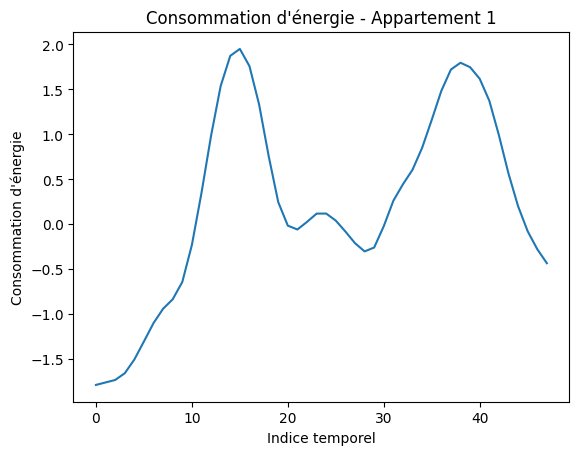

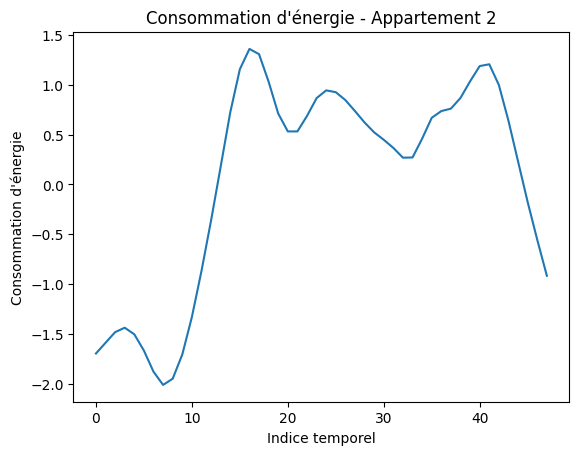

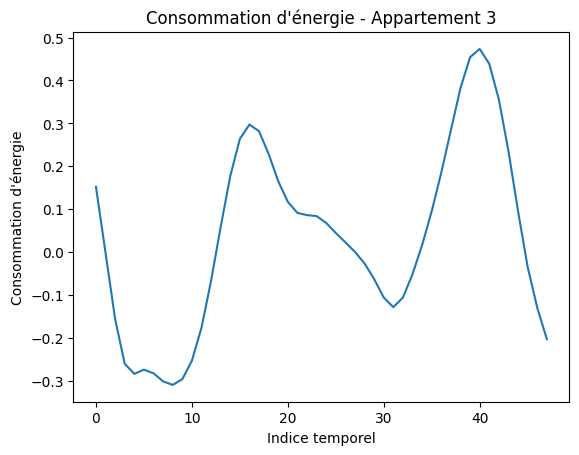

In [137]:
# Renommer la colonne des appartements
apartment_data.rename(columns={0: "APPART"}, inplace=True)

# Lire des données supplémentaires pour chaque appartement et les fusionner avec les données principales
merged_data = pd.concat([apartment_data, main_data], axis=1)

# Calculer les statistiques descriptives pour chaque appartement
apartment_stats = merged_data.groupby("APPART").describe()

# Afficher les statistiques descriptives
print("Statistiques descriptives pour chaque appartement :\n")
print(apartment_stats)

# Tracer la consommation d'énergie pour un appartement spécifique (par exemple, appartement 1)
apartment_id = 1
plt.plot(main_data.iloc[apartment_data[apartment_data["APPART"] == apartment_id].index[0], :])
plt.xlabel('Indice temporel')
plt.ylabel('Consommation d\'énergie')
plt.title('Consommation d\'énergie - Appartement {}'.format(apartment_id))
plt.show()

# Tracer la consommation d'énergie pour un appartement spécifique (par exemple, appartement 2)
apartment_id = 2
plt.plot(main_data.iloc[apartment_data[apartment_data["APPART"] == apartment_id].index[0], :])
plt.xlabel('Indice temporel')
plt.ylabel('Consommation d\'énergie')
plt.title('Consommation d\'énergie - Appartement {}'.format(apartment_id))
plt.show()

# Tracer la consommation d'énergie pour un appartement spécifique (par exemple, appartement 3)
apartment_id = 3
plt.plot(main_data.iloc[apartment_data[apartment_data["APPART"] == apartment_id].index[0], :])
plt.xlabel('Indice temporel')
plt.ylabel('Consommation d\'énergie')
plt.title('Consommation d\'énergie - Appartement {}'.format(apartment_id))
plt.show()


Statistiques descriptives pour chaque appartement :

           0                                                              \
       count      mean       std       min       25%       50%       75%   
APPART                                                                     
1       91.0 -0.938678  0.616789 -2.598947 -1.310670 -0.858518 -0.515141   
2       91.0 -0.951006  0.687608 -2.326500 -1.554914 -0.885495 -0.463166   
3       91.0 -0.808099  0.762123 -2.509761 -1.332497 -0.826042 -0.144817   
4       91.0 -0.757974  0.550816 -1.816944 -1.084217 -0.790128 -0.362559   
5       91.0 -0.801341  0.621542 -2.311632 -1.258899 -0.764361 -0.406140   
...      ...       ...       ...       ...       ...       ...       ...   
96      91.0 -0.704915  0.557055 -2.058558 -1.057793 -0.670308 -0.328857   
97      91.0 -0.578541  0.674215 -2.391116 -0.999605 -0.534292 -0.119272   
98      91.0 -0.964972  0.635616 -2.731046 -1.430700 -0.875752 -0.472392   
99      91.0 -0.753945  0.688516 -2

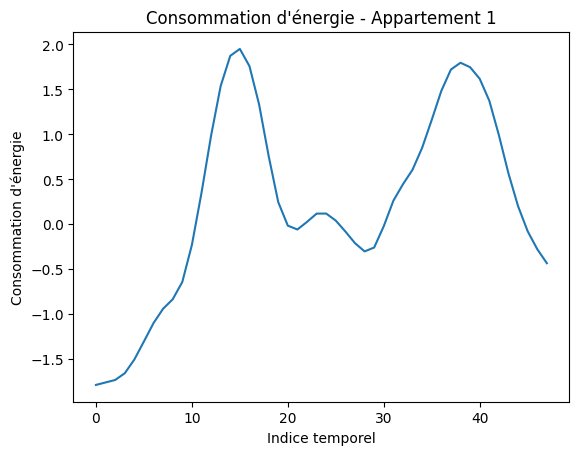

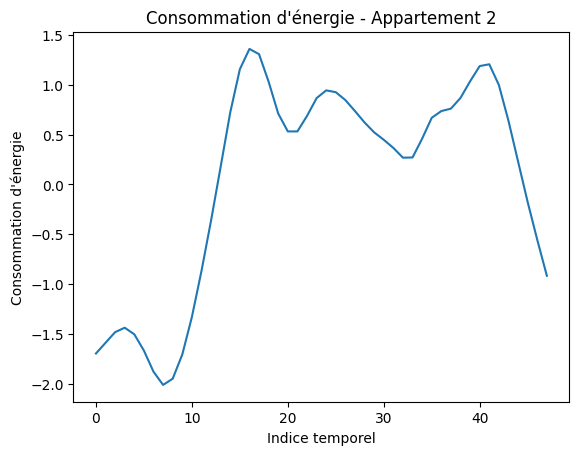

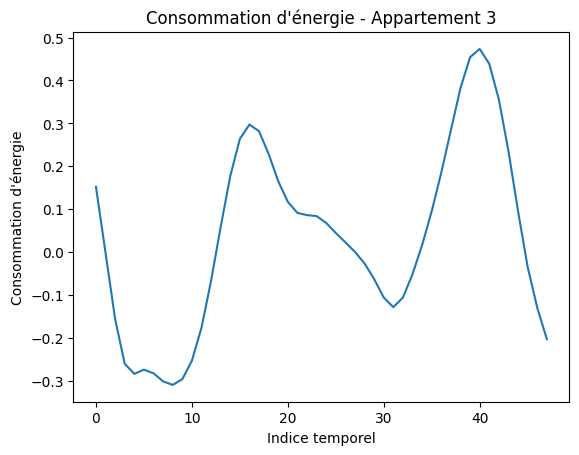

In [215]:
#Renommer la colonne des appartements
apartment_data.rename(columns={0: "APPART"}, inplace=True)

#Lire des données supplémentaires pour chaque appartement et les fusionner avec les données principales
merged_data = pd.concat([apartment_data, main_data], axis=1)

#Calculer les statistiques descriptives pour chaque appartement
apartment_stats = merged_data.groupby("APPART").describe()

#Afficher les statistiques descriptives
print("Statistiques descriptives pour chaque appartement :\n")
print(apartment_stats)


#Tracer la consommation d'énergie pour un appartement spécifique (par exemple, appartement 1)
apartment_id = 1
plt.plot(main_data.iloc[apartment_data[apartment_data["APPART"] == apartment_id].index[0], :])
plt.xlabel('Indice temporel')
plt.ylabel('Consommation d\'énergie')
plt.title('Consommation d\'énergie - Appartement {}'.format(apartment_id))
plt.show()

#Tracer la consommation d'énergie pour un appartement spécifique (par exemple, appartement 2)
apartment_id = 2
plt.plot(main_data.iloc[apartment_data[apartment_data["APPART"] == apartment_id].index[0], :])
plt.xlabel('Indice temporel')
plt.ylabel('Consommation d\'énergie')
plt.title('Consommation d\'énergie - Appartement {}'.format(apartment_id))
plt.show()

#Tracer la consommation d'énergie pour un appartement spécifique (par exemple, appartement 3)
apartment_id = 3
plt.plot(main_data.iloc[apartment_data[apartment_data["APPART"] == apartment_id].index[0], :])
plt.xlabel('Indice temporel')
plt.ylabel('Consommation d\'énergie')
plt.title('Consommation d\'énergie - Appartement {}'.format(apartment_id))
plt.show()

In [216]:
merged_data.head()

APPART         0         1         2         3         4         5  \
0       1 -1.786785 -1.759306 -1.731826 -1.657497 -1.504801 -1.303554   
1       1 -0.394478 -0.634234 -0.873990 -1.012224 -0.992106 -0.935577   
2       1 -1.216742 -1.395422 -1.574103 -1.741657 -1.879992 -1.943143   
3       1 -0.796512 -1.189678 -1.582845 -1.883616 -2.029875 -2.080617   
4       1 -0.077746 -0.709023 -1.340300 -1.873472 -2.216010 -2.297673   

          6         7         8  ...        38        39        40        41  \
0 -1.099353 -0.939600 -0.834307  ...  1.796293  1.746644  1.617929  1.374530   
1 -0.966903 -1.040886 -1.074217  ...  0.835603  0.970470  1.115326  1.143106   
2 -1.897188 -1.784239 -1.650855  ...  1.153940  1.267196  1.333831  1.347890   
3 -2.097591 -2.032449 -1.835092  ...  1.156785  1.309893  1.248746  1.033263   
4 -2.089215 -1.703073 -1.269871  ...  1.526477  1.661399  1.647645  1.470649   

         42        43        44        45        46        47  
0  0.991029  0.564313  0.200768 -0.077526 -0.276923 -0.433195  
1  0.943505  0.560883  0.094956 -0.287792 -0.456911 -0.492853  
2  1.308287  1.199404  1.006899  0.736046  0.401007  0.031883  
3  0.756840  0.522058  0.398940  0.318105  0.197855  0.046630  
4  1.130163  0.676563  0.177488 -0.281004 -0.634296 -0.921962  

[5 rows x 49 columns]

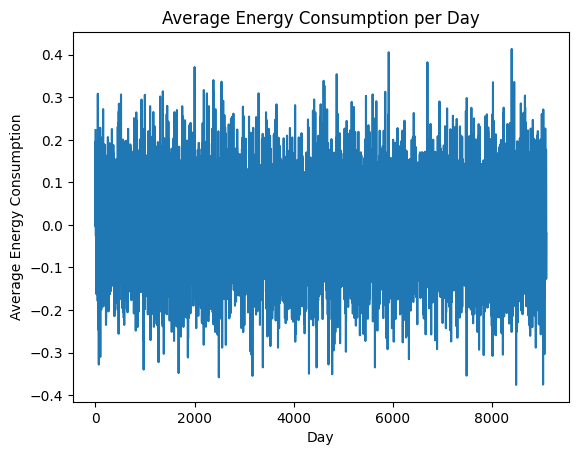

In [217]:

# Tracer la consommation d'énergie moyenne par jour
mean_per_day = main_data.mean(axis=1)
plt.plot(mean_per_day)
plt.xlabel('Day')
plt.ylabel('Average Energy Consumption')
plt.title('Average Energy Consumption per Day')
plt.show()


In [218]:
# Supposons que df soit votre DataFrame combiné
# Vous pouvez utiliser le code suivant pour renommer les colonnes
l = []  # liste des appartements

for i in range(1, merged_data.shape[1] - 1):  # Exclure les deux dernières colonnes (APPART et JOUR)
    num_appart = "appt_" + str(i)
    l.append(num_appart)

# Ajouter les colonnes APPART et JOUR à la liste
l += ["APPART", "JOUR"]

# Renommer les colonnes du DataFrame
merged_data.columns = l

# Afficher les premières lignes du DataFrame
print(merged_data.head())

   appt_1    appt_2    appt_3    appt_4    appt_5    appt_6    appt_7  \
0       1 -1.786785 -1.759306 -1.731826 -1.657497 -1.504801 -1.303554   
1       1 -0.394478 -0.634234 -0.873990 -1.012224 -0.992106 -0.935577   
2       1 -1.216742 -1.395422 -1.574103 -1.741657 -1.879992 -1.943143   
3       1 -0.796512 -1.189678 -1.582845 -1.883616 -2.029875 -2.080617   
4       1 -0.077746 -0.709023 -1.340300 -1.873472 -2.216010 -2.297673   

     appt_8    appt_9   appt_10  ...   appt_40   appt_41   appt_42   appt_43  \
0 -1.099353 -0.939600 -0.834307  ...  1.796293  1.746644  1.617929  1.374530   
1 -0.966903 -1.040886 -1.074217  ...  0.835603  0.970470  1.115326  1.143106   
2 -1.897188 -1.784239 -1.650855  ...  1.153940  1.267196  1.333831  1.347890   
3 -2.097591 -2.032449 -1.835092  ...  1.156785  1.309893  1.248746  1.033263   
4 -2.089215 -1.703073 -1.269871  ...  1.526477  1.661399  1.647645  1.470649   

    appt_44   appt_45   appt_46   appt_47    APPART      JOUR  
0  0.991029  0.5

In [141]:
merged_data.head()

appt_1    appt_2    appt_3    appt_4    appt_5    appt_6    appt_7  \
0       1 -1.786785 -1.759306 -1.731826 -1.657497 -1.504801 -1.303554   
1       1 -0.394478 -0.634234 -0.873990 -1.012224 -0.992106 -0.935577   
2       1 -1.216742 -1.395422 -1.574103 -1.741657 -1.879992 -1.943143   
3       1 -0.796512 -1.189678 -1.582845 -1.883616 -2.029875 -2.080617   
4       1 -0.077746 -0.709023 -1.340300 -1.873472 -2.216010 -2.297673   

     appt_8    appt_9   appt_10  ...   appt_40   appt_41   appt_42   appt_43  \
0 -1.099353 -0.939600 -0.834307  ...  1.796293  1.746644  1.617929  1.374530   
1 -0.966903 -1.040886 -1.074217  ...  0.835603  0.970470  1.115326  1.143106   
2 -1.897188 -1.784239 -1.650855  ...  1.153940  1.267196  1.333831  1.347890   
3 -2.097591 -2.032449 -1.835092  ...  1.156785  1.309893  1.248746  1.033263   
4 -2.089215 -1.703073 -1.269871  ...  1.526477  1.661399  1.647645  1.470649   

    appt_44   appt_45   appt_46   appt_47    APPART      JOUR  
0  0.991029  0.564313  0.200768 -0.077526 -0.276923 -0.433195  
1  0.943505  0.560883  0.094956 -0.287792 -0.456911 -0.492853  
2  1.308287  1.199404  1.006899  0.736046  0.401007  0.031883  
3  0.756840  0.522058  0.398940  0.318105  0.197855  0.046630  
4  1.130163  0.676563  0.177488 -0.281004 -0.634296 -0.921962  

[5 rows x 49 columns]

In [219]:
print(merged_data.columns)

Index(['appt_1', 'appt_2', 'appt_3', 'appt_4', 'appt_5', 'appt_6', 'appt_7',
       'appt_8', 'appt_9', 'appt_10', 'appt_11', 'appt_12', 'appt_13',
       'appt_14', 'appt_15', 'appt_16', 'appt_17', 'appt_18', 'appt_19',
       'appt_20', 'appt_21', 'appt_22', 'appt_23', 'appt_24', 'appt_25',
       'appt_26', 'appt_27', 'appt_28', 'appt_29', 'appt_30', 'appt_31',
       'appt_32', 'appt_33', 'appt_34', 'appt_35', 'appt_36', 'appt_37',
       'appt_38', 'appt_39', 'appt_40', 'appt_41', 'appt_42', 'appt_43',
       'appt_44', 'appt_45', 'appt_46', 'appt_47', 'APPART', 'JOUR'],
      dtype='object')


In [220]:
# Ajoutons des timestamp à notre DATASET
merged_data.insert(0, 'Time', pd.date_range(start='1/1/2022', periods=len(merged_data), freq='30min'))
merged_data.head()

Time  appt_1    appt_2    appt_3    appt_4    appt_5  \
0 2022-01-01 00:00:00       1 -1.786785 -1.759306 -1.731826 -1.657497   
1 2022-01-01 00:30:00       1 -0.394478 -0.634234 -0.873990 -1.012224   
2 2022-01-01 01:00:00       1 -1.216742 -1.395422 -1.574103 -1.741657   
3 2022-01-01 01:30:00       1 -0.796512 -1.189678 -1.582845 -1.883616   
4 2022-01-01 02:00:00       1 -0.077746 -0.709023 -1.340300 -1.873472   

     appt_6    appt_7    appt_8    appt_9  ...   appt_40   appt_41   appt_42  \
0 -1.504801 -1.303554 -1.099353 -0.939600  ...  1.796293  1.746644  1.617929   
1 -0.992106 -0.935577 -0.966903 -1.040886  ...  0.835603  0.970470  1.115326   
2 -1.879992 -1.943143 -1.897188 -1.784239  ...  1.153940  1.267196  1.333831   
3 -2.029875 -2.080617 -2.097591 -2.032449  ...  1.156785  1.309893  1.248746   
4 -2.216010 -2.297673 -2.089215 -1.703073  ...  1.526477  1.661399  1.647645   

    appt_43   appt_44   appt_45   appt_46   appt_47    APPART      JOUR  
0  1.374530  0.991029  0.564313  0.200768 -0.077526 -0.276923 -0.433195  
1  1.143106  0.943505  0.560883  0.094956 -0.287792 -0.456911 -0.492853  
2  1.347890  1.308287  1.199404  1.006899  0.736046  0.401007  0.031883  
3  1.033263  0.756840  0.522058  0.398940  0.318105  0.197855  0.046630  
4  1.470649  1.130163  0.676563  0.177488 -0.281004 -0.634296 -0.921962  

[5 rows x 50 columns]

In [221]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9100 entries, 0 to 9099
Data columns (total 50 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     9100 non-null   datetime64[ns]
 1   appt_1   9100 non-null   int64         
 2   appt_2   9100 non-null   float64       
 3   appt_3   9100 non-null   float64       
 4   appt_4   9100 non-null   float64       
 5   appt_5   9100 non-null   float64       
 6   appt_6   9100 non-null   float64       
 7   appt_7   9100 non-null   float64       
 8   appt_8   9100 non-null   float64       
 9   appt_9   9100 non-null   float64       
 10  appt_10  9100 non-null   float64       
 11  appt_11  9100 non-null   float64       
 12  appt_12  9100 non-null   float64       
 13  appt_13  9100 non-null   float64       
 14  appt_14  9100 non-null   float64       
 15  appt_15  9100 non-null   float64       
 16  appt_16  9100 non-null   float64       
 17  appt_17  9100 non-null   float64 

#### 2 -3 Agrégation des données par mois et par jour <a class="anchor" id="section_2_3"></a>

In [145]:
df_month = merged_data.copy()# création d'un dataframe retraçant la consommation mensuelle
df_month['Month'] = df_month['Time'].astype(str).str[5:7] ## 7 permet de ne garder que ce qui correspond au mois dans la série de caractères.
df_month['Month'] = df_month['Month'].transform(int, axis = 0) # permet que le mois soit un entier plutôt qu'une chaîne de caractères.


In [146]:
df_month['Month'] = df_month['Month'].astype(int) 


In [147]:
df_month['Time'] = pd.to_datetime(df_month['Time'])
df_month = df_month.resample('M', on='Time').sum()

In [148]:
df_month = df_month.groupby('Month').sum()

In [ ]:
Correction 

In [223]:
# Agrégation des données par mois
df_month = merged_data.copy()  # création d'un DataFrame pour la consommation mensuelle

# Extrait le mois de la colonne 'Time'
df_month['Month'] = df_month['Time'].astype(str).str[5:7]
df_month['Month'] = df_month['Month'].transform(int, axis=0)  # Convertit en entier
df_month['Month'] = df_month['Month'].astype(int) 

# Convertit la colonne 'Time' en type datetime
df_month['Time'] = pd.to_datetime(df_month['Time'])

# Agrège les données par mois
df_month = df_month.resample('M', on='Time').sum()
df_month = df_month.groupby('Month').sum()

# Agrégation des données par jour
df_day = merged_data.copy()  # Copie du DataFrame pour la consommation journalière

# Convertit la colonne 'Time' en type datetime
df_day['Time'] = pd.to_datetime(df_day['Time'])

# Extrait le jour à partir de la colonne 'Time'
df_day['Day'] = df_day['Time'].dt.floor('D')

# Définit la liste des noms de colonnes numériques
colonnes_numeriques = ['appt_1', 'appt_2', 'appt_3', 'appt_4', 'appt_5', 'appt_6', 'appt_7', 'appt_8', 'appt_9', 'appt_10',
                       'appt_11', 'appt_12', 'appt_13', 'appt_14', 'appt_15', 'appt_16', 'appt_17', 'appt_18', 'appt_19',
                       'appt_20', 'appt_21', 'appt_22', 'appt_23', 'appt_24', 'appt_25', 'appt_26', 'appt_27', 'appt_28',
                       'appt_29', 'appt_30', 'appt_31', 'appt_32', 'appt_33', 'appt_34', 'appt_35', 'appt_36', 'appt_37',
                       'appt_38', 'appt_39', 'appt_40', 'appt_41', 'appt_42', 'appt_43', 'appt_44', 'appt_45', 'appt_46',
                       'appt_47']

# Regroupe par jour et effectue la somme pour les colonnes numériques
df_day_agg = df_day.groupby('Day')[colonnes_numeriques].sum().reset_index()

# Fusionne la colonne 'Time' dans le DataFrame agrégé
df_day_agg = df_day_agg.merge(df_day[['Day', 'Time']], on='Day')

# Trie le DataFrame par 'Time'
df_day_agg.sort_values('Time', inplace=True)

# Réinitialise l'index
df_day_agg.reset_index(drop=True, inplace=True)

In [149]:
# Copions le dataframe pour travailler avec les jours
df_day = merged_data.copy()

# Convertissons la colonne 'Time' en type datetime
df_day['Time'] = pd.to_datetime(df_day['Time'])

# Extrait le jour à partir de la colonne 'Time'
df_day['Day'] = df_day['Time'].dt.floor('D')

# Définissons la liste des noms de colonnes numériques
colonnes_numeriques = ['appt_1', 'appt_2', 'appt_3', 'appt_4', 'appt_5', 'appt_6', 'appt_7', 'appt_8', 'appt_9', 'appt_10',
                       'appt_11', 'appt_12', 'appt_13', 'appt_14', 'appt_15', 'appt_16', 'appt_17', 'appt_18', 'appt_19',
                       'appt_20', 'appt_21', 'appt_22', 'appt_23', 'appt_24', 'appt_25', 'appt_26', 'appt_27', 'appt_28',
                       'appt_29', 'appt_30', 'appt_31', 'appt_32', 'appt_33', 'appt_34', 'appt_35', 'appt_36', 'appt_37',
                       'appt_38', 'appt_39', 'appt_40', 'appt_41', 'appt_42', 'appt_43', 'appt_44', 'appt_45', 'appt_46',
                       'appt_47']

# Regroupons par jour et additionnons les valeurs pour les colonnes numériques
df_day_agg = df_day.groupby('Day')[colonnes_numeriques].sum().reset_index()

# Fusionnons la colonne 'Time' dans le dataframe agrégé
df_day_agg = df_day_agg.merge(df_day[['Day', 'Time']], on='Day')

# Triaons le dataframe par 'Time'
df_day_agg.sort_values('Time', inplace=True)

# Réinitialisons l'index
df_day_agg.reset_index(drop=True, inplace=True)


In [224]:
df_day_agg.head()

Day  appt_1     appt_2     appt_3     appt_4    appt_5     appt_6  \
0 2022-01-01      48 -45.463531 -51.675009 -57.886487 -63.76354 -68.927907   
1 2022-01-01      48 -45.463531 -51.675009 -57.886487 -63.76354 -68.927907   
2 2022-01-01      48 -45.463531 -51.675009 -57.886487 -63.76354 -68.927907   
3 2022-01-01      48 -45.463531 -51.675009 -57.886487 -63.76354 -68.927907   
4 2022-01-01      48 -45.463531 -51.675009 -57.886487 -63.76354 -68.927907   

      appt_7     appt_8     appt_9  ...    appt_39    appt_40    appt_41  \
0 -72.825997 -74.883625 -74.619574  ...  34.849264  42.222874  46.969563   
1 -72.825997 -74.883625 -74.619574  ...  34.849264  42.222874  46.969563   
2 -72.825997 -74.883625 -74.619574  ...  34.849264  42.222874  46.969563   
3 -72.825997 -74.883625 -74.619574  ...  34.849264  42.222874  46.969563   
4 -72.825997 -74.883625 -74.619574  ...  34.849264  42.222874  46.969563   

     appt_42   appt_43    appt_44    appt_45    appt_46   appt_47  \
0  48.326353  45.69955  38.874719  28.985185  17.419652  5.240573   
1  48.326353  45.69955  38.874719  28.985185  17.419652  5.240573   
2  48.326353  45.69955  38.874719  28.985185  17.419652  5.240573   
3  48.326353  45.69955  38.874719  28.985185  17.419652  5.240573   
4  48.326353  45.69955  38.874719  28.985185  17.419652  5.240573   

                 Time  
0 2022-01-01 00:00:00  
1 2022-01-01 00:30:00  
2 2022-01-01 01:00:00  
3 2022-01-01 01:30:00  
4 2022-01-01 02:00:00  

[5 rows x 49 columns]

In [150]:
df_day.head()

Time  appt_1    appt_2    appt_3    appt_4    appt_5  \
0 2022-01-01 00:00:00       1 -1.786785 -1.759306 -1.731826 -1.657497   
1 2022-01-01 00:30:00       1 -0.394478 -0.634234 -0.873990 -1.012224   
2 2022-01-01 01:00:00       1 -1.216742 -1.395422 -1.574103 -1.741657   
3 2022-01-01 01:30:00       1 -0.796512 -1.189678 -1.582845 -1.883616   
4 2022-01-01 02:00:00       1 -0.077746 -0.709023 -1.340300 -1.873472   

     appt_6    appt_7    appt_8    appt_9  ...   appt_41   appt_42   appt_43  \
0 -1.504801 -1.303554 -1.099353 -0.939600  ...  1.746644  1.617929  1.374530   
1 -0.992106 -0.935577 -0.966903 -1.040886  ...  0.970470  1.115326  1.143106   
2 -1.879992 -1.943143 -1.897188 -1.784239  ...  1.267196  1.333831  1.347890   
3 -2.029875 -2.080617 -2.097591 -2.032449  ...  1.309893  1.248746  1.033263   
4 -2.216010 -2.297673 -2.089215 -1.703073  ...  1.661399  1.647645  1.470649   

    appt_44   appt_45   appt_46   appt_47    APPART      JOUR        Day  
0  0.991029  0.564313  0.200768 -0.077526 -0.276923 -0.433195 2022-01-01  
1  0.943505  0.560883  0.094956 -0.287792 -0.456911 -0.492853 2022-01-01  
2  1.308287  1.199404  1.006899  0.736046  0.401007  0.031883 2022-01-01  
3  0.756840  0.522058  0.398940  0.318105  0.197855  0.046630 2022-01-01  
4  1.130163  0.676563  0.177488 -0.281004 -0.634296 -0.921962 2022-01-01  

[5 rows x 51 columns]

In [151]:
print(df_day.columns)

Index(['Time', 'appt_1', 'appt_2', 'appt_3', 'appt_4', 'appt_5', 'appt_6',
       'appt_7', 'appt_8', 'appt_9', 'appt_10', 'appt_11', 'appt_12',
       'appt_13', 'appt_14', 'appt_15', 'appt_16', 'appt_17', 'appt_18',
       'appt_19', 'appt_20', 'appt_21', 'appt_22', 'appt_23', 'appt_24',
       'appt_25', 'appt_26', 'appt_27', 'appt_28', 'appt_29', 'appt_30',
       'appt_31', 'appt_32', 'appt_33', 'appt_34', 'appt_35', 'appt_36',
       'appt_37', 'appt_38', 'appt_39', 'appt_40', 'appt_41', 'appt_42',
       'appt_43', 'appt_44', 'appt_45', 'appt_46', 'appt_47', 'APPART', 'JOUR',
       'Day'],
      dtype='object')


In [152]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9100 entries, 0 to 9099
Data columns (total 50 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     9100 non-null   datetime64[ns]
 1   appt_1   9100 non-null   int64         
 2   appt_2   9100 non-null   float64       
 3   appt_3   9100 non-null   float64       
 4   appt_4   9100 non-null   float64       
 5   appt_5   9100 non-null   float64       
 6   appt_6   9100 non-null   float64       
 7   appt_7   9100 non-null   float64       
 8   appt_8   9100 non-null   float64       
 9   appt_9   9100 non-null   float64       
 10  appt_10  9100 non-null   float64       
 11  appt_11  9100 non-null   float64       
 12  appt_12  9100 non-null   float64       
 13  appt_13  9100 non-null   float64       
 14  appt_14  9100 non-null   float64       
 15  appt_15  9100 non-null   float64       
 16  appt_16  9100 non-null   float64       
 17  appt_17  9100 non-null   float64 

In [225]:
df_day_agg['Day'] = pd.to_datetime(df_day['Day'], format='%m-%d')


In [226]:
df_day_agg.head()

Day  appt_1     appt_2     appt_3     appt_4    appt_5     appt_6  \
0 2022-01-01      48 -45.463531 -51.675009 -57.886487 -63.76354 -68.927907   
1 2022-01-01      48 -45.463531 -51.675009 -57.886487 -63.76354 -68.927907   
2 2022-01-01      48 -45.463531 -51.675009 -57.886487 -63.76354 -68.927907   
3 2022-01-01      48 -45.463531 -51.675009 -57.886487 -63.76354 -68.927907   
4 2022-01-01      48 -45.463531 -51.675009 -57.886487 -63.76354 -68.927907   

      appt_7     appt_8     appt_9  ...    appt_39    appt_40    appt_41  \
0 -72.825997 -74.883625 -74.619574  ...  34.849264  42.222874  46.969563   
1 -72.825997 -74.883625 -74.619574  ...  34.849264  42.222874  46.969563   
2 -72.825997 -74.883625 -74.619574  ...  34.849264  42.222874  46.969563   
3 -72.825997 -74.883625 -74.619574  ...  34.849264  42.222874  46.969563   
4 -72.825997 -74.883625 -74.619574  ...  34.849264  42.222874  46.969563   

     appt_42   appt_43    appt_44    appt_45    appt_46   appt_47  \
0  48.326353  45.69955  38.874719  28.985185  17.419652  5.240573   
1  48.326353  45.69955  38.874719  28.985185  17.419652  5.240573   
2  48.326353  45.69955  38.874719  28.985185  17.419652  5.240573   
3  48.326353  45.69955  38.874719  28.985185  17.419652  5.240573   
4  48.326353  45.69955  38.874719  28.985185  17.419652  5.240573   

                 Time  
0 2022-01-01 00:00:00  
1 2022-01-01 00:30:00  
2 2022-01-01 01:00:00  
3 2022-01-01 01:30:00  
4 2022-01-01 02:00:00  

[5 rows x 49 columns]

#### 2 -4 Visualisation des données à une échelle mensuelle et quotidienne <a class="anchor" id="section_2_4"></a>

 - Ci-dessous, nous mettons en œuvre une fonction appelée graph_consos qui nous permet d'afficher les profils souhaités. La fonction agrège les données au niveau mensuel ou journalier en utilisant la moyenne des données individuelles.

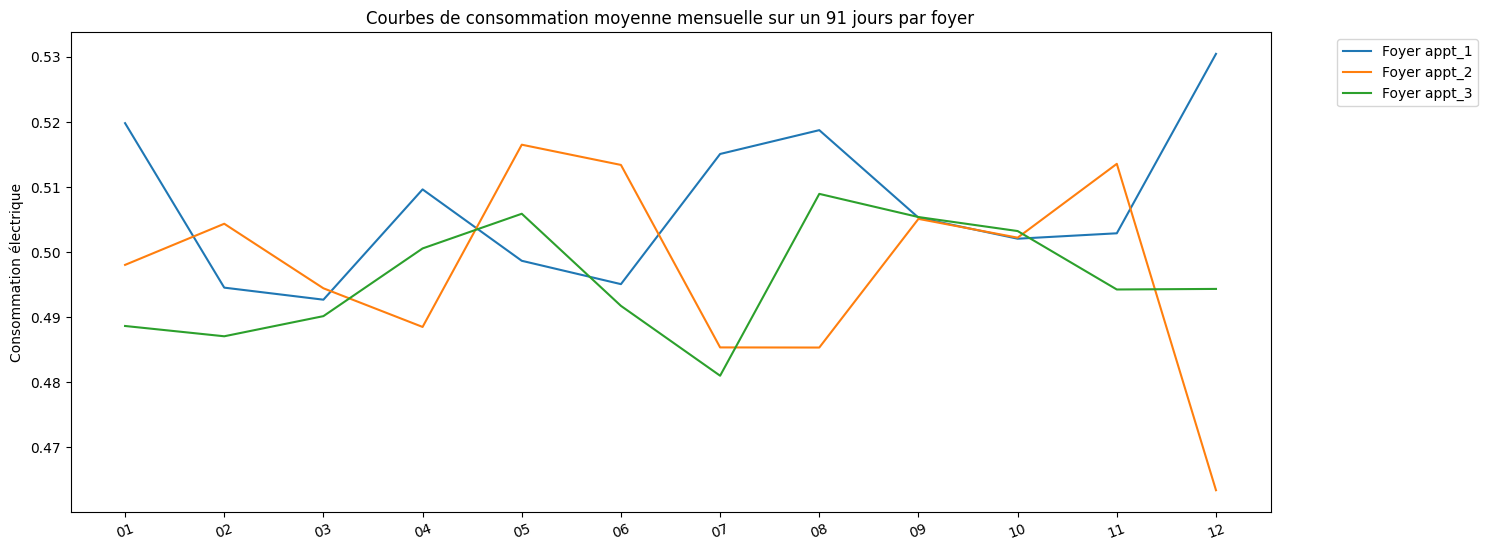

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

# Exemple de DataFrame (à remplacer par votre propre DataFrame)
data = {
    'Time': pd.date_range('2023-01-01', periods=9100, freq='D'),
    'appt_1': np.random.rand(9100),
    'appt_2': np.random.rand(9100),
    'appt_3': np.random.rand(9100),
    # ... les autres colonnes ...
    'APPART': np.random.rand(9100),
    'JOUR': np.random.rand(9100)
}

merged_data1 = pd.DataFrame(data)

# Fonction graph_consos (copiée de votre code)
def graph_consos(DataFrame, time, liste_profils):
    x = DataFrame.copy()
    temp = DataFrame.copy()

    if time == 'Month':
        k = 7  # mois
        s = 1
        mode = 'mensuelle'
    elif time == 'Week':
        k = 10  # jours
        s = 7  # une semaine
        mode = 'hebdomadaire'
    else:
        raise ValueError("Time should be 'Month' or 'Week'")

    temp[time] = temp["Time"].astype('str').str[5:k]
    temp = temp.groupby(time).mean()
    x[time] = x['Time'].astype('str').str[5:k]
    x = x.groupby(time).mean()

    fig = plt.figure(figsize=[12, 4.8])
    a1 = fig.add_axes([0, 0, 1, 1])
    a1.set_ylabel('Consommation électrique')

    # Utiliser np.arange(len(x)) pour déterminer le nombre d'emplacements automatiquement
    plt.xticks(np.arange(len(x), step=s), x.index, rotation=20)

    plt.title('Courbes de consommation moyenne %s sur un 91 jours par foyer' % mode)

    for profil in liste_profils:
        plt.plot(x[profil], label='Foyer %s' % profil)

    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()

# Exemple d'utilisation
graph_consos(DataFrame=merged_data1, time='Month', liste_profils=["appt_1", "appt_2", "appt_3"])


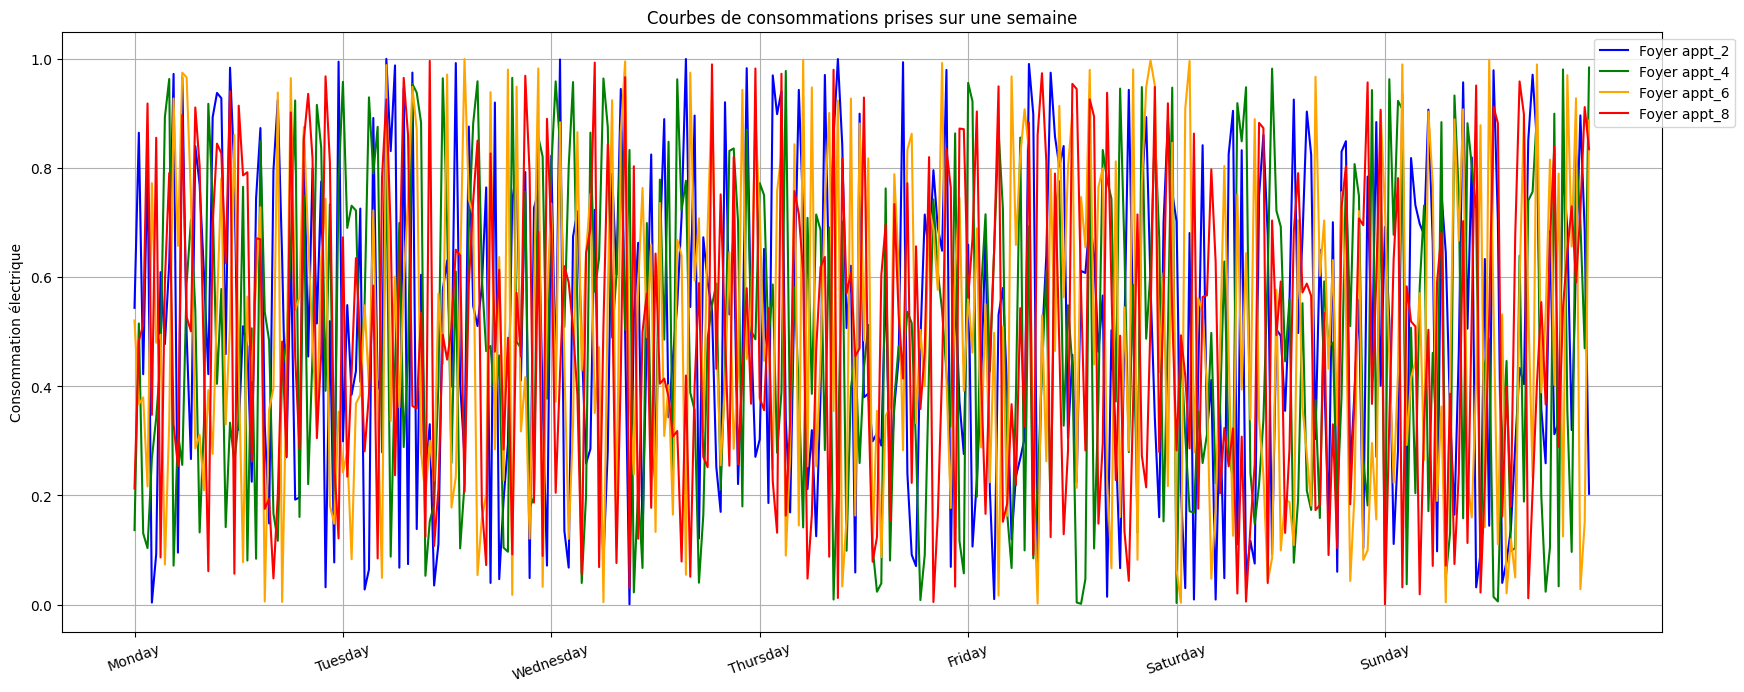

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

# Exemple de DataFrame (à remplacer par votre propre DataFrame)
data = {
    'Time': pd.date_range('2023-01-01', periods=9100, freq='D'),
    'appt_2': np.random.rand(9100),
    'appt_4': np.random.rand(9100),
    'appt_6': np.random.rand(9100),
    'appt_8': np.random.rand(9100),
    # ... les autres colonnes ...
}

merged_data2 = pd.DataFrame(data)

# Fonction graph_conso_semaine (ajustée)
def graph_conso_semaine(DataFrame, liste_profils, semaine, plot):
    x = DataFrame.copy()
    temp = DataFrame.copy()
    x = x.drop(columns='Time')
    temp = temp.drop(columns='Time')

    n = x.shape[0]

    if semaine > n / (7 * 48):
        return 'Semaine trop grande'
    else:
        init = (semaine - 1) * 7 * 48  # 7 jours dans la semaine et 48 fois une demi-heure par jour
        end = (init + 7 * 48)
        data = x.iloc[init:end]
        temperature = temp.iloc[init:end]

    if plot:
        # Graphique plus large
        fig = plt.figure(figsize=[16, 6])
        a1 = fig.add_axes([0, 0, 1, 1])
        a1.set_ylabel('Consommation électrique')
        plt.title('Courbes de consommations prises sur une semaine')
        plt.xticks(np.arange(init, end, step=48), calendar.day_name[0:8], rotation=20)

        # Couleurs différentes pour chaque foyer
        colors = ['blue', 'green', 'orange', 'red']

        # Vérifier que chaque colonne de liste_profils est présente dans le DataFrame data
        for i, profil in enumerate(liste_profils):
            if profil in data.columns:
                plt.plot(data[profil], label='Foyer %s' % profil, color=colors[i])
            else:
                print(f"La colonne {profil} n'est pas présente dans le DataFrame data.")

        plt.legend(bbox_to_anchor=(1.05, 1))
        plt.grid(True)  # Ajout d'une grille pour une meilleure lisibilité
        plt.show()
    else:
        return pd.DataFrame(data[profil] for profil in liste_profils).transpose().reset_index(drop=True)

# Exemple d'utilisation
graph_conso_semaine(merged_data2, ['appt_2','appt_4','appt_6','appt_8'], 12, plot=True)


La colonne appt_1 n'est pas présente dans le DataFrame data.
La colonne appt_3 n'est pas présente dans le DataFrame data.


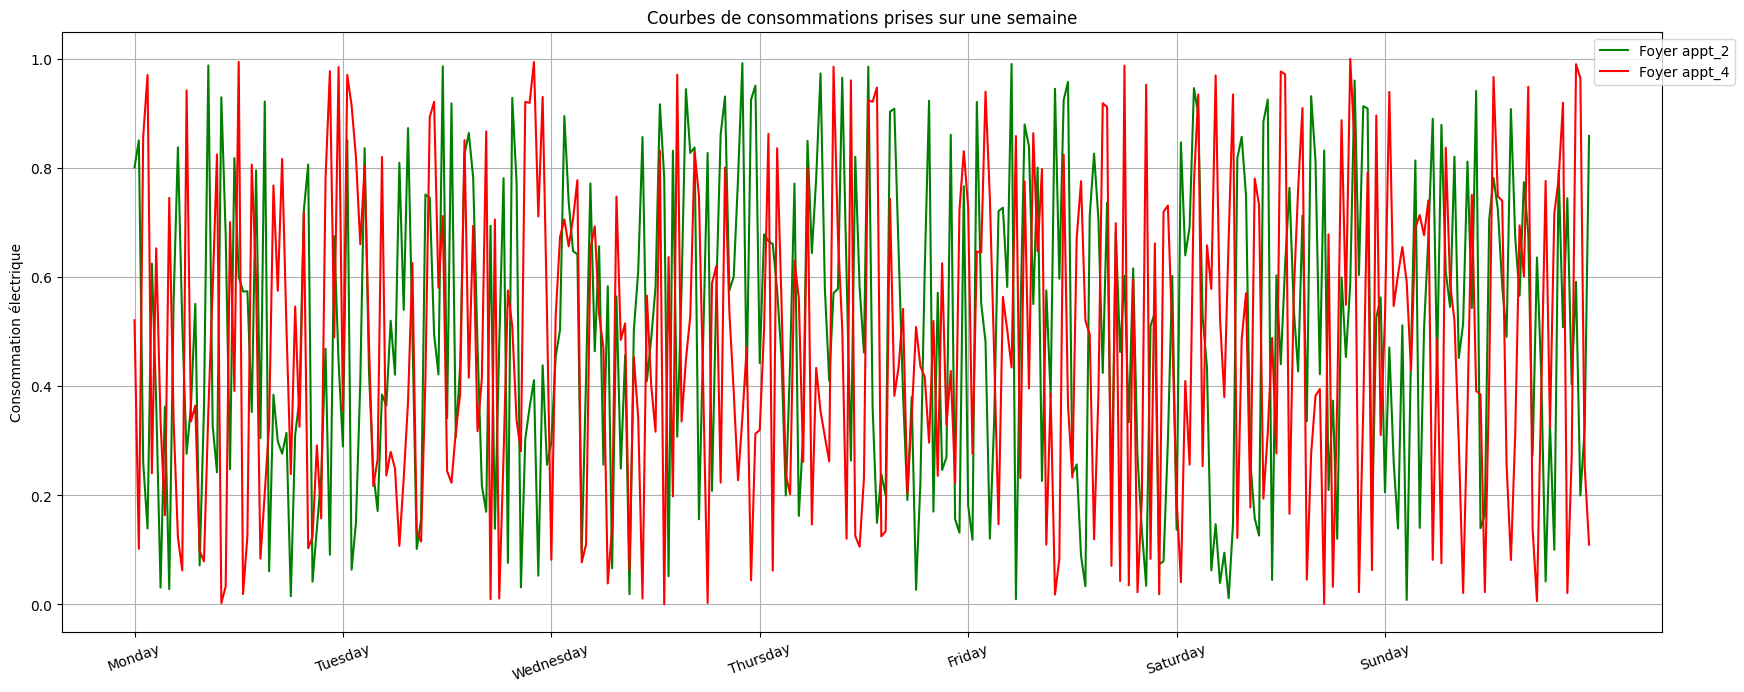

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

# Exemple de DataFrame (à remplacer par votre propre DataFrame)
data = {
    'Time': pd.date_range('2023-01-01', periods=9100, freq='D'),
    'appt_2': np.random.rand(9100),
    'appt_4': np.random.rand(9100),
    'appt_6': np.random.rand(9100),
    'appt_8': np.random.rand(9100),
    # ... les autres colonnes ...
}

merged_data3 = pd.DataFrame(data)

# Fonction graph_conso_semaine (ajustée)
def graph_conso_semaine(DataFrame, liste_profils, semaine, plot):
    x = DataFrame.copy()
    temp = DataFrame.copy()
    x = x.drop(columns='Time')
    temp = temp.drop(columns='Time')

    n = x.shape[0]

    if semaine > n / (7 * 48):
        return 'Semaine trop grande'
    else:
        init = (semaine - 1) * 7 * 48  # 7 jours dans la semaine et 48 fois une demi-heure par jour
        end = (init + 7 * 48)
        data = x.iloc[init:end]
        temperature = temp.iloc[init:end]

    if plot:
        # Graphique plus large
        fig = plt.figure(figsize=[16, 6])
        a1 = fig.add_axes([0, 0, 1, 1])
        a1.set_ylabel('Consommation électrique')
        plt.title('Courbes de consommations prises sur une semaine')
        plt.xticks(np.arange(init, end, step=48), calendar.day_name[0:8], rotation=20)

        # Couleurs différentes pour chaque foyer
        colors = ['blue', 'green', 'orange', 'red']

        # Vérifier que chaque colonne de liste_profils est présente dans le DataFrame data
        for profil, color in zip(liste_profils, colors):
            if profil in data.columns:
                plt.plot(data[profil], label='Foyer %s' % profil, color=color)
            else:
                print(f"La colonne {profil} n'est pas présente dans le DataFrame data.")

        plt.legend(bbox_to_anchor=(1.05, 1))
        plt.grid(True)  # Ajout d'une grille pour une meilleure lisibilité
        plt.show()
    else:
        return pd.DataFrame(data[profil] for profil in liste_profils).transpose().reset_index(drop=True)

# Exemple d'utilisation
graph_conso_semaine(merged_data3, ['appt_1', 'appt_2', 'appt_3', 'appt_4', 'appt_5', 'appt_6', 'appt_7', 'appt_8', 'appt_9', 'appt_10',
                   'appt_11', 'appt_12', 'appt_13', 'appt_14', 'appt_15', 'appt_16', 'appt_17', 'appt_18', 'appt_19',
                   'appt_20', 'appt_21', 'appt_22', 'appt_23', 'appt_24', 'appt_25', 'appt_26', 'appt_27', 'appt_28',
                   'appt_29', 'appt_30', 'appt_31', 'appt_32', 'appt_33', 'appt_34', 'appt_35', 'appt_36', 'appt_37',
                   'appt_38', 'appt_39', 'appt_40', 'appt_41', 'appt_42', 'appt_43', 'appt_44', 'appt_45', 'appt_46',
                   'appt_47'], 12, plot=True)


Les deux fonctions que vous avez fournies sont des fonctions de visualisation des données de consommation électrique.

La première fonction, `graph_conso_semaine`, prend en entrée un DataFrame contenant les données de consommation, une liste de profils de foyers à afficher, le numéro de la semaine à visualiser et un paramètre `plot` qui indique si le graphique doit être affiché directement ou si les données doivent être renvoyées pour un traitement ultérieur. La fonction extrait les données de consommation correspondant à la semaine spécifiée et crée un graphique affichant les courbes de consommation sur les 7 jours de la semaine. Chaque foyer est représenté par une courbe de couleur différente. Le graphique est étiqueté avec les jours de la semaine et affiche également une légende pour identifier les foyers.

La deuxième fonction, `graph_consos`, prend également en entrée un DataFrame contenant les données de consommation, le paramètre `time` qui peut être 'Month' ou 'Week' pour spécifier si l'on souhaite afficher les informations de consommation par mois ou par semaine, et une liste de profils de foyers à afficher. La fonction regroupe les données de consommation en utilisant la période de temps spécifiée et calcule la moyenne de consommation pour chaque période. Ensuite, elle crée un graphique affichant les courbes de consommation moyenne pour chaque profil de foyer sur la période sélectionnée (par mois ou par semaine).

Ces deux fonctions sont utiles pour visualiser et analyser les données de consommation électrique sur différentes périodes temporelles. Vous pouvez les appeler avec les données de consommation appropriées pour obtenir des graphiques détaillés sur les habitudes de consommation des différents foyers.

In [230]:
print(merged_data.columns)

Index(['Time', 'appt_1', 'appt_2', 'appt_3', 'appt_4', 'appt_5', 'appt_6',
       'appt_7', 'appt_8', 'appt_9', 'appt_10', 'appt_11', 'appt_12',
       'appt_13', 'appt_14', 'appt_15', 'appt_16', 'appt_17', 'appt_18',
       'appt_19', 'appt_20', 'appt_21', 'appt_22', 'appt_23', 'appt_24',
       'appt_25', 'appt_26', 'appt_27', 'appt_28', 'appt_29', 'appt_30',
       'appt_31', 'appt_32', 'appt_33', 'appt_34', 'appt_35', 'appt_36',
       'appt_37', 'appt_38', 'appt_39', 'appt_40', 'appt_41', 'appt_42',
       'appt_43', 'appt_44', 'appt_45', 'appt_46', 'appt_47', 'APPART',
       'JOUR'],
      dtype='object')


### 3- Normalisation des colonnes de profils à l'aide de MinMaxScaler et StandardScaler <a class="anchor" id="chapter3"></a> 

deux méthodes différentes,`MinMaxScaler` et `StandardScaler`, de la bibliothèque sklearn.preprocessing pour normaliser les colonnes de profils d'un DataFrame appelé merged_data.

Pour la méthode `MinMaxScaler`, le code commence par afficher les noms des colonnes présentes dans le DataFrame merged_data. Ensuite, les colonnes à normaliser sont spécifiées dans la variable colonnes_a_normaliser. Un objet MinMaxScaler est créé et la normalisation est appliquée aux colonnes sélectionnées à l'aide de la méthode fit_transform. Les valeurs normalisées sont ensuite assignées aux colonnes correspondantes dans le DataFrame merged_data. Les statistiques descriptives des données normalisées sont ensuite calculées à l'aide de la méthode describe() et affichées.

Pour la méthode `StandardScaler`, le code sélectionne les colonnes à normaliser en excluant la colonne "Time" du DataFrame merged_data. Un objet StandardScaler est créé et la normalisation est appliquée aux colonnes sélectionnées en utilisant la méthode fit_transform sur un DataFrame spécifique df_to_scale. Les données normalisées sont ensuite stockées dans un nouveau DataFrame df_scaled, qui inclut également la colonne "Time" du DataFrame merged_data. Les statistiques descriptives des données normalisées sont calculées à l'aide de la méthode describe() et affichées.

Ces deux méthodes de normalisation permettent de mettre les valeurs des colonnes de profils sur une échelle commune, facilitant ainsi leur comparaison et leur analyse ultérieure. Les statistiques descriptives des données normalisées fournissent des informations sur la variation et la distribution des profils, ce qui peut être utile pour prendre des décisions éclairées basées sur ces données.

In [231]:
from sklearn.preprocessing import MinMaxScaler

# Affichez les noms des colonnes dans le DataFrame
print(merged_data.columns)

# Sélectionnez les colonnes que vous souhaitez normaliser
colonnes_a_normaliser = ['appt_1', 'appt_2', 'appt_3', 'appt_4', 'appt_5', 'appt_6', 'appt_7', 'appt_8', 'appt_9', 'appt_10',
                   'appt_11', 'appt_12', 'appt_13', 'appt_14', 'appt_15', 'appt_16', 'appt_17', 'appt_18', 'appt_19',
                   'appt_20', 'appt_21', 'appt_22', 'appt_23', 'appt_24', 'appt_25', 'appt_26', 'appt_27', 'appt_28',
                   'appt_29', 'appt_30', 'appt_31', 'appt_32', 'appt_33', 'appt_34', 'appt_35', 'appt_36', 'appt_37',
                   'appt_38', 'appt_39', 'appt_40', 'appt_41', 'appt_42', 'appt_43', 'appt_44', 'appt_45', 'appt_46',
                   'appt_47']  # Ajoutez les autres colonnes au besoin

# Créez un objet MinMaxScaler
scaler = MinMaxScaler()

# Appliquez la normalisation aux colonnes sélectionnées
merged_data[colonnes_a_normaliser] = scaler.fit_transform(merged_data[colonnes_a_normaliser])

# Utilisez la méthode describe() pour afficher les statistiques descriptives
statistiques_descriptives = merged_data.describe()

# Affichez les statistiques descriptives
print(statistiques_descriptives)


Index(['Time', 'appt_1', 'appt_2', 'appt_3', 'appt_4', 'appt_5', 'appt_6',
       'appt_7', 'appt_8', 'appt_9', 'appt_10', 'appt_11', 'appt_12',
       'appt_13', 'appt_14', 'appt_15', 'appt_16', 'appt_17', 'appt_18',
       'appt_19', 'appt_20', 'appt_21', 'appt_22', 'appt_23', 'appt_24',
       'appt_25', 'appt_26', 'appt_27', 'appt_28', 'appt_29', 'appt_30',
       'appt_31', 'appt_32', 'appt_33', 'appt_34', 'appt_35', 'appt_36',
       'appt_37', 'appt_38', 'appt_39', 'appt_40', 'appt_41', 'appt_42',
       'appt_43', 'appt_44', 'appt_45', 'appt_46', 'appt_47', 'APPART',
       'JOUR'],
      dtype='object')
                      Time       appt_1       appt_2       appt_3  \
count                 9100  9100.000000  9100.000000  9100.000000   
mean   2022-04-05 18:45:00     0.500000     0.504960     0.522717   
min    2022-01-01 00:00:00     0.000000     0.000000     0.000000   
25%    2022-02-17 09:22:30     0.250000     0.422115     0.436088   
50%    2022-04-05 18:45:00     0.50

In [232]:
from sklearn.preprocessing import StandardScaler

# Sélectionnez les colonnes à normaliser (toutes sauf "Time")
colonnes_a_normaliser = [col for col in merged_data.columns if col != "Time"]

# Créez un objet StandardScaler
scaler = StandardScaler()

# Créez un DataFrame avec les colonnes à normaliser
df_to_scale = merged_data[colonnes_a_normaliser]

# Appliquez la normalisation
df_scaled = scaler.fit_transform(df_to_scale)

# Créez un nouveau DataFrame avec les données normalisées
df_scaled = pd.DataFrame(df_scaled, columns=colonnes_a_normaliser)

# Ajoutez la colonne "Time" au DataFrame normalisé
df_scaled["Time"] = merged_data["Time"]

# Affichez les statistiques descriptives après normalisation
statistiques_descriptives_normalisees = df_scaled.describe()

# Affichez les statistiques descriptives normalisées
print(statistiques_descriptives_normalisees)


             appt_1        appt_2        appt_3        appt_4        appt_5  \
count  9.100000e+03  9.100000e+03  9.100000e+03  9.100000e+03  9.100000e+03   
mean   1.998889e-16 -2.662583e-16  7.265495e-16 -4.411611e-17  1.749028e-16   
min   -1.714816e+00 -4.199492e+00 -4.190716e+00 -3.564605e+00 -3.263284e+00   
25%   -8.574080e-01 -6.889789e-01 -6.945204e-01 -6.817025e-01 -6.585645e-01   
50%    2.844947e-16  8.463671e-03 -2.131779e-02 -3.569638e-02 -4.855207e-02   
75%    8.574080e-01  6.927267e-01  6.507889e-01  6.089202e-01  5.950562e-01   
max    1.714816e+00  4.116999e+00  3.826460e+00  3.376188e+00  3.240386e+00   
std    1.000055e+00  1.000055e+00  1.000055e+00  1.000055e+00  1.000055e+00   

             appt_6        appt_7        appt_8        appt_9       appt_10  \
count  9.100000e+03  9.100000e+03  9.100000e+03  9.100000e+03  9.100000e+03   
mean   9.994447e-17  1.944232e-16  1.514783e-16 -2.717240e-16  1.530400e-16   
min   -3.400462e+00 -3.493775e+00 -3.133344e+00 -3.

In [161]:
print(df_scaled.columns)

Index(['appt_1', 'appt_2', 'appt_3', 'appt_4', 'appt_5', 'appt_6', 'appt_7',
       'appt_8', 'appt_9', 'appt_10', 'appt_11', 'appt_12', 'appt_13',
       'appt_14', 'appt_15', 'appt_16', 'appt_17', 'appt_18', 'appt_19',
       'appt_20', 'appt_21', 'appt_22', 'appt_23', 'appt_24', 'appt_25',
       'appt_26', 'appt_27', 'appt_28', 'appt_29', 'appt_30', 'appt_31',
       'appt_32', 'appt_33', 'appt_34', 'appt_35', 'appt_36', 'appt_37',
       'appt_38', 'appt_39', 'appt_40', 'appt_41', 'appt_42', 'appt_43',
       'appt_44', 'appt_45', 'appt_46', 'appt_47', 'APPART', 'JOUR', 'Time'],
      dtype='object')


In [162]:
df_scaled.describe()

appt_1        appt_2        appt_3        appt_4        appt_5  \
count  9.100000e+03  9.100000e+03  9.100000e+03  9.100000e+03  9.100000e+03   
mean   1.998889e-16 -2.662583e-16  7.265495e-16 -4.411611e-17  1.749028e-16   
min   -1.714816e+00 -4.199492e+00 -4.190716e+00 -3.564605e+00 -3.263284e+00   
25%   -8.574080e-01 -6.889789e-01 -6.945204e-01 -6.817025e-01 -6.585645e-01   
50%    2.844947e-16  8.463671e-03 -2.131779e-02 -3.569638e-02 -4.855207e-02   
75%    8.574080e-01  6.927267e-01  6.507889e-01  6.089202e-01  5.950562e-01   
max    1.714816e+00  4.116999e+00  3.826460e+00  3.376188e+00  3.240386e+00   
std    1.000055e+00  1.000055e+00  1.000055e+00  1.000055e+00  1.000055e+00   

             appt_6        appt_7        appt_8        appt_9       appt_10  \
count  9.100000e+03  9.100000e+03  9.100000e+03  9.100000e+03  9.100000e+03   
mean   9.994447e-17  1.944232e-16  1.514783e-16 -2.717240e-16  1.530400e-16   
min   -3.400462e+00 -3.493775e+00 -3.133344e+00 -3.081118e+00 -3.088563e+00   
25%   -6.653158e-01 -6.722405e-01 -6.511959e-01 -6.443847e-01 -6.495158e-01   
50%   -6.272527e-02 -6.648670e-02 -8.320574e-02 -9.879219e-02 -9.520641e-02   
75%    5.816265e-01  5.594474e-01  5.326756e-01  5.115338e-01  5.202619e-01   
max    2.996784e+00  3.097067e+00  3.204556e+00  3.260179e+00  3.304800e+00   
std    1.000055e+00  1.000055e+00  1.000055e+00  1.000055e+00  1.000055e+00   

       ...       appt_41       appt_42       appt_43       appt_44  \
count  ...  9.100000e+03  9.100000e+03  9.100000e+03  9.100000e+03   
mean   ...  2.663559e-16 -3.187682e-16  3.691309e-16  4.187127e-16   
min    ... -3.566168e+00 -3.651492e+00 -3.799264e+00 -3.968870e+00   
25%    ... -6.717615e-01 -6.588335e-01 -6.671254e-01 -6.823115e-01   
50%    ...  5.398197e-02  8.637591e-02  8.809372e-02  6.856101e-02   
75%    ...  7.055274e-01  7.021105e-01  7.050594e-01  7.201989e-01   
max    ...  3.172116e+00  3.085053e+00  2.805449e+00  2.812027e+00   
std    ...  1.000055e+00  1.000055e+00  1.000055e+00  1.000055e+00   

            appt_45       appt_46       appt_47        APPART          JOUR  \
count  9.100000e+03  9.100000e+03  9.100000e+03  9.100000e+03  9.100000e+03   
mean  -5.973244e-16 -3.216963e-16  5.153387e-17 -1.873959e-17 -2.205806e-17   
min   -3.857098e+00 -3.696471e+00 -3.920942e+00 -3.683544e+00 -3.451166e+00   
25%   -6.895064e-01 -6.424213e-01 -6.542370e-01 -6.855548e-01 -6.896531e-01   
50%    2.347766e-02 -1.203268e-02 -1.846941e-02  1.499674e-02  3.375599e-02   
75%    7.013009e-01  6.811991e-01  6.481387e-01  6.499318e-01  6.923925e-01   
max    2.949214e+00  3.295038e+00  3.431658e+00  3.510115e+00  3.934078e+00   
std    1.000055e+00  1.000055e+00  1.000055e+00  1.000055e+00  1.000055e+00   

                      Time  
count                 9100  
mean   2022-04-05 18:45:00  
min    2022-01-01 00:00:00  
25%    2022-02-17 09:22:30  
50%    2022-04-05 18:45:00  
75%    2022-05-23 04:07:30  
max    2022-07-09 13:30:00  
std                    NaN  

[8 rows x 50 columns]

In [163]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9100 entries, 0 to 9099
Data columns (total 50 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   appt_1   9100 non-null   float64       
 1   appt_2   9100 non-null   float64       
 2   appt_3   9100 non-null   float64       
 3   appt_4   9100 non-null   float64       
 4   appt_5   9100 non-null   float64       
 5   appt_6   9100 non-null   float64       
 6   appt_7   9100 non-null   float64       
 7   appt_8   9100 non-null   float64       
 8   appt_9   9100 non-null   float64       
 9   appt_10  9100 non-null   float64       
 10  appt_11  9100 non-null   float64       
 11  appt_12  9100 non-null   float64       
 12  appt_13  9100 non-null   float64       
 13  appt_14  9100 non-null   float64       
 14  appt_15  9100 non-null   float64       
 15  appt_16  9100 non-null   float64       
 16  appt_17  9100 non-null   float64       
 17  appt_18  9100 non-null   float64 

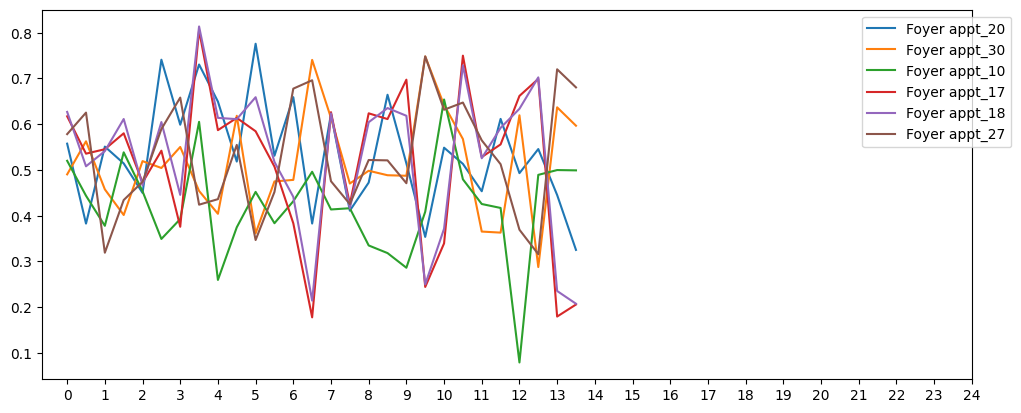

In [164]:
import datetime
import matplotlib.dates as mdates

liste_des_jours = pd.unique(merged_data['Time'].astype('str').str[5:10])

def valeurs_journee(merged_data, profil, journee):
    df_day = merged_data[merged_data["Time"].astype('str').str[5:10] == journee][profil]
    d1 = pd.DataFrame(df_day).reset_index(drop = True)
    return(d1)

def journee_moyenne(merged_data, profil):
    d1 = valeurs_journee(merged_data, profil, liste_des_jours[0])
    for jour in liste_des_jours[1:]:
        d2 = valeurs_journee(merged_data, profil, jour)
        d1 = pd.concat([d1, d2], axis=1)
    d1 = d1.apply(np.mean, 1)
    return(pd.DataFrame(d2))

def journee_moyenne_liste(merged_data, liste_profils, plot):
    if plot == True: 
        fig = plt.figure(figsize = [12, 4.8])
        for profil in liste_profils:
            plt.plot(journee_moyenne(merged_data, profil), label= 'Foyer %s' % profil)
        plt.legend(bbox_to_anchor=(1.05, 1))
        plt.xticks(np.arange(0,50, step=2), np.arange(25))
        return(plt.show())
        
    else : 
        d1 = journee_moyenne(merged_data, liste_profils[0])
        for profil in liste_profils[1:]:
            d2 = journee_moyenne(profil)
            d1 = pd.concat([d1, d2], axis = 1)
        return(d1)

journee_moyenne_liste(merged_data, ["appt_20", "appt_30", "appt_10", "appt_17", "appt_18", "appt_27"], plot = True)

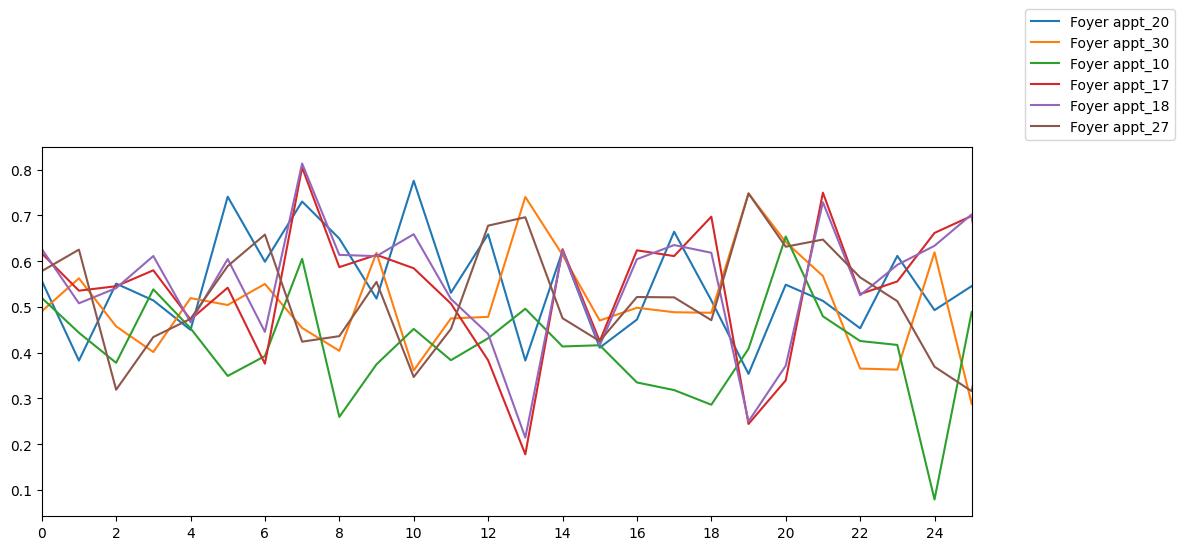

In [233]:
def journee_moyenne_liste(merged_data, liste_profils, plot):
    if plot == True: 
        fig = plt.figure(figsize = [12, 4.8])
        for profil in liste_profils:
            plt.plot(journee_moyenne(merged_data, profil), label= 'Foyer %s' % profil)
        plt.legend(bbox_to_anchor=(1.05, 1))
        plt.xticks(np.arange(0, 50, step=2), np.arange(0, 50, step=2))  # Specifie la plage des valeurs sur l'axe x (de 0 à 50 avec un pas de 2)
        plt.xlim(0, 25)  # Specifie la plage visible sur l'axe x (de 0 à 25)
        return(plt.show())
        
    else : 
        d1 = journee_moyenne(merged_data, liste_profils[0])
        for profil in liste_profils[1:]:
            d2 = journee_moyenne(profil)
            d1 = pd.concat([d1, d2], axis = 1)
        return(d1)
journee_moyenne_liste(merged_data, ["appt_20", "appt_30", "appt_10", "appt_17", "appt_18", "appt_27"], plot = True)

In [235]:
print(merged_data.columns)

Index(['Time', 'appt_1', 'appt_2', 'appt_3', 'appt_4', 'appt_5', 'appt_6',
       'appt_7', 'appt_8', 'appt_9', 'appt_10', 'appt_11', 'appt_12',
       'appt_13', 'appt_14', 'appt_15', 'appt_16', 'appt_17', 'appt_18',
       'appt_19', 'appt_20', 'appt_21', 'appt_22', 'appt_23', 'appt_24',
       'appt_25', 'appt_26', 'appt_27', 'appt_28', 'appt_29', 'appt_30',
       'appt_31', 'appt_32', 'appt_33', 'appt_34', 'appt_35', 'appt_36',
       'appt_37', 'appt_38', 'appt_39', 'appt_40', 'appt_41', 'appt_42',
       'appt_43', 'appt_44', 'appt_45', 'appt_46', 'appt_47', 'APPART',
       'JOUR'],
      dtype='object')


### 4. Normalisation des profils de données et visualisation des distributions <a class="anchor" id="chapter4"></a>

La fonction `StandardScaler` de la bibliothèque `sklearn.preprocessing` pour normaliser les colonnes de profils d'un DataFrame appelé `merged_data`. La normalisation vise à mettre toutes les valeurs des colonnes sur une échelle standardisée, rendant ainsi la comparaison plus aisée. Les données normalisées sont ensuite stockées dans un nouveau DataFrame nommé `df_scaled`.

En utilisant le module `matplotlib.pyplot`, ce code crée un diagramme de boîte (`boxplot`) qui représente graphiquement les distributions des données normalisées. Ce type de graphique permet d'observer la dispersion (étendue) et les valeurs aberrantes des données. Les différentes colonnes de profils sont présentées sur l'axe vertical (y), tandis que les valeurs normalisées sont situées sur l'axe horizontal (x). Le titre du graphique est défini comme "Distribution des profils normalisés", ce qui fournit une indication sur son objectif principal.

In [236]:
from sklearn.preprocessing import StandardScaler

# Sélectionner les colonnes de profils à normaliser
df_to_scale = merged_data.loc[:, "appt_1":"appt_47"]

# Instancier le scaler
scaler = StandardScaler()

# Effectuer la normalisation
df_scaled = scaler.fit_transform(df_to_scale)

# Créer un DataFrame à partir des données normalisées
df_scaled = pd.DataFrame(df_scaled, columns=df_to_scale.columns)


# Afficher les statistiques des données normalisées
df_scaled.describe()

appt_1        appt_2        appt_3        appt_4        appt_5  \
count  9.100000e+03  9.100000e+03  9.100000e+03  9.100000e+03  9.100000e+03   
mean   1.998889e-16 -2.662583e-16  7.265495e-16 -4.411611e-17  1.749028e-16   
std    1.000055e+00  1.000055e+00  1.000055e+00  1.000055e+00  1.000055e+00   
min   -1.714816e+00 -4.199492e+00 -4.190716e+00 -3.564605e+00 -3.263284e+00   
25%   -8.574080e-01 -6.889789e-01 -6.945204e-01 -6.817025e-01 -6.585645e-01   
50%    2.844947e-16  8.463671e-03 -2.131779e-02 -3.569638e-02 -4.855207e-02   
75%    8.574080e-01  6.927267e-01  6.507889e-01  6.089202e-01  5.950562e-01   
max    1.714816e+00  4.116999e+00  3.826460e+00  3.376188e+00  3.240386e+00   

             appt_6        appt_7        appt_8        appt_9       appt_10  \
count  9.100000e+03  9.100000e+03  9.100000e+03  9.100000e+03  9.100000e+03   
mean   9.994447e-17  1.944232e-16  1.514783e-16 -2.717240e-16  1.530400e-16   
std    1.000055e+00  1.000055e+00  1.000055e+00  1.000055e+00  1.000055e+00   
min   -3.400462e+00 -3.493775e+00 -3.133344e+00 -3.081118e+00 -3.088563e+00   
25%   -6.653158e-01 -6.722405e-01 -6.511959e-01 -6.443847e-01 -6.495158e-01   
50%   -6.272527e-02 -6.648670e-02 -8.320574e-02 -9.879219e-02 -9.520641e-02   
75%    5.816265e-01  5.594474e-01  5.326756e-01  5.115338e-01  5.202619e-01   
max    2.996784e+00  3.097067e+00  3.204556e+00  3.260179e+00  3.304800e+00   

       ...       appt_38       appt_39       appt_40       appt_41  \
count  ...  9.100000e+03  9.100000e+03  9.100000e+03  9.100000e+03   
mean   ...  6.871182e-17 -3.779150e-16  4.524830e-16  2.663559e-16   
std    ...  1.000055e+00  1.000055e+00  1.000055e+00  1.000055e+00   
min    ... -3.245499e+00 -3.347711e+00 -3.603939e+00 -3.566168e+00   
25%    ... -7.156797e-01 -7.086255e-01 -6.903798e-01 -6.717615e-01   
50%    ... -4.579395e-03  1.138252e-02  3.274177e-02  5.398197e-02   
75%    ...  6.941588e-01  6.959103e-01  7.020648e-01  7.055274e-01   
max    ...  3.380740e+00  3.348629e+00  3.414578e+00  3.172116e+00   

            appt_42       appt_43       appt_44       appt_45       appt_46  \
count  9.100000e+03  9.100000e+03  9.100000e+03  9.100000e+03  9.100000e+03   
mean  -3.187682e-16  3.691309e-16  4.187127e-16 -5.973244e-16 -3.216963e-16   
std    1.000055e+00  1.000055e+00  1.000055e+00  1.000055e+00  1.000055e+00   
min   -3.651492e+00 -3.799264e+00 -3.968870e+00 -3.857098e+00 -3.696471e+00   
25%   -6.588335e-01 -6.671254e-01 -6.823115e-01 -6.895064e-01 -6.424213e-01   
50%    8.637591e-02  8.809372e-02  6.856101e-02  2.347766e-02 -1.203268e-02   
75%    7.021105e-01  7.050594e-01  7.201989e-01  7.013009e-01  6.811991e-01   
max    3.085053e+00  2.805449e+00  2.812027e+00  2.949214e+00  3.295038e+00   

            appt_47  
count  9.100000e+03  
mean   5.153387e-17  
std    1.000055e+00  
min   -3.920942e+00  
25%   -6.542370e-01  
50%   -1.846941e-02  
75%    6.481387e-01  
max    3.431658e+00  

[8 rows x 47 columns]

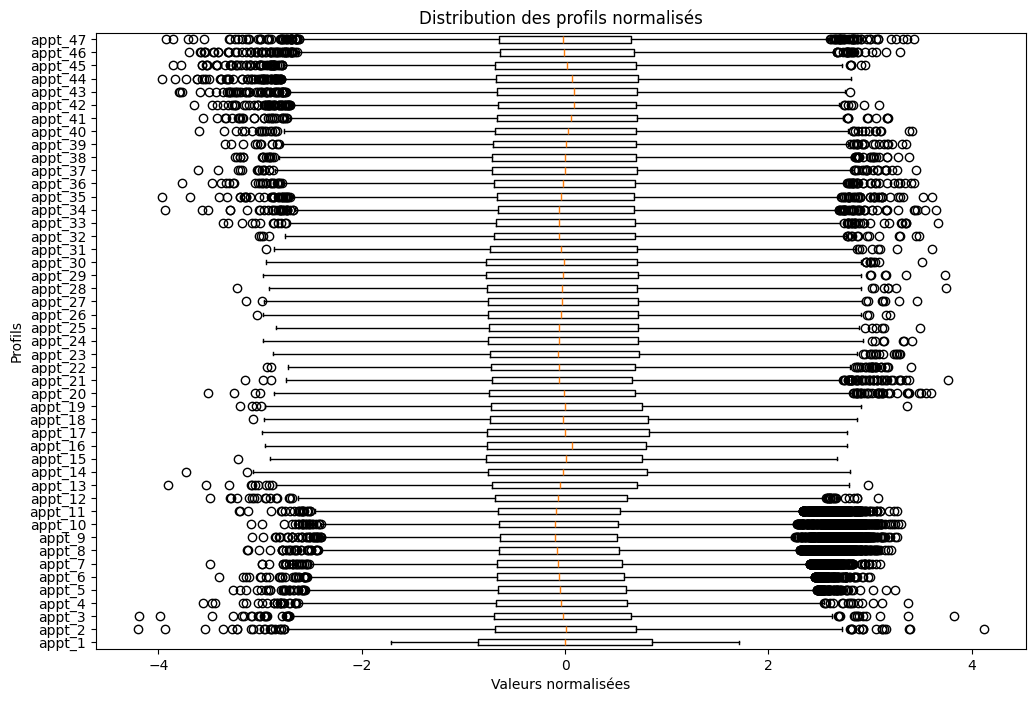

In [237]:
import matplotlib.pyplot as plt

# Représenter graphiquement les données normalisées
plt.figure(figsize=(12, 8))  # Définir la taille du graphique
plt.boxplot(df_scaled.values, vert=False, labels=df_scaled.columns)  # Créer un boxplot
plt.title("Distribution des profils normalisés")  # Titre du graphique
plt.xlabel("Valeurs normalisées")  # Légende de l'axe x
plt.ylabel("Profils")  # Légende de l'axe y
plt.show()  # Afficher le graphique

Cette visualisation des distributions des profils normalisés  permet d'appréhender la répartition des valeurs et de repérer d'éventuelles valeurs extrêmes, pour comprendre les caractéristiques et la variabilité des profils de données, et orienter la prise de décisions ou les actions liées à leur exploitation et analyse ultérieure.

### 5 -Reduction de dimension & Extraction des caractéristiques <a class="anchor" id="chapter5">

Pour réduire la dimensionnalité de nos données temporelles et extraire les caractéristiques pertinentes, nous avons identifié trois approches : 

` 1. L'Analyse en Composantes Principales (ACP) : `

En utilisant cette méthode, nous pouvons optimiser mathématiquement la réduction de variance tout en perdant l'interprétabilité des caractéristiques. L'ACP nous permet de représenter nos séries temporelles de consommation avec un nombre réduit de caractéristiques, conservant au moins 90% de la variabilité des données.

` 2. Création de caractéristiques personnalisées :` 

Cette approche nous permet de créer nos propres caractéristiques en nous basant sur des techniques d'analyse des séries temporelles. Bien que ces caractéristiques soient facilement interprétables, elles ne sont pas nécessairement optimisées pour le clustering. Nous pouvons extraire des statistiques descriptives telles que la moyenne, l'écart-type, ou d'autres mesures de tendance centrale et de dispersion pour chaque série temporelle, afin de capturer les caractéristiques les plus significatives de nos données.

` 3. Transformation de Fourier :`

En utilisant la Transformation de Fourier, nous pouvons extraire des caractéristiques fréquentielles de nos séries temporelles. Cette approche nous permet de représenter nos données sous forme de coefficients fréquentiels, ce qui peut être utile pour détecter des motifs ou des tendances périodiques. Les coefficients fréquentiels les plus importants peuvent être sélectionnés pour représenter les informations les plus significatives de nos séries temporelles.

En utilisant ces approches, nous sommes en mesure de réduire la dimensionnalité de nos données et d'extraire les caractéristiques les plus informatives, tout en préservant un niveau élevé d'interprétabilité. Cela facilite l'obtention d'un clustering plus efficace et une meilleure compréhension des différences de comportement dans nos données temporelles.


#### 5 - 1 L'Analyse en Composantes Principales (ACP) : <a class="anchor" id="section_5_1"></a>

- Application de l'Analyse en Composantes Principales (ACP) sur les données mises à l'échelle

In [238]:
# Création d'un objet StandardScaler pour standardiser les données
scaler_acp = StandardScaler()

# Mise à l'échelle des données en utilisant le StandardScaler et transposition des données
df_scaled_to_acp = scaler_acp.fit_transform(df_scaled.transpose())

# Conversion des données mises à l'échelle en un objet DataFrame
df_scaled_to_acp = pd.DataFrame(df_scaled_to_acp)

# Affichage des statistiques descriptives sur les données mises à l'échelle
df_scaled_to_acp.describe()

0             1             2             3             4     \
count  4.700000e+01  4.700000e+01  4.700000e+01  4.700000e+01  4.700000e+01   
mean  -1.322819e-16  4.251918e-17  3.779483e-17 -1.653524e-17  8.503836e-17   
std    1.010811e+00  1.010811e+00  1.010811e+00  1.010811e+00  1.010811e+00   
min   -1.404463e+00 -2.115325e+00 -1.726150e+00 -1.751236e+00 -2.291804e+00   
25%   -1.024535e+00 -8.031572e-01 -1.025922e+00 -8.428765e-01 -5.275125e-01   
50%    1.436927e-03  4.159770e-01 -7.560215e-02  9.781186e-02  2.942418e-03   
75%    9.024179e-01  7.503307e-01  9.534378e-01  6.814487e-01  9.538369e-01   
max    1.533500e+00  1.408890e+00  1.483396e+00  2.038327e+00  1.412097e+00   

               5             6             7             8             9     \
count  4.700000e+01  4.700000e+01  4.700000e+01  4.700000e+01  4.700000e+01   
mean   5.196789e-17  5.196789e-17 -1.653524e-17 -2.598394e-17  8.267618e-18   
std    1.010811e+00  1.010811e+00  1.010811e+00  1.010811e+00  1.010811e+00   
min   -1.733450e+00 -1.809184e+00 -1.669936e+00 -2.287833e+00 -1.919505e+00   
25%   -7.636756e-01 -7.756608e-01 -1.012649e+00 -5.001824e-01 -6.839559e-01   
50%    1.098673e-01  3.026071e-01  1.673023e-01  8.584771e-02 -3.087266e-02   
75%    6.467197e-01  8.592858e-01  8.711945e-01  8.708032e-01  8.111725e-01   
max    2.108374e+00  1.375082e+00  1.511952e+00  1.653290e+00  1.636788e+00   

       ...          9090          9091          9092          9093  \
count  ...  4.700000e+01  4.700000e+01  4.700000e+01  4.700000e+01   
mean   ...  2.657449e-17 -1.083649e-16  9.448707e-18  1.133845e-16   
std    ...  1.010811e+00  1.010811e+00  1.010811e+00  1.010811e+00   
min    ... -2.257381e+00 -1.831728e+00 -1.851837e+00 -2.400355e+00   
25%    ... -5.058357e-01 -7.702072e-01 -8.028012e-01 -5.266973e-01   
50%    ... -1.118277e-02  1.750284e-01  1.619634e-01  3.347746e-03   
75%    ...  5.061080e-01  9.424259e-01  8.870474e-01  7.142277e-01   
max    ...  2.278792e+00  1.363096e+00  1.601026e+00  2.071997e+00   

               9094          9095          9096          9097          9098  \
count  4.700000e+01  4.700000e+01  4.700000e+01  4.700000e+01  4.700000e+01   
mean   7.086530e-18  5.669224e-17 -1.204710e-16  7.677074e-18 -3.070830e-17   
std    1.010811e+00  1.010811e+00  1.010811e+00  1.010811e+00  1.010811e+00   
min   -1.404825e+00 -1.883154e+00 -2.402304e+00 -1.523942e+00 -1.776003e+00   
25%   -7.412289e-01 -7.776805e-01 -5.897878e-01 -9.363977e-01 -5.330202e-01   
50%   -3.031124e-02  7.585984e-02  1.937029e-01  8.842030e-02 -1.647954e-01   
75%    3.818744e-01  6.531417e-01  8.476627e-01  6.216297e-01  5.696303e-01   
max    3.168717e+00  2.170582e+00  1.725098e+00  2.459615e+00  1.895215e+00   

               9099  
count  4.700000e+01  
mean   3.838537e-18  
std    1.010811e+00  
min   -1.848010e+00  
25%   -3.975761e-01  
50%   -1.607923e-02  
75%    8.464618e-01  
max    1.805663e+00  

[8 rows x 9100 columns]

- Après avoir mis à l'échelle les données et créé un DataFrame avec les données mises à l'échelle (df_scaled_to_acp), L'objet PCA est initialisé avec le paramètre n_components qui spécifie le nombre de composantes principales à conserver. Dans ce cas, nous avons indiqué 0.95, ce qui signifie que nous souhaitons conserver 95% de la variance des données. L'ACP est ensuite appliquée sur les données mises à l'échelle en utilisant la méthode fit_transform(). Enfin, les composantes principales obtenues sont stockées dans un nouveau DataFrame appelé df_acp.

In [239]:
from sklearn.decomposition import PCA

# Création d'un objet PCA en spécifiant le nombre de composantes principales à conserver (n_components)
# Ici, nous souhaitons conserver 95% de la variance des données
acp = PCA(n_components=0.95)

# Application de l'ACP sur les données mises à l'échelle
df_acp = pd.DataFrame(acp.fit_transform(df_scaled_to_acp))

# Affichage du DataFrame contenant les composantes principales obtenues grâce à l'ACP
df_acp

0          1          2          3          4          5   \
0    2.160727   2.276860   2.101059  -5.006582  -0.138635   6.801359   
1  -16.974501  10.015992 -32.200076 -20.458952  55.567765  42.833384   
2  -21.809530  20.819767 -39.614956 -19.923022  60.127049  36.492130   
3  -25.948852  35.205692 -45.530275 -16.843216  58.327604  21.344646   
4  -25.423434  46.447613 -44.373296 -10.624649  43.981849   0.370633   
5  -22.707363  54.074915 -41.068511  -4.131592  26.215158 -16.866619   
6  -19.042620  58.891564 -38.181929   1.607132   9.254562 -27.853032   
7  -14.435547  61.748095 -36.417840   6.594619  -6.047783 -32.867975   
8   -7.461812  62.154174 -34.333242  10.725016 -19.181773 -31.909313   
9    3.522692  61.365245 -31.426387  14.169564 -29.647296 -25.843365   
10  21.722758  57.684961 -25.679011  16.153888 -36.028276 -14.947893   
11  46.776186  50.041855 -16.185767  15.648974 -36.369012  -1.435117   
12  68.654942  38.523637  -4.594781  12.074995 -30.475289  10.390208   
13  81.961615  27.970550   5.589964   7.406937 -22.708453  17.457793   
14  87.531072  20.672272  13.707528   2.867603 -15.723665  20.720542   
15  89.016099  16.666728  21.210005  -1.450041  -9.970578  22.082037   
16  87.290817  14.917547  29.717008  -5.946497  -4.789696  22.298311   
17  81.781219  15.084768  41.417235 -11.286906   0.570091  21.478713   
18  68.061505  16.585000  57.253079 -18.105489   6.892510  18.441045   
19  39.262855  18.273565  74.548475 -25.723362  13.734028  11.013796   
20  -2.783699  17.024210  79.927168 -29.383760  17.063709  -1.005211   
21 -36.216554  12.847465  71.175507 -27.338061  15.008370 -11.954508   
22 -54.639263   7.864518  58.252953 -23.554749  10.308803 -19.047250   
23 -63.977571   2.769723  46.788540 -20.765404   4.815239 -23.201293   
24 -68.213832  -2.486464  36.111130 -18.781263  -1.437789 -24.534613   
25 -70.348905  -7.707362  26.195434 -17.443480  -8.300652 -22.902409   
26 -71.039685 -12.269030  16.796473 -16.201863 -15.042661 -17.968051   
27 -71.969026 -15.555600   8.617518 -14.648655 -20.782472 -10.157138   
28 -72.404866 -17.191882   2.076048 -11.709114 -24.910387  -0.104115   
29 -72.647387 -17.373372  -2.453295  -6.402340 -27.356241  11.266673   
30 -71.291018 -16.451013  -4.927637   1.856151 -27.618059  22.736815   
31 -68.527170 -15.381305  -5.387830  13.536152 -25.652934  33.045929   
32 -62.782871 -14.986650  -3.699957  28.179928 -20.699469  39.544389   
33 -54.132540 -16.662743   0.069851  45.568196 -12.484282  39.869212   
34 -40.060191 -20.379692   5.055680  62.607029  -0.883876  31.423179   
35 -20.438172 -26.050147   9.552022  75.141547  12.503309  13.958787   
36   3.189698 -32.038463  11.691063  75.780971  23.481570  -8.071535   
37  25.682882 -37.840195  10.618065  64.516612  28.614329 -26.802800   
38  42.057964 -42.046660   6.385870  44.517034  26.882775 -36.609980   
39  51.550627 -46.047842   0.003236  23.115062  20.829599 -37.602635   
40  54.562240 -49.884510  -7.948561   3.356093  12.623064 -32.490216   
41  53.076542 -54.753902 -17.355593 -13.135094   4.161940 -24.490630   
42  47.664096 -58.865694 -27.165747 -26.385506  -3.622861 -14.750704   
43  39.819072 -61.416697 -36.428021 -36.137384  -9.643504  -4.911045   
44  30.151783 -60.415298 -43.325211 -41.539506 -13.360225   3.530956   
45  20.289388 -56.301148 -47.687375 -42.901904 -14.669913   9.114661   
46   9.489630 -47.821048 -48.875611 -39.595110 -13.417540  12.112248   

           6          7          8          9          10  
0    5.444027  -0.359796  91.686310  62.196830   0.204495  
1   39.750466 -27.561930 -14.497360  14.395216  15.210586  
2   31.369990 -16.988691 -10.905326   7.584346   7.966658  
3   13.783606   2.483035  -2.922895  -4.491857  -4.861793  
4   -7.843263  21.501505   5.857314 -14.585520 -15.045733  
5  -23.499747  29.727844   9.636959 -16.151478 -15.347564  
6  -30.544656  26.757749   7.994460 -10.735785  -7.850828  
7  -29.156725  14.784839   2.054796  -1.275463   3.687638  
8  -20.434366 

In [240]:
# transpose les colonnes du DataFrame df_day
df_day[df_day.columns[1:]].transpose()

0                    1                    2     \
appt_1                     1                    1                    1   
appt_2             -1.786785            -0.394478            -1.216742   
appt_3             -1.759306            -0.634234            -1.395422   
appt_4             -1.731826             -0.87399            -1.574103   
appt_5             -1.657497            -1.012224            -1.741657   
appt_6             -1.504801            -0.992106            -1.879992   
appt_7             -1.303554            -0.935577            -1.943143   
appt_8             -1.099353            -0.966903            -1.897188   
appt_9               -0.9396            -1.040886            -1.784239   
appt_10            -0.834307            -1.074217            -1.650855   
appt_11            -0.642136            -1.000619            -1.485354   
appt_12            -0.230324            -0.781303            -1.255485   
appt_13             0.348231            -0.470393            -0.904942   
appt_14             0.985322            -0.130235            -0.401159   
appt_15              1.53716             0.236877             0.169436   
appt_16             1.873021             0.626042             0.696217   
appt_17             1.950017               0.9619             1.090751   
appt_18             1.758666             1.159292             1.289281   
appt_19             1.335267             1.164337             1.304544   
appt_20             0.760507             0.961174             1.172522   
appt_21              0.24685             0.654756             0.945696   
appt_22            -0.015617             0.366022             0.679389   
appt_23            -0.058092             0.159045              0.42381   
appt_24             0.026336             0.057186             0.224886   
appt_25             0.118289            -0.022178             0.116524   
appt_26             0.119243            -0.148106             0.105141   
appt_27             0.040376             -0.22942             0.099195   
appt_28            -0.080661            -0.176036             0.011017   
appt_29            -0.210045            -0.062496             -0.13362   
appt_30            -0.301943             0.018642            -0.279142   
appt_31            -0.258677             0.067383            -0.364225   
appt_32            -0.021428             0.105366            -0.333761   
appt_33             0.261329             0.148215            -0.163265   
appt_34             0.444866             0.212743             0.138453   
appt_35             0.606731             0.326556             0.460024   
appt_36             0.850414             0.498261              0.69273   
appt_37             1.160902              0.64969             0.841027   
appt_38             1.483209             0.713221             0.939991   
appt_39             1.720966             0.750178              1.03401   
appt_40             1.796293             0.835603              1.15394   
appt_41             1.746644              0.97047             1.267196   
appt_42             1.617929             1.115326             1.333831   
appt_43              1.37453             1.143106              1.34789   
appt_44             0.991029             0.943505             1.308287   
appt_45             0.564313             0.560883             1.199404   
appt_46             0.200768             0.094956             1.006899   
appt_47            -0.077526            -0.287792             0.736046   
APPART             -0.276923            -0.456911             0.401007   
JOUR               -0.433195            -0.492853             0.031883   
Day      2022-01-01 00:00:00  2022-01-01 00:00:00  2022-01-01 00:00:00   

                        3                    4                    5     \
appt_1                     1                    1                    1   
appt_2             -0.796512            -0.077746            -1.315765   
appt_3             -1.18967

#### 5 - 2 Réduction de dimension basée sur les caractéristiques des séries temporelles :  <a class="anchor" id="section_5_2"></a>

Dans cette section, nous adoptons une approche différente de `l'Analyse en Composantes Principales (ACP)` en créant des variables explicatives pour chaque individu. Ces variables incluent la consommation moyenne, le minimum et le maximum de la consommation de chaque individu.

Contrairement à l'ACP, nous travaillons ici avec des données non normalisées par individus. Nous avons pris cette décision car il était plus pertinent de conserver les chiffres bruts afin de mettre en évidence certaines différences entre les consommateurs. De plus, la plupart des caractéristiques que nous recréons sont basées sur ces différences brutes, comme la consommation moyenne de chaque individu

In [241]:
# Transposer le DataFrame merged_data
df1 = merged_data.transpose()

# Créer une liste des profils de consommation
liste_des_profils = merged_data.columns[1:]

# Supprimer la première ligne (correspondant à l'intervalle de temps) pour ne garder que les 100 ménages
df1 = df1.drop(['Time'])

In [242]:
df_features = pd.DataFrame()

# Calculer la moyenne pour chaque ligne (individu) dans df1 et l'ajouter comme colonne "Moyenne" dans df_features
df_features["Moyenne"] = df1.apply(np.mean, 1)

# Calculer le minimum pour chaque ligne (individu) dans df1 et l'ajouter comme colonne "Minimum" dans df_features
df_features["Minimum"] = df1.apply(min, 1)

# Calculer le maximum pour chaque ligne (individu) dans df1 et l'ajouter comme colonne "Maximum" dans df_features
df_features["Maximum"] = df1.apply(max, 1)

In [243]:
df_features["mois_conso_max"] = [df_month[profil].idxmax() for profil in liste_des_profils]
df_features["mois_conso_min"] = [df_month[profil].idxmin() for profil in liste_des_profils]
df_features["jour_conso_max"] = [df_day[profil].idxmax() for profil in liste_des_profils]
df_features["jour_conso_min"] = [df_day[profil].idxmin() for profil in liste_des_profils]

In [244]:
df_features

Moyenne   Minimum   Maximum  mois_conso_max  mois_conso_min  \
appt_1   0.500000  0.000000  1.000000            8640            1488   
appt_2   0.504960  0.000000  1.000000            2884            1488   
appt_3   0.522717  0.000000  1.000000            2884            1488   
appt_4   0.513573  0.000000  1.000000            2884            1488   
appt_5   0.501760  0.000000  1.000000            2884            1488   
appt_6   0.531551  0.000000  1.000000            2884            1488   
appt_7   0.530095  0.000000  1.000000            2884            1488   
appt_8   0.494382  0.000000  1.000000            2884            1488   
appt_9   0.485881  0.000000  1.000000            2884            4464   
appt_10  0.483089  0.000000  1.000000            2884            4464   
appt_11  0.495022  0.000000  1.000000            2884            4464   
appt_12  0.531531  0.000000  1.000000            2884            1488   
appt_13  0.567089  0.000000  1.000000            2884            7440   
appt_14  0.571088  0.000000  1.000000            2884            7440   
appt_15  0.545523  0.000000  1.000000            2884            7440   
appt_16  0.515472  0.000000  1.000000            1488            2884   
appt_17  0.517466  0.000000  1.000000            1488            2884   
appt_18  0.517266  0.000000  1.000000            1488            2884   
appt_19  0.487235  0.000000  1.000000            1488            2884   
appt_20  0.493623  0.000000  1.000000            1488            2884   
appt_21  0.454694  0.000000  1.000000            1488            2884   
appt_22  0.463164  0.000000  1.000000            1488            2884   
appt_23  0.465274  0.000000  1.000000            1488            2884   
appt_24  0.465657  0.000000  1.000000            1488            2884   
appt_25  0.449112  0.000000  1.000000            1488            2884   
appt_26  0.486698  0.000000  1.000000            1488            2884   
appt_27  0.475896  0.000000  1.000000            1488            2884   
appt_28  0.462146  0.000000  1.000000            1488            2884   
appt_29  0.443026  0.000000  1.000000            1488            2884   
appt_30  0.455987  0.000000  1.000000            1488            2884   
appt_31  0.448902  0.000000  1.000000            1488            2884   
appt_32  0.463148  0.000000  1.000000            1488            2884   
appt_33  0.478467  0.000000  1.000000            1488            2884   
appt_34  0.519425  0.000000  1.000000            1488            2884   
appt_35  0.523508  0.000000  1.000000            8640            2884   
appt_36  0.523479  0.000000  1.000000            4464            2884   
appt_37  0.511669  0.000000  1.000000            4464            2884   
appt_38  0.489795  0.000000  1.000000            4464            2884   
appt_39  0.499931  0.000000  1.000000            1488            2884   
appt_40  0.513490  0.000000  1.000000            1488            2884   
appt_41  0.529240  0.000000  1.000000            1488            2884   
appt_42  0.542042  0.000000  1.000000            1488            2884   
appt_43  0.575235  0.000000  1.000000            1488            2884   
appt_44  0.585302  0.000000  1.000000            1488            2884   
appt_45  0.566694  0.000000  1.000000            4464            2884   
appt_46  0.528709  0.000000  1.000000            4464            2884   
appt_47  0.533273  0.000000  1.000000            7440            2884   
APPART  -0.095035 -1.558130  1.299174            2884            8640   
JOUR    -0.340634 -2.045567  1.602866            2884            1488   

         jour_conso_max  jour_conso_min  
appt_1             9009               0  
appt_2             6515            3340  
appt_3             6515            3340  
appt_4             3646            3340  
appt_5             6479            4463  
appt_6             8601            2284  
appt_7             5777            2284  
appt_8             4348

- Lors de l'utilisation d'algorithmes de clustering, tels que ceux basés sur la norme euclidienne, il est crucial de normaliser les caractéristiques afin qu'elles aient la même échelle. La normalisation permet de s'assurer que chaque caractéristique contribue de manière égale au processus de clustering, évitant ainsi que certaines caractéristiques prédominent simplement en raison de leur ordre de grandeur. En normalisant les caractéristiques, toutes les valeurs sont mises à la même échelle, ce qui facilite la comparaison et la création de clusters significatifs.

In [245]:
# Initialiser le scalateur StandardScaler pour la normalisation
scaler_features = StandardScaler()

# Normaliser les caractéristiques dans df_features en utilisant le scalateur
df_features_scaled = scaler_features.fit_transform(df_features)

# Convertir le tableau numpy de caractéristiques normalisées en DataFrame
df_features_scaled = pd.DataFrame(df_features_scaled)

# Attribuer les noms de colonnes du DataFrame df_features à df_features_scaled
df_features_scaled.columns = df_features.columns

# Afficher les statistiques descriptives du DataFrame df_features_scaled
df_features_scaled.describe()

Moyenne       Minimum       Maximum  mois_conso_max  \
count  4.900000e+01  4.900000e+01  4.900000e+01    4.900000e+01   
mean  -5.075305e-16  1.812609e-17 -1.015061e-15    1.053579e-16   
std    1.010363e+00  1.010363e+00  1.010363e+00    1.010363e+00   
min   -5.466946e+00 -5.479271e+00 -1.950796e-01   -6.799921e-01   
25%   -1.191933e-03  2.043446e-01 -1.950796e-01   -6.799921e-01   
50%    1.719423e-01  2.043446e-01 -1.950796e-01   -6.799921e-01   
75%    3.523303e-01  2.043446e-01 -1.950796e-01    1.293443e-01   
max    7.311574e-01  2.043446e-01  6.193478e+00    3.466407e+00   

       mois_conso_min  jour_conso_max  jour_conso_min  
count    4.900000e+01    4.900000e+01    4.900000e+01  
mean     6.797284e-17    9.402909e-17   -4.078370e-17  
std      1.010363e+00    1.010363e+00    1.010363e+00  
min     -1.024039e+00   -1.847526e+00   -1.560197e+00  
25%     -1.329291e-01   -7.088918e-01   -9.376824e-01  
50%     -1.329291e-01   -1.782597e-02   -2.100678e-01  
75%     -1.329291e-01    9.098053e-01    8.922684e-01  
max      3.541303e+00    1.613003e+00    2.116682e+00

#### 5 - 3 La transformation de Fourier : <a class="anchor" id="section_5_3"></a>

In [246]:
# Sélectionner les colonnes pertinentes pour la transformation de Fourier dans le DataFrame df_day
data_FT = df_day[['Day', 'appt_1', 'appt_10', 'appt_20']]

# Appliquer la transformation de Fourier sur la colonne 'appt_1' en tant que tableau numpy
appt1_fft = np.fft.fft(np.asarray(data_FT['appt_1'].tolist()))

# Créer un DataFrame fft_df contenant la transformée et les informations associées
fft_df = pd.DataFrame({'fft': appt1_fft})

# Calculer et ajouter une colonne 'absolute' contenant les valeurs absolues des coefficients de Fourier
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))

# Calculer et ajouter une colonne 'angle' contenant les angles (phases) des coefficients de Fourier
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


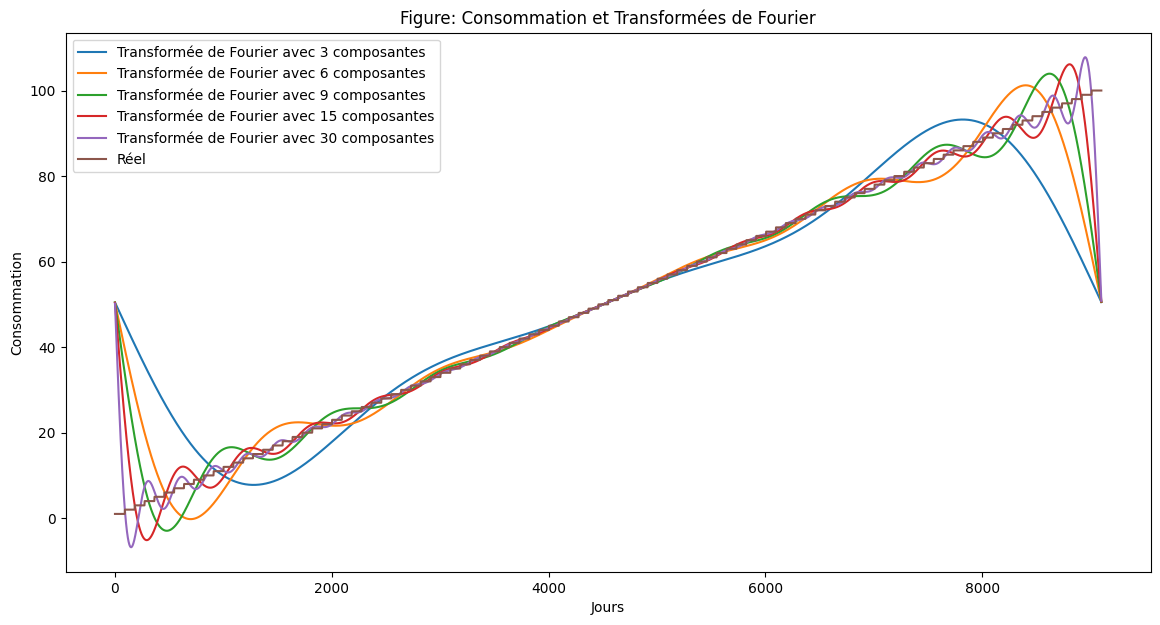

In [247]:
# Créer une figure avec une taille de 14 pouces par 7 pouces et une résolution de 100 points par pouce
plt.figure(figsize=(14, 7), dpi=100)

# Convertir la colonne 'fft' du DataFrame fft_df en tableau numpy
fft_list = np.asarray(fft_df['fft'].tolist())

# Boucle sur un ensemble de valeurs pour le nombre de composantes à prendre en compte lors de la transformation de Fourier inverse
for num_ in [3, 6, 9, 15, 30]:

    # Réaliser une copie de la liste des coefficients de Fourier
    fft_list_m10 = np.copy(fft_list)

    # Fixer à zéro les coefficients de Fourier en dehors de la plage spécifiée
    fft_list_m10[num_:-num_] = 0

    # Calculer et tracer la transformation de Fourier inverse des coefficients modifiés
    plt.plot(np.fft.ifft(fft_list_m10), label='Transformée de Fourier avec {} composantes'.format(num_))

# Tracer la série temporelle réelle
plt.plot(data_FT['appt_1'], label='Réel')

# Ajouter un label à l'axe des x
plt.xlabel('Jours')

# Ajouter un label à l'axe des y
plt.ylabel('Consommation')

# Ajouter un titre à la figure
plt.title('Figure: Consommation et Transformées de Fourier')

# Afficher la légende
plt.legend()

# Afficher la figure
plt.show()

In [248]:
# Appliquer la transformation de Fourier sur la colonne 'appt_10'
appt10_fft = np.fft.fft(np.asarray(data_FT['appt_10'].tolist()))

# Créer un DataFrame fft_df contenant la transformée de Fourier et les informations associées
fft_df = pd.DataFrame({'fft': appt10_fft})

# Calculer et ajouter une colonne 'absolute' contenant les valeurs absolues des coefficients de Fourier
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))

# Calculer et ajouter une colonne 'angle' contenant les angles (phases) des coefficients de Fourier
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


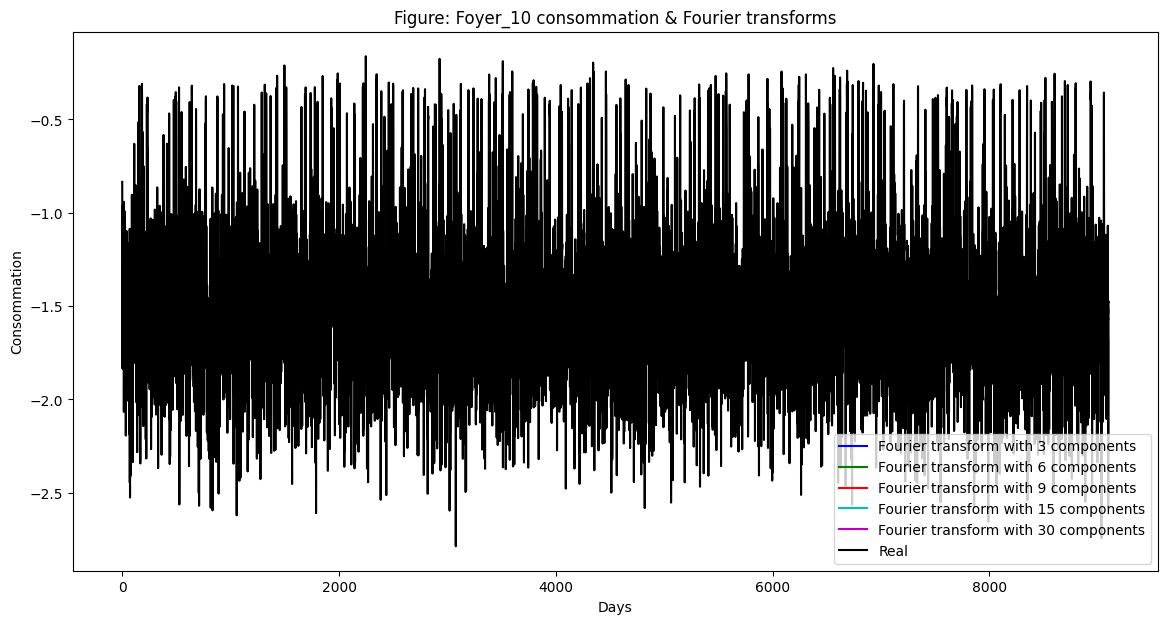

In [249]:
# Définir la taille et la résolution du graphique
plt.figure(figsize=(14, 7), dpi=100)

# Convertir les coefficients de Fourier en numpy array
fft_list = np.asarray(fft_df['fft'].tolist())

# Définir une liste de couleurs à utiliser
colors = 'bgrcmyk'

# Itérer sur différentes valeurs de composantes de Fourier
for i, num_ in enumerate([3, 6, 9, 15, 30]):

    # Copier les coefficients de Fourier
    fft_list_m10 = np.copy(fft_list)

    # Mettre à zéro les coefficients en dehors de la plage [num_, -num_]
    fft_list_m10[num_:-num_] = 0
    
    # Tracer la transformée de Fourier inversée avec les coefficients modifiés
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_), color=colors[i])

# Tracer la série temporelle originale
plt.plot(data_FT['appt_10'], label='Real', color='black')

# Ajouter des labels aux axes x et y
plt.xlabel('Days')
plt.ylabel('Consommation')

# Ajouter un titre au graphique
plt.title('Figure: Foyer_10 consommation & Fourier transforms')

# Ajouter une légende pour identifier les différentes lignes
plt.legend()

# Afficher le graphique
plt.show()


- Cela permet de visualiser les différentes composantes de Fourier dans la série temporelle ainsi que leurs contributions à la reconstruction de la série originale.

In [250]:
# Calcul de la transformée de Fourier sur la série temporelle 'data_FT['appt_20']'
appt3_fft = np.fft.fft(np.asarray(data_FT['appt_20'].tolist()))

# Création d'un DataFrame 'fft_df' pour stocker les résultats de la transformée de Fourier
fft_df = pd.DataFrame({'fft':appt3_fft})

# Calcul des magnitudes (valeurs absolues) des coefficients de Fourier
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))

# Calcul des angles (phases) des coefficients de Fourier
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

Ainsi, à la fin de ce code, le DataFrame `fft_df` contient les coefficients de Fourier, leurs magnitudes et leurs angles respectifs.

KeyError: 'appt_17'

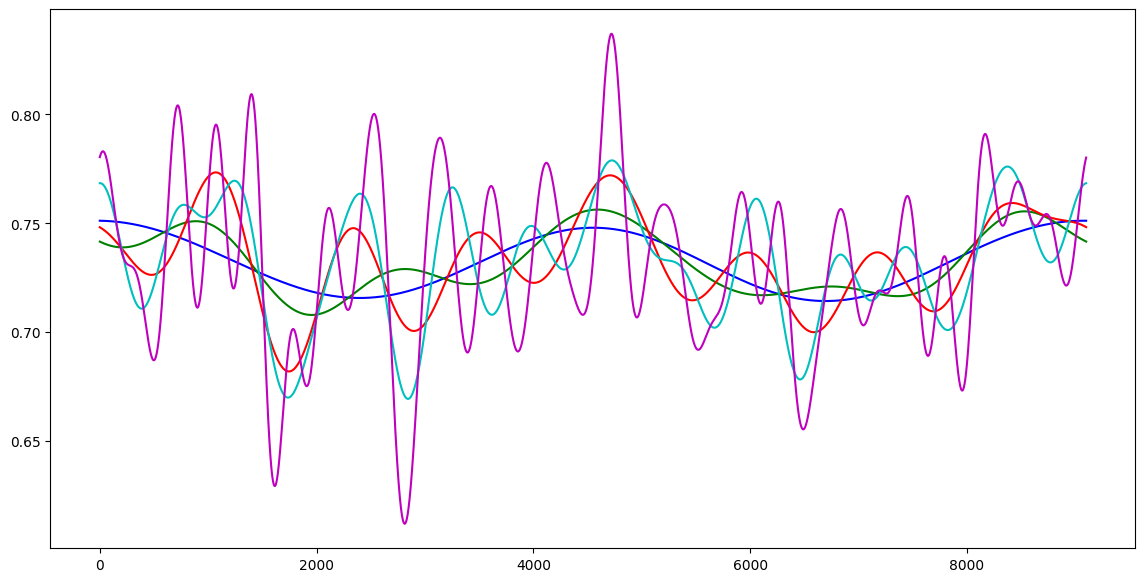

In [252]:
plt.figure(figsize=(14, 7), dpi=100)

fft_list = np.asarray(fft_df['fft'].tolist())

colors = 'bgrcmyk'

# Boucle pour tracer les transformées de Fourier avec différents nombres de composantes
for i, num_ in enumerate([3, 6, 9, 15, 30]):
    fft_list_m10 = np.copy(fft_list)
    fft_list_m10[num_:-num_] = 0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_), color=colors[i])

# Tracer la série temporelle originale
plt.plot(data_FT['appt_17'],  label='Real', color='black')

# Ajouter des étiquettes d'axes et de titre
plt.xlabel('Days')
plt.ylabel('Consommation')
plt.title('Figure: Foyer_17 consommation & Fourier transforms')

plt.legend()

# Afficher le graphe
plt.show()

- La fonction `get_fourier` effectue le calcul de la transformée de Fourier pour les données temporelles contenues dans le dataset donné. La transformée de Fourier est une technique mathématique utilisée pour décomposer une fonction périodique en une combinaison de signaux sinusoïdaux. Dans le contexte de cette fonction, elle est appliquée aux données temporelles pour extraire des informations sur leur périodicité et leurs fréquences dominantes

In [253]:
def get_fourier(dataset):
    # Sélection des colonnes correspondant aux données temporelles
    data_FT = dataset[df_day_agg.columns.to_list()]
    num_appt = 0
    for i in data_FT.columns[1:].tolist():
        num_appt = num_appt + 1
        
        # Convertir les valeurs temporelles en une échelle numérique appropriée
        time_values = pd.to_datetime(data_FT[i]).astype('int64').astype(float) // 10**9
        
        # Calcul de la transformée de Fourier
        close_fft = np.fft.fft(np.asarray(time_values.tolist()))
        close_fft = np.fft.ifft(close_fft)
        
        # Création d'un DataFrame à partir des composantes de la transformée de Fourier
        fft_df = pd.DataFrame({'fft': close_fft})
        
        # Calcul de la magnitude et de l'angle des composantes de la transformée de Fourier
        fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
        fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
        
        # Suppression des fréquences indésirables
        fft_list = np.asarray(fft_df['fft'].tolist())
        fft_list_m10 = np.copy(fft_list)
        fft_list_m10[30:-30] = 0
        
        # Ajout d'une nouvelle colonne au dataset avec les valeurs absolues des composantes de la transformée
        col_name = 'Fourier_' + str(num_appt)
        dataset[col_name] = pd.DataFrame(fft_list_m10).apply(lambda x: np.abs(x))
        
    return dataset
dataset_TI_df = get_fourier(df_day_agg)
dataset_TI_df.head()


Day  appt_1     appt_2     appt_3     appt_4    appt_5     appt_6  \
0 2022-01-01      48 -45.463531 -51.675009 -57.886487 -63.76354 -68.927907   
1 2022-01-01      48 -45.463531 -51.675009 -57.886487 -63.76354 -68.927907   
2 2022-01-01      48 -45.463531 -51.675009 -57.886487 -63.76354 -68.927907   
3 2022-01-01      48 -45.463531 -51.675009 -57.886487 -63.76354 -68.927907   
4 2022-01-01      48 -45.463531 -51.675009 -57.886487 -63.76354 -68.927907   

      appt_7     appt_8     appt_9  ...  Fourier_39  Fourier_40  Fourier_41  \
0 -72.825997 -74.883625 -74.619574  ...         0.0         0.0         0.0   
1 -72.825997 -74.883625 -74.619574  ...         0.0         0.0         0.0   
2 -72.825997 -74.883625 -74.619574  ...         0.0         0.0         0.0   
3 -72.825997 -74.883625 -74.619574  ...         0.0         0.0         0.0   
4 -72.825997 -74.883625 -74.619574  ...         0.0         0.0         0.0   

   Fourier_42  Fourier_43  Fourier_44  Fourier_45  Fourier_46    Fourier_47  \
0         0.0         0.0         0.0         0.0         0.0  2.508425e-17   
1         0.0         0.0         0.0         0.0         0.0  1.606621e-17   
2         0.0         0.0         0.0         0.0         0.0  3.117613e-17   
3         0.0         0.0         0.0         0.0         0.0  1.491117e-17   
4         0.0         0.0         0.0         0.0         0.0  2.521792e-17   

     Fourier_48  
0  1.640995e+09  
1  1.640997e+09  
2  1.640999e+09  
3  1.641001e+09  
4  1.641002e+09  

[5 rows x 97 columns]

### 6. Clustering <a class="anchor" id="chapter6"></a>

#### 6 - 1 Classification Hierachique : <a class="anchor" id="section_6_1"></a>
##### a- Méthodes basées sur extraction des caractéristique <a class="anchor" id="section_6_1_1"></a>


Nous avons commencé par effectuer `un regroupement par classification hiérarchique`. L'avantage de cette technique est que nous pouvons choisir de couper le dendrogramme à un certain niveau pour obtenir des groupes de la taille souhaitée.

Pour évaluer nos résultats, nous utilisons l'ince `C Calinski-Haraba`sz. Cet indice mesure la qualité des clusters en utilisant la variance entre les clusters et la variance à l'intérieur des clusters. Une valeur plus élevée de l'indice Calinski-Harabasz indique une meilleure qualité des clusters.

Dans notre approche, nous avons utilisé des méthodes basées sur l'extraction de caractéristiques. Cela signifie que nous avons extrait des caractéristiques pertinentes des données brutes pour les utiliser dans notre algorithme de regroupement. Cela peut inclure des techniques telles que l'extraction de Fourier ou d'autres techniques de traitement du signal pour extraire des informations utiles des données temporelles.

Ese  n util`l'indice Calinski-Harabasz`rabasz, nous avons évalué les performances de notre méthode de regroupement par classification hiérarchique. Cela nous a permis de choisir le meilleur niveau de coupe du dendrogramme pour obtenir des groupes de la taille souhaitée.

Ceci est un bref résumé de notre approche pour le regroupement par classification hiérarchique et l'évaluation de nos résultats à l'aide de l'indice Calinski-Harabasz.

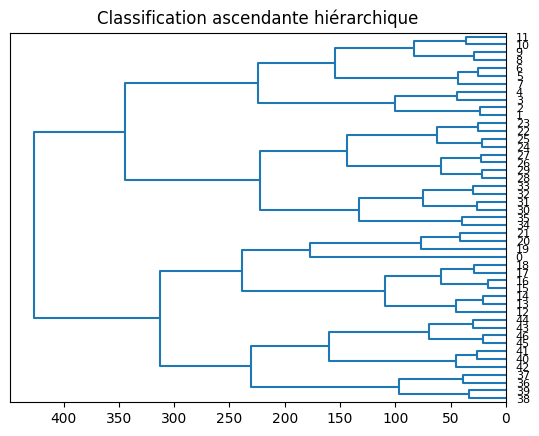

Indice de Calinski Harabasz: 50.41814810856031
   ID
0    
1  22
2  14
3  11 ACP 3


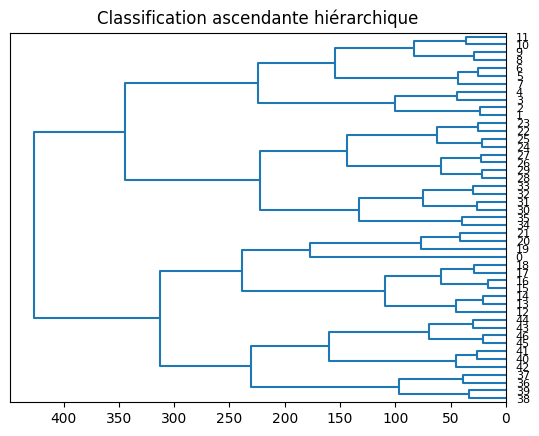

Indice de Calinski Harabasz: 8.501922265010291
   ID
0    
1  22
2  25 ACP 2


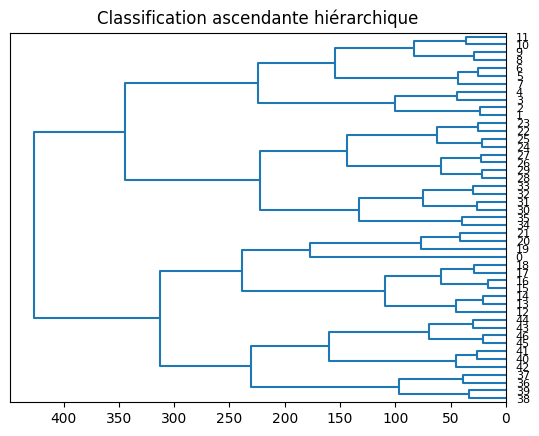

Indice de Calinski Harabasz: 29.035642119571055
   ID
0    
1   4
2   7
3   7
4   4
5  14
6   4
7   7 ACP 7


In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Define your data and variables

def CAH(df_reduced, k, dataframe, method_eval_scale=False):
    # Define df_compare before using it
    if method_eval_scale == True:
        df_compare = df_scaled
    else:
        df_compare = df_day[df_day.columns[1:]].transpose().apply(pd.to_datetime).astype('int64') // 10**9
    
    Z = linkage(df_reduced, method='ward', metric='euclidean')
    plt.title("Classification ascendante hiérarchique")
    dendrogram(Z, orientation='left', color_threshold=3)
    plt.show()
    
    groupes_cah = fcluster(Z, t=k, criterion='maxclust')
    df_cah_1 = pd.DataFrame(groupes_cah)
    df_cah_1["ID"] = df_cah_1.index
    
    # Ensure df_compare and df_cah_1 have the same number of samples
    df_compare = df_compare.iloc[:len(df_cah_1)]
    
    print("Indice de Calinski Harabasz:", calinski_harabasz_score(X=df_compare.values, labels=df_cah_1[0].values))
    
    if dataframe == True:
        return df_cah_1.set_index("ID", drop=True)
    else:
        return df_cah_1.groupby([0]).count()


# Example usage
# Assuming you have defined your dataframes: df_acp, df_scaled, and df_day


# Call the function with different values of k and print the results

for k in [3, 2, 7]:
    print(CAH(df_acp, k, dataframe=False), 'ACP', k)

In [261]:
df_features

Moyenne   Minimum   Maximum  mois_conso_max  mois_conso_min  \
appt_1   0.500000  0.000000  1.000000            8640            1488   
appt_2   0.504960  0.000000  1.000000            2884            1488   
appt_3   0.522717  0.000000  1.000000            2884            1488   
appt_4   0.513573  0.000000  1.000000            2884            1488   
appt_5   0.501760  0.000000  1.000000            2884            1488   
appt_6   0.531551  0.000000  1.000000            2884            1488   
appt_7   0.530095  0.000000  1.000000            2884            1488   
appt_8   0.494382  0.000000  1.000000            2884            1488   
appt_9   0.485881  0.000000  1.000000            2884            4464   
appt_10  0.483089  0.000000  1.000000            2884            4464   
appt_11  0.495022  0.000000  1.000000            2884            4464   
appt_12  0.531531  0.000000  1.000000            2884            1488   
appt_13  0.567089  0.000000  1.000000            2884            7440   
appt_14  0.571088  0.000000  1.000000            2884            7440   
appt_15  0.545523  0.000000  1.000000            2884            7440   
appt_16  0.515472  0.000000  1.000000            1488            2884   
appt_17  0.517466  0.000000  1.000000            1488            2884   
appt_18  0.517266  0.000000  1.000000            1488            2884   
appt_19  0.487235  0.000000  1.000000            1488            2884   
appt_20  0.493623  0.000000  1.000000            1488            2884   
appt_21  0.454694  0.000000  1.000000            1488            2884   
appt_22  0.463164  0.000000  1.000000            1488            2884   
appt_23  0.465274  0.000000  1.000000            1488            2884   
appt_24  0.465657  0.000000  1.000000            1488            2884   
appt_25  0.449112  0.000000  1.000000            1488            2884   
appt_26  0.486698  0.000000  1.000000            1488            2884   
appt_27  0.475896  0.000000  1.000000            1488            2884   
appt_28  0.462146  0.000000  1.000000            1488            2884   
appt_29  0.443026  0.000000  1.000000            1488            2884   
appt_30  0.455987  0.000000  1.000000            1488            2884   
appt_31  0.448902  0.000000  1.000000            1488            2884   
appt_32  0.463148  0.000000  1.000000            1488            2884   
appt_33  0.478467  0.000000  1.000000            1488            2884   
appt_34  0.519425  0.000000  1.000000            1488            2884   
appt_35  0.523508  0.000000  1.000000            8640            2884   
appt_36  0.523479  0.000000  1.000000            4464            2884   
appt_37  0.511669  0.000000  1.000000            4464            2884   
appt_38  0.489795  0.000000  1.000000            4464            2884   
appt_39  0.499931  0.000000  1.000000            1488            2884   
appt_40  0.513490  0.000000  1.000000            1488            2884   
appt_41  0.529240  0.000000  1.000000            1488            2884   
appt_42  0.542042  0.000000  1.000000            1488            2884   
appt_43  0.575235  0.000000  1.000000            1488            2884   
appt_44  0.585302  0.000000  1.000000            1488            2884   
appt_45  0.566694  0.000000  1.000000            4464            2884   
appt_46  0.528709  0.000000  1.000000            4464            2884   
appt_47  0.533273  0.000000  1.000000            7440            2884   
APPART  -0.095035 -1.558130  1.299174            2884            8640   
JOUR    -0.340634 -2.045567  1.602866            2884            1488   

         jour_conso_max  jour_conso_min  
appt_1             9009               0  
appt_2             6515            3340  
appt_3             6515            3340  
appt_4             3646            3340  
appt_5             6479            4463  
appt_6             8601            2284  
appt_7             5777            2284  
appt_8             4348

##### b- Méthodes direct <a class="anchor" id="section_6_1_2"></a>


`Une approche de classification ascendante hiérarchique (CAH)` basée sur l'extraction directe des caractéristiques de données. Cette méthode consiste à appliquer la CAH aux données brutes sans effectuer de prétraitement supplémentaire tel que la réduction de dimensionnalité ou la normalisation.


La méthode directe a l'avantage de dériver des clusters à partir des caractéristiques brutes, ce qui peut être utile lorsque vous souhaitez explorer la structure des données sans appliquer de transformations préalables. Cependant, il peut également être bénéfique d'explorer d'autres variantes de la CAH en utilisant des approches basées sur l'extraction de caractéristiques, telles que l'analyse en composantes principales (ACP) pour la réduction de dimension ou la normalisation des données.

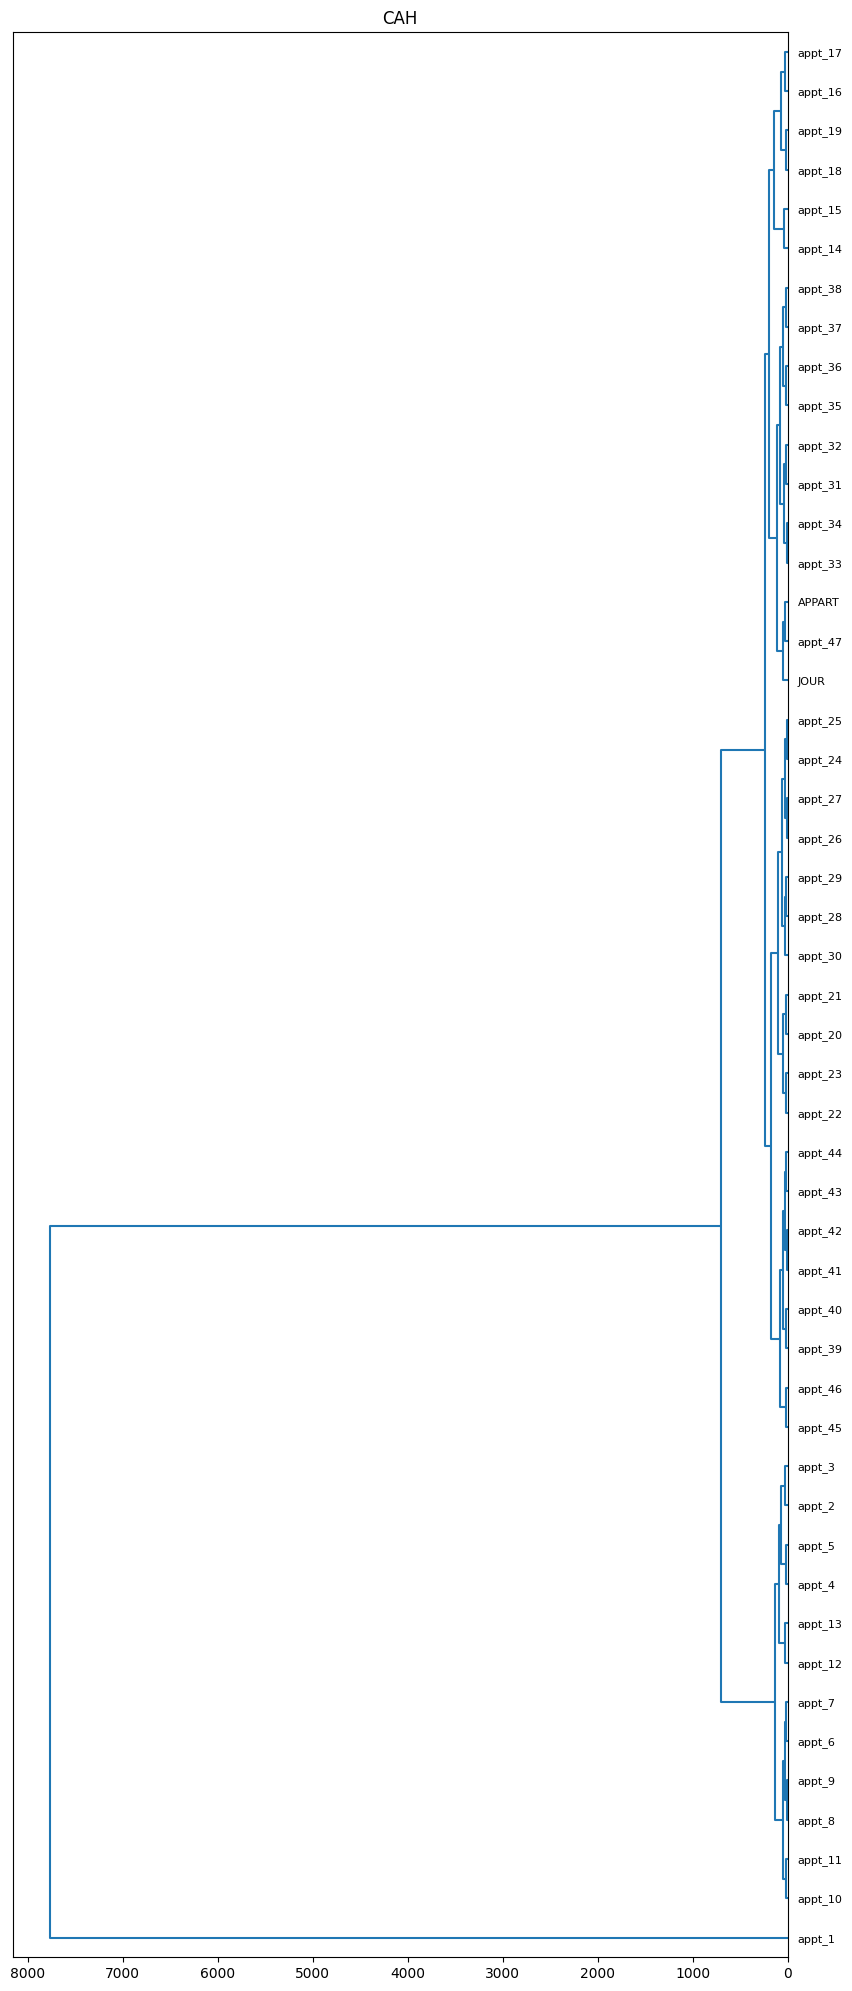

In [262]:
#librairies pour la CAH

from matplotlib import pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Convertir les valeurs de type Timestamp en format numérique
df_transposed = df_day[df_day.columns[1:]].transpose()
df_numeric = df_transposed.apply(pd.to_numeric, errors='coerce')

# Supprimer les lignes qui contiennent des valeurs manquantes
df_numeric.dropna(inplace=True)

# Générer la matrice des liens
Z = linkage(df_numeric, method='ward', metric='euclidean')

# Affichage du dendrogramme
plt.figure(figsize=(10, 25))
plt.title("CAH")
dendrogram(Z, labels=df_numeric.index, orientation='left', color_threshold=0)
plt.show()

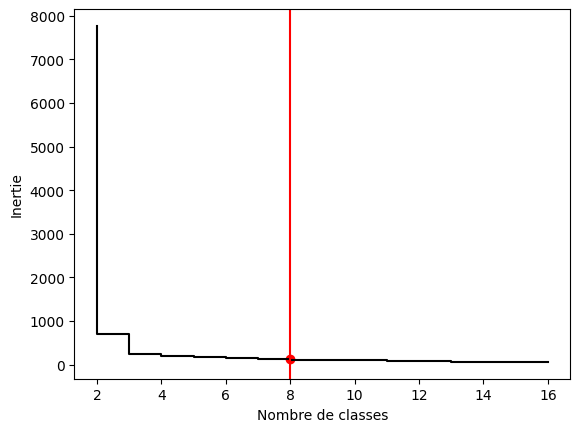

In [263]:
import numpy as np

last = Z[-15:, 2]

last_rev = last[::-1]

idxs = np.arange(2, len(last) + 2)

plt.step(idxs, last_rev, c="black")

plt.xlabel("Nombre de classes")

plt.ylabel("Inertie")

nombre = 8 # Ici, on teste le scénario où il y aurait 8 catégories

plt.scatter(idxs[np.where(idxs==nombre)], last_rev[np.where(idxs==nombre)], c="red")

plt.axvline(idxs[np.where(idxs==nombre)], c="red")

plt.show()

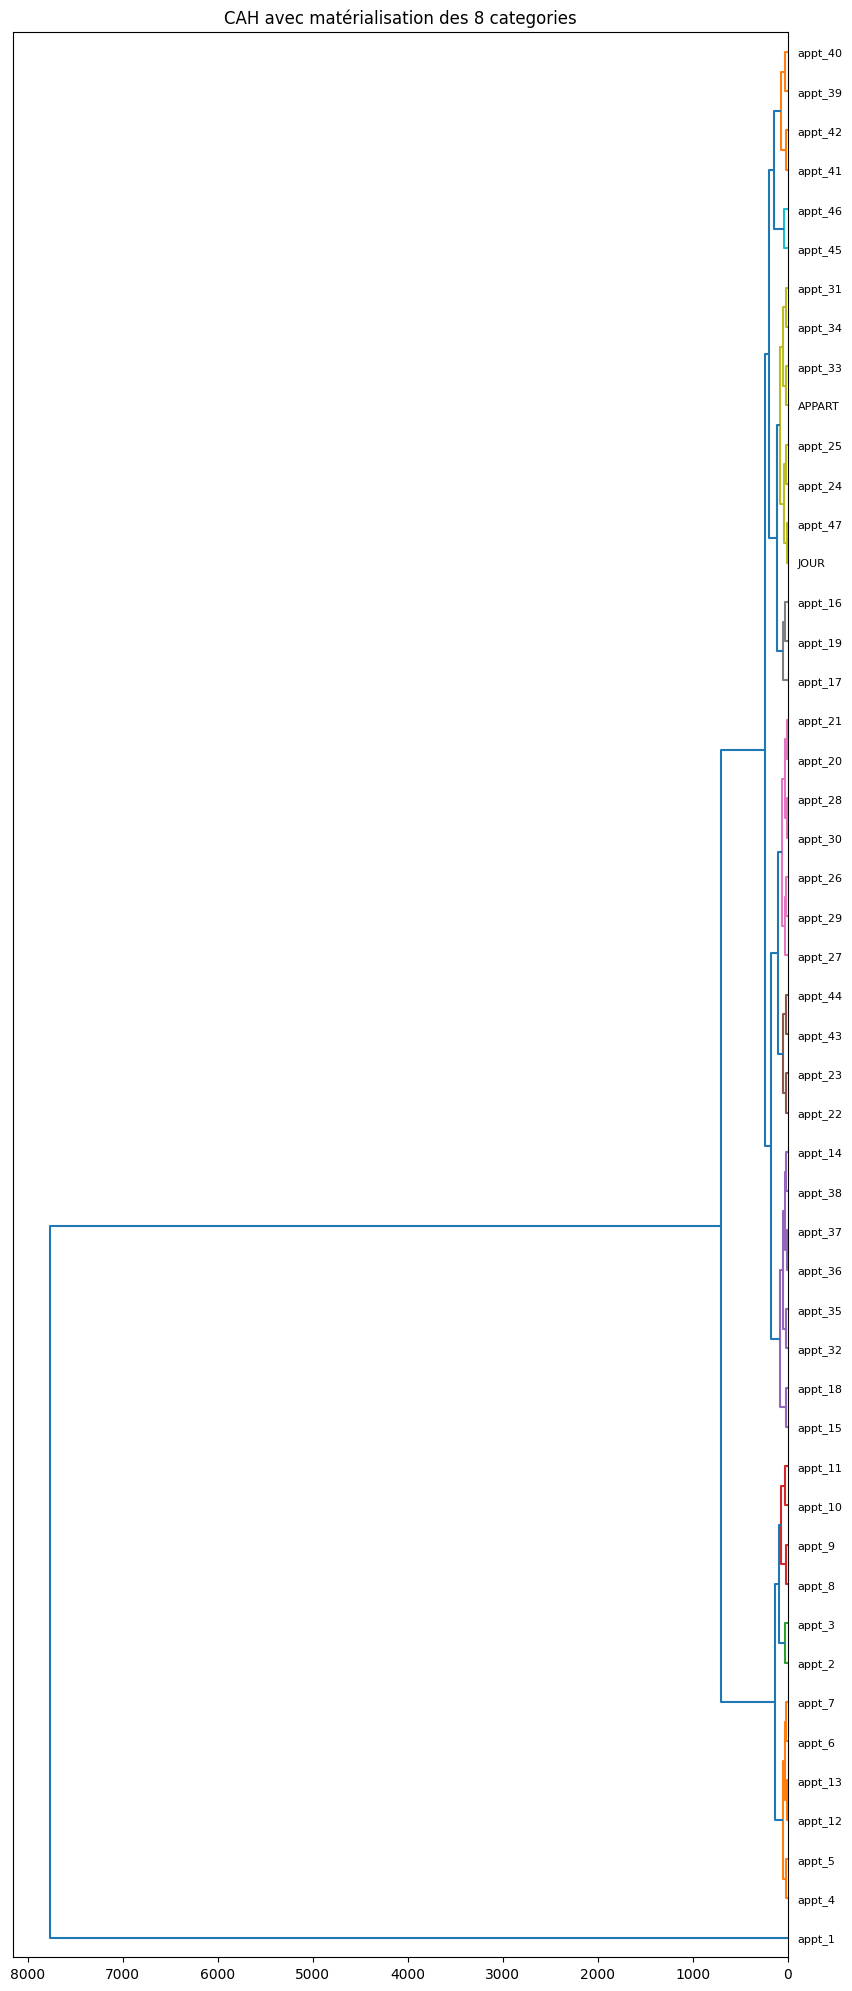

In [264]:
from scipy.cluster import hierarchy

df_labels = df_day[df_day.columns[1:]].transpose().index
new_labels = [df_labels[i] for i in hierarchy.leaves_list(Z)]

plt.figure(figsize=(10, 25))
plt.title('CAH avec matérialisation des 8 categories')
dendrogram(Z, labels=new_labels, orientation='left', color_threshold=85)
plt.show()

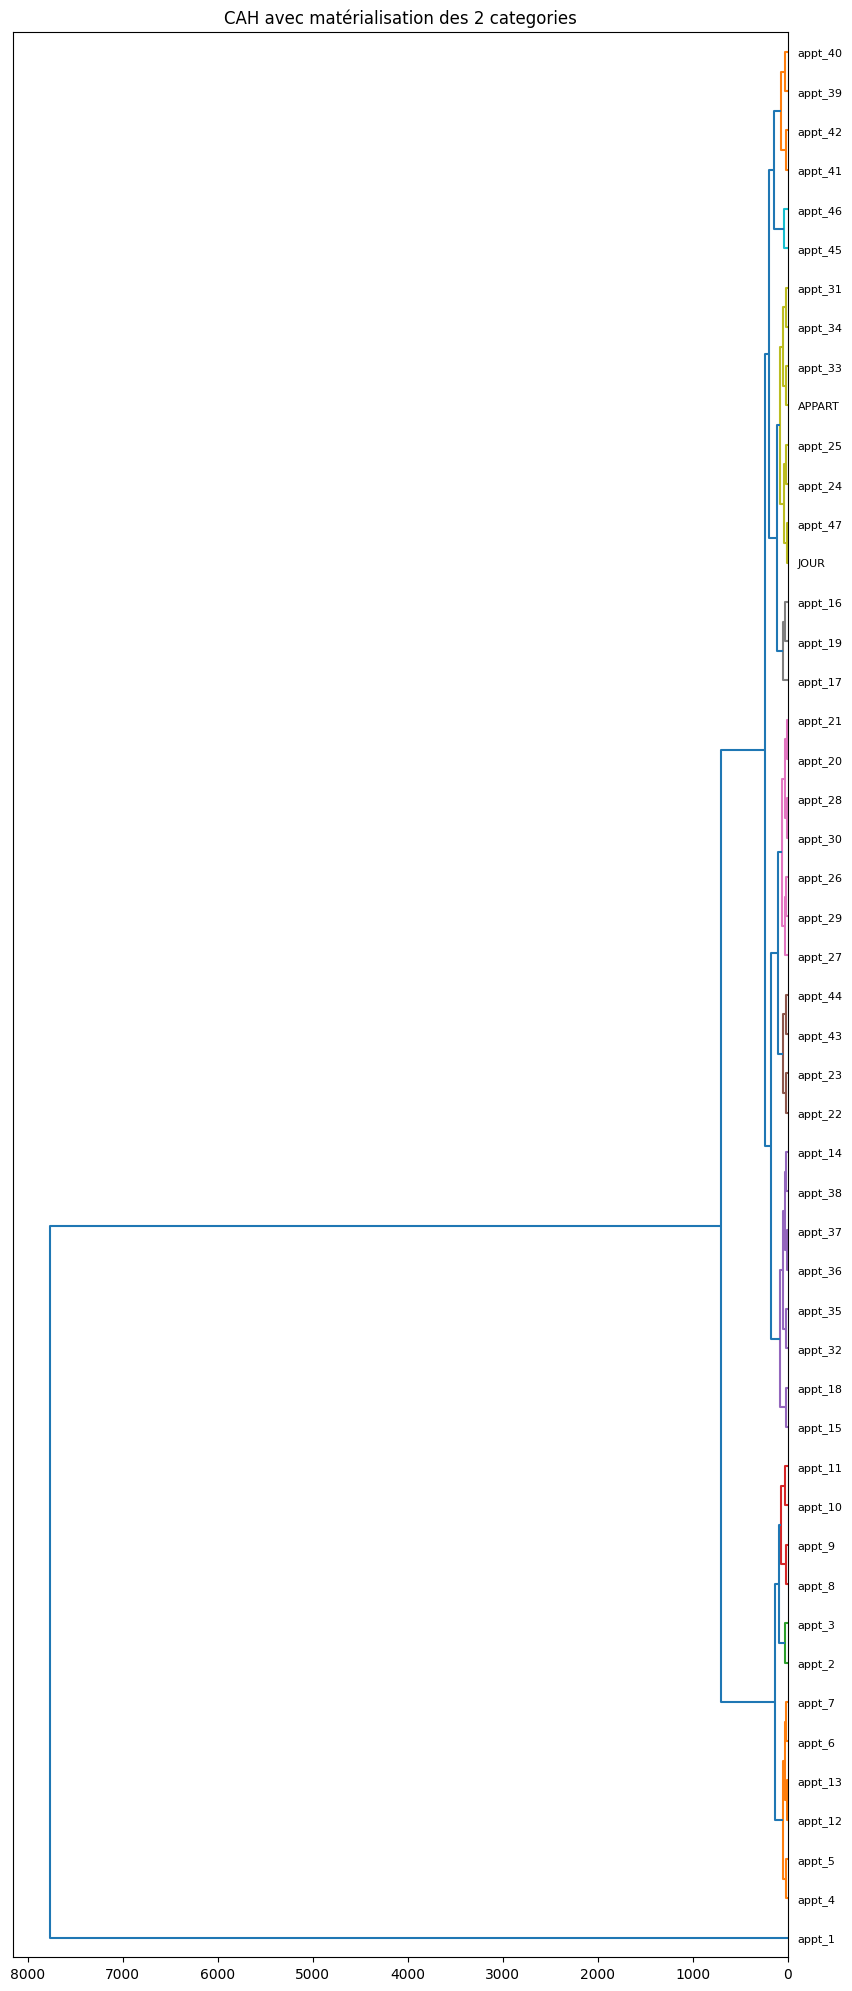

[11  3  3  3  3  1  1  1  1  1  1  2  2  9  9 10 10 10 10  5  5  5  5  6
  6  6  6  6  6  6  8  8  8  8  8  8  8  8  4  4  4  4  4  4  4  4  7  7
  7]


In [265]:
from scipy.cluster import hierarchy

df_labels = df_day[df_day.columns[1:]].transpose().index
new_labels = [df_labels[i] for i in hierarchy.leaves_list(Z)]

plt.figure(figsize=(10, 25))
plt.title('CAH avec matérialisation des 2 categories')
dendrogram(Z, labels=new_labels, orientation='left', color_threshold=97)
plt.show()

groupes_cah = fcluster(Z, t=97, criterion='distance')
print(groupes_cah)

#### 6 - 2 K-means : <a class="anchor" id="section_6_2"></a>


- L'objectif de la classification `K-means` est de regrouper des points de données similaires en minimisant la variance intra-classe. Il s'agit d'un algorithme d'apprentissage non supervisé qui vise à trouver la meilleure façon de diviser les données en un certain nombre de clusters (spécifié par l'hyperparamètre 'k'). L'algorithme fonctionne en assignant itérativement les points de données au centroïde le plus proche, puis en mettant à jour les centroïdes jusqu'à ce qu'une convergence soit atteinte.

C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\clus

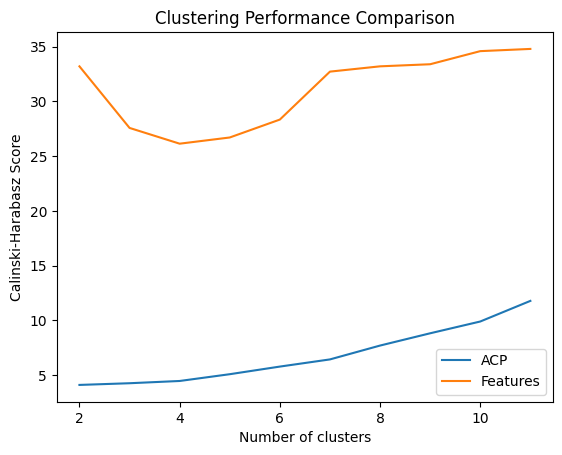

In [266]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score

# Preprocess the data
df_acp_preprocessed = df_acp.select_dtypes(exclude=['datetime64'])  # Select non-timestamp columns of ACP data
df_features_preprocessed = df_features.select_dtypes(exclude=['datetime64'])  # Select non-timestamp columns of other features data

scaler = StandardScaler()  # Initialize the StandardScaler
df_acp_scaled = scaler.fit_transform(df_acp_preprocessed)  # Scale the ACP data
df_features_scaled = scaler.fit_transform(df_features_preprocessed)  # Scale the other features data

# Imputation of missing values (if necessary)
df_acp_scaled = pd.DataFrame(df_acp_scaled).fillna(0)  # Fill missing values in the scaled ACP data with zeros
df_features_scaled = pd.DataFrame(df_features_scaled).fillna(0)  # Fill missing values in the scaled other features data with zeros

# Clustering function
def df_kmeans(data, k, print_groups=False):
    cluster = KMeans(n_clusters=k, random_state=42)  # Initialize the KMeans algorithm with 'k' clusters
    cluster.fit(data)  # Fit the clusters to the data
    results = pd.DataFrame(cluster.predict(data))  # Get the predicted cluster labels
    if print_groups:
        return results  # Return the predicted cluster labels
    else:
        return calinski_harabasz_score(data, cluster.predict(data))  # Calculate and return the Calinski-Harabasz score

# Perform clustering and evaluate Calinski-Harabasz score for different numbers of clusters
cluster_scores_acp = []
cluster_scores_features = []

for k in range(2, 12):
   cluster_scores_acp.append(df_kmeans(df_acp_scaled, k))  # Perform clustering and calculate Calinski-Harabasz score for ACP data
   cluster_scores_features.append(df_kmeans(df_features_scaled, k))  # Perform clustering and calculate Calinski-Harabasz score for other features data

# Plot the results
plt.plot(range(2, 12), cluster_scores_acp, label="ACP")  # Plot the Calinski-Harabasz scores for ACP data
plt.plot(range(2, 12), cluster_scores_features, label="Features")  # Plot the Calinski-Harabasz scores for other features data
plt.legend()
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Score")
plt.title("Clustering Performance Comparison")
plt.show()

Dans ce code, nous avons utilisé la méthode de classification `K-means` pour regrouper les données en fonction de leur similarité. L'objectif était d'évaluer la performance de la classification en utilisant le score Calinski-Harabasz.

Avant d'appliquer la classification `K-means` , nous avons effectué un prétraitement des données. Tout d'abord, nous avons exclu les colonnes contenant des horodatages, car elles n'étaient pas pertinentes pour la classification. Ensuite, nous avons mis à l'échelle les caractéristiques numériques à l'aide de la méthode `StandardScaler`. Cela a permis de mettre toutes les caractéristiques à la même échelle et d'éviter que certaines d'entre elles ne dominent les autres lors de la classification. De plus, si des valeurs manquantes étaient présentes, nous les avons remplies avec des zéros.

Nous avons créé une fonction appelée `df_kmeans` qui a effectué la classification `K-means`. Cette fonction a utilisé l'algorithme KMeans de la bibliothèque scikit-learn et a renvoyé soit les étiquettes de cluster prédites pour chaque point de données, soit le score Calinski-Harabasz. Ce score est une mesure de la qualité de la classification, qui prend en compte à la fois la variance intra-classe et la variance inter-classe. Plus le score est élevé, meilleure est la classification.

Nous avons ensuite itéré sur différents nombres de clusters, allant de 2 à 11, et pour chaque nombre de clusters, nous avons calculé le score de classification pour les données ACP et pour les autres caractéristiques. Nous avons stocké ces scores dans deux listes différentes.

Enfin, nous avons tracé les scores Calinski-Harabasz pour les données ACP et pour les autres caractéristiques en fonction du nombre de clusters. Cette comparaison visuelle nous a permis de voir comment la performance de la classification variait en fonction du nombre de clusters. Ceci est important pour choisir le nombre optimal de clusters, car nous voulons trouver un équilibre entre une bonne séparation des clusters et une évolution minimale des scores au-delà d'un certain nombre de clusters.

C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python311\site-packages\sklearn\clus

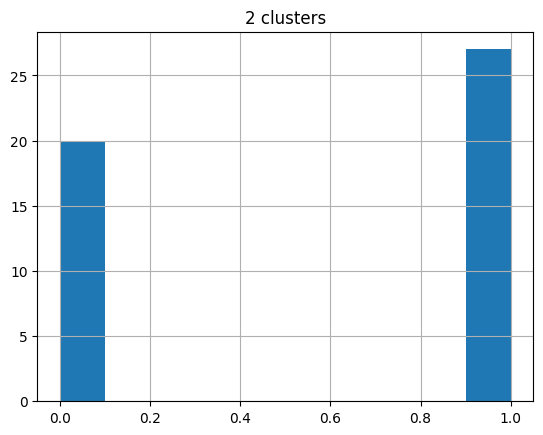

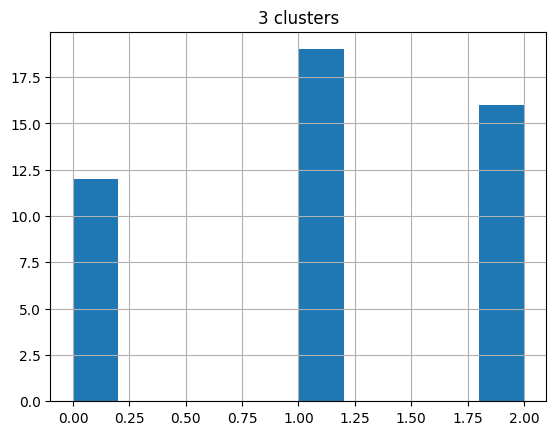

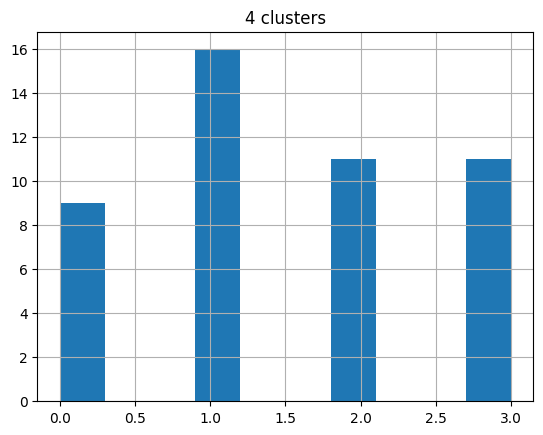

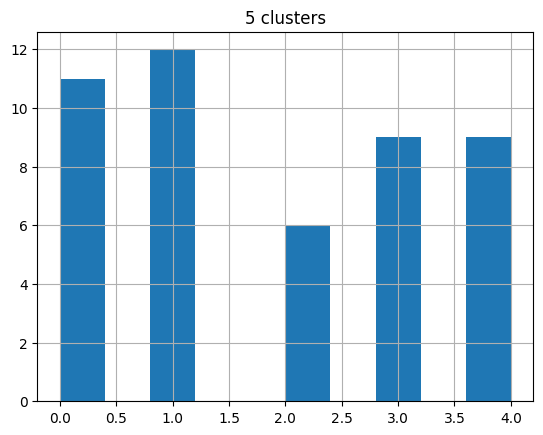

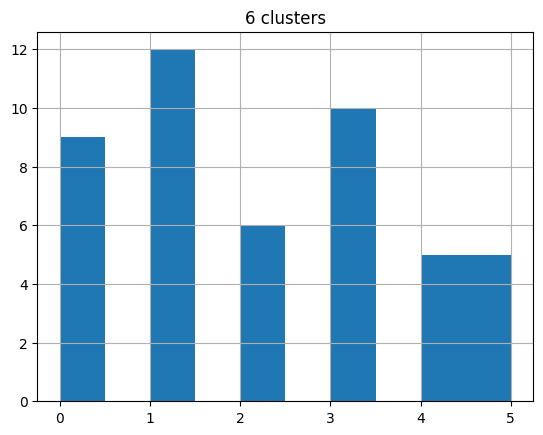

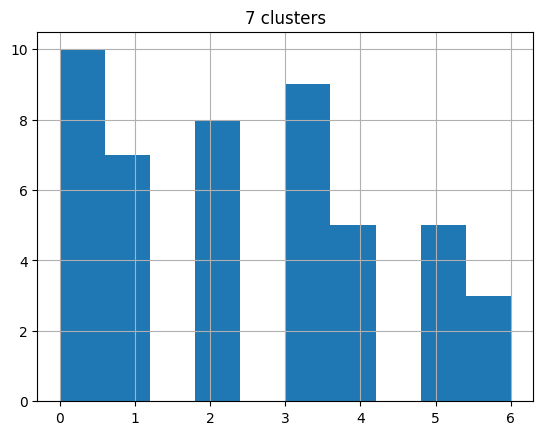

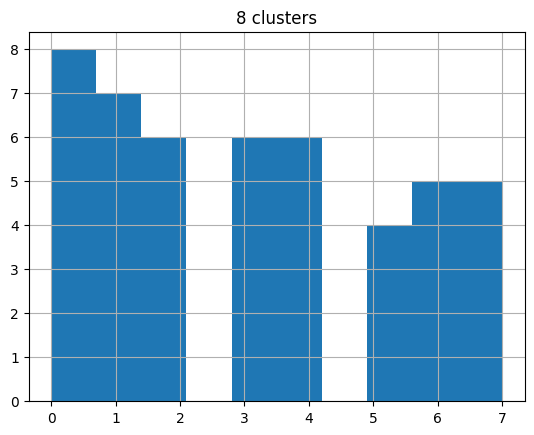

In [267]:
# Pour chaque valeur de k dans la liste [2, 3, 4, 5, 6, 7, 8]: Nous appliquons la fonction `df_kmeans(df_acp, k, True)` pour effectuer la classification K-means sur les données ACP et obtenir les étiquettes de cluster prédites.
for k in [2,3,4,5,6,7,8]:
    df_kmeans(df_acp, k , True).hist()
    plt.title(label = '{} clusters'.format(k))

In [268]:
df_day[df_day.columns[1:]].transpose()

0                    1                    2     \
appt_1                     1                    1                    1   
appt_2             -1.786785            -0.394478            -1.216742   
appt_3             -1.759306            -0.634234            -1.395422   
appt_4             -1.731826             -0.87399            -1.574103   
appt_5             -1.657497            -1.012224            -1.741657   
appt_6             -1.504801            -0.992106            -1.879992   
appt_7             -1.303554            -0.935577            -1.943143   
appt_8             -1.099353            -0.966903            -1.897188   
appt_9               -0.9396            -1.040886            -1.784239   
appt_10            -0.834307            -1.074217            -1.650855   
appt_11            -0.642136            -1.000619            -1.485354   
appt_12            -0.230324            -0.781303            -1.255485   
appt_13             0.348231            -0.470393            -0.904942   
appt_14             0.985322            -0.130235            -0.401159   
appt_15              1.53716             0.236877             0.169436   
appt_16             1.873021             0.626042             0.696217   
appt_17             1.950017               0.9619             1.090751   
appt_18             1.758666             1.159292             1.289281   
appt_19             1.335267             1.164337             1.304544   
appt_20             0.760507             0.961174             1.172522   
appt_21              0.24685             0.654756             0.945696   
appt_22            -0.015617             0.366022             0.679389   
appt_23            -0.058092             0.159045              0.42381   
appt_24             0.026336             0.057186             0.224886   
appt_25             0.118289            -0.022178             0.116524   
appt_26             0.119243            -0.148106             0.105141   
appt_27             0.040376             -0.22942             0.099195   
appt_28            -0.080661            -0.176036             0.011017   
appt_29            -0.210045            -0.062496             -0.13362   
appt_30            -0.301943             0.018642            -0.279142   
appt_31            -0.258677             0.067383            -0.364225   
appt_32            -0.021428             0.105366            -0.333761   
appt_33             0.261329             0.148215            -0.163265   
appt_34             0.444866             0.212743             0.138453   
appt_35             0.606731             0.326556             0.460024   
appt_36             0.850414             0.498261              0.69273   
appt_37             1.160902              0.64969             0.841027   
appt_38             1.483209             0.713221             0.939991   
appt_39             1.720966             0.750178              1.03401   
appt_40             1.796293             0.835603              1.15394   
appt_41             1.746644              0.97047             1.267196   
appt_42             1.617929             1.115326             1.333831   
appt_43              1.37453             1.143106              1.34789   
appt_44             0.991029             0.943505             1.308287   
appt_45             0.564313             0.560883             1.199404   
appt_46             0.200768             0.094956             1.006899   
appt_47            -0.077526            -0.287792             0.736046   
APPART             -0.276923            -0.456911             0.401007   
JOUR               -0.433195            -0.492853             0.031883   
Day      2022-01-01 00:00:00  2022-01-01 00:00:00  2022-01-01 00:00:00   

                        3                    4                    5     \
appt_1                     1                    1                    1   
appt_2             -0.796512            -0.077746            -1.315765   
appt_3             -1.18967

#### 6 - 3 Carte de Kohonen (Self Organizing Map SOM) : <a class="anchor" id="section_6_3"></a>


- `Self-Organizing Map (SOM)`, également appelé carte de Kohonen, est une technique d'apprentissage automatique non supervisée utilisée pour produire une représentation de faible dimension d'un ensemble de données de dimension supérieure tout en préservant la structure topologique des données. Il s'agit d'un type de réseau de neurones artificiels formé à l'aide d'un apprentissage compétitif, dans lequel les nœuds du réseau rivalisent pour représenter les données d'entrée. `Les SOM sont utilisés pour le regroupement, la visualisation et la réduction de la dimensionnalité, ce qui rend les données de grande dimension plus faciles à analyser et à interpréter. Ils consistent en une grille 2D de nœuds, et après l'apprentissage, les poids entraînés sont utilisés pour regrouper de nouveaux exemples`. Les SOM sont couramment utilisés pour des tâches telles que la visualisation des données, la détection d'anomalies, l'extraction de caractéristiques et le regroupement

- 
- 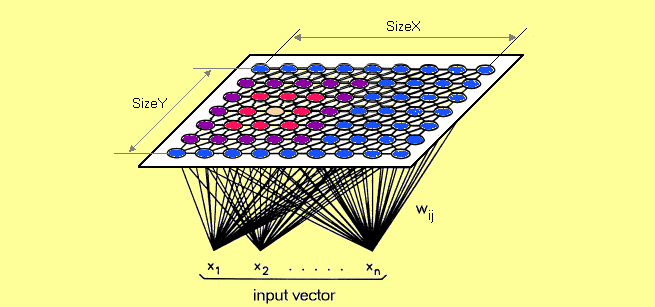![image.png]



In [194]:
df_day.head()

Time  appt_1    appt_2    appt_3    appt_4    appt_5  \
0 2022-01-01 00:00:00       1 -1.786785 -1.759306 -1.731826 -1.657497   
1 2022-01-01 00:30:00       1 -0.394478 -0.634234 -0.873990 -1.012224   
2 2022-01-01 01:00:00       1 -1.216742 -1.395422 -1.574103 -1.741657   
3 2022-01-01 01:30:00       1 -0.796512 -1.189678 -1.582845 -1.883616   
4 2022-01-01 02:00:00       1 -0.077746 -0.709023 -1.340300 -1.873472   

     appt_6    appt_7    appt_8    appt_9  ...  Fourier_41  Fourier_42  \
0 -1.504801 -1.303554 -1.099353 -0.939600  ...         0.0         0.0   
1 -0.992106 -0.935577 -0.966903 -1.040886  ...         0.0         0.0   
2 -1.879992 -1.943143 -1.897188 -1.784239  ...         0.0         0.0   
3 -2.029875 -2.080617 -2.097591 -2.032449  ...         0.0         0.0   
4 -2.216010 -2.297673 -2.089215 -1.703073  ...         0.0         0.0   

   Fourier_43  Fourier_44    Fourier_45    Fourier_46    Fourier_47  \
0         0.0         0.0  6.587466e-19  3.347764e-18  8.589760e-18   
1         0.0         0.0  4.992486e-18  1.021304e-17  1.552925e-17   
2         0.0         0.0  1.622385e-18  4.138768e-19  8.567597e-18   
3         0.0         0.0  2.682879e-18  3.040730e-18  1.270187e-17   
4         0.0         0.0  7.232216e-19  3.036937e-18  7.393048e-18   

     Fourier_48    Fourier_49    Fourier_50  
0  3.715182e-17  1.298389e-16  1.640995e+09  
1  4.236862e-18  4.196524e-17  1.640995e+09  
2  2.231629e-17  3.849234e-17  1.640995e+09  
3  2.529623e-17  9.389315e-17  1.640995e+09  
4  6.745077e-18  1.584733e-16  1.640995e+09  

[5 rows x 101 columns]

In [271]:
df_day["Day"] = df_day["Time"].dt.strftime("%d-%m")

In [272]:
df_day.head()

Time  appt_1    appt_2    appt_3    appt_4    appt_5  \
0 2022-01-01 00:00:00       1 -1.786785 -1.759306 -1.731826 -1.657497   
1 2022-01-01 00:30:00       1 -0.394478 -0.634234 -0.873990 -1.012224   
2 2022-01-01 01:00:00       1 -1.216742 -1.395422 -1.574103 -1.741657   
3 2022-01-01 01:30:00       1 -0.796512 -1.189678 -1.582845 -1.883616   
4 2022-01-01 02:00:00       1 -0.077746 -0.709023 -1.340300 -1.873472   

     appt_6    appt_7    appt_8    appt_9  ...   appt_41   appt_42   appt_43  \
0 -1.504801 -1.303554 -1.099353 -0.939600  ...  1.746644  1.617929  1.374530   
1 -0.992106 -0.935577 -0.966903 -1.040886  ...  0.970470  1.115326  1.143106   
2 -1.879992 -1.943143 -1.897188 -1.784239  ...  1.267196  1.333831  1.347890   
3 -2.029875 -2.080617 -2.097591 -2.032449  ...  1.309893  1.248746  1.033263   
4 -2.216010 -2.297673 -2.089215 -1.703073  ...  1.661399  1.647645  1.470649   

    appt_44   appt_45   appt_46   appt_47    APPART      JOUR    Day  
0  0.991029  0.564313  0.200768 -0.077526 -0.276923 -0.433195  01-01  
1  0.943505  0.560883  0.094956 -0.287792 -0.456911 -0.492853  01-01  
2  1.308287  1.199404  1.006899  0.736046  0.401007  0.031883  01-01  
3  0.756840  0.522058  0.398940  0.318105  0.197855  0.046630  01-01  
4  1.130163  0.676563  0.177488 -0.281004 -0.634296 -0.921962  01-01  

[5 rows x 51 columns]

In [273]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9100 entries, 0 to 9099
Data columns (total 51 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     9100 non-null   datetime64[ns]
 1   appt_1   9100 non-null   int64         
 2   appt_2   9100 non-null   float64       
 3   appt_3   9100 non-null   float64       
 4   appt_4   9100 non-null   float64       
 5   appt_5   9100 non-null   float64       
 6   appt_6   9100 non-null   float64       
 7   appt_7   9100 non-null   float64       
 8   appt_8   9100 non-null   float64       
 9   appt_9   9100 non-null   float64       
 10  appt_10  9100 non-null   float64       
 11  appt_11  9100 non-null   float64       
 12  appt_12  9100 non-null   float64       
 13  appt_13  9100 non-null   float64       
 14  appt_14  9100 non-null   float64       
 15  appt_15  9100 non-null   float64       
 16  appt_16  9100 non-null   float64       
 17  appt_17  9100 non-null   float64 

In [285]:
mySeries = []

# Parcourir chaque colonne sauf la première et ajouter les données correspondantes à mySeries
for i in merged_data.columns[1:].tolist():
    df1 = df_day.loc[:,["Day", str(i)]]  # Sélectionner les colonnes "Day" et la colonne courante
    df1.set_index("Day", inplace=True)  # Définir les dates comme index
    df1.sort_index(inplace=True)  # Trier les données en fonction de l'index de la date
    mySeries.append(df1)  # Ajouter les données à mySeries


In [286]:
series_lengths = {len(series) for series in mySeries}  #affiche l'ensemble des longueurs des séries
print(series_lengths)

{190}


In [287]:
#normaliser chaque série dans `mySeries`.
from sklearn.preprocessing import MinMaxScaler
for i in range(len(mySeries)):
    scaler = MinMaxScaler()
    mySeries[i] = MinMaxScaler().fit_transform(mySeries[i])  #`mySeries[i]` est remodelé en un tableau 1D pour correspondre au format des données originales
    mySeries[i]= mySeries[i].reshape(len(mySeries[i]))

In [288]:
import math
from minisom import MiniSom
som_x = som_y = math.ceil(math.sqrt(math.sqrt(len(mySeries))))
# we didn't see its significance but to make the map square,
# we calculated square root of map size which is 
# the square root of the number of series
# for the row and column counts of som

som = MiniSom(som_x, som_y,len(mySeries[0]), sigma=0.5, learning_rate = 0.5)

som.random_weights_init(mySeries)
som.train(mySeries, 100000)


In [289]:
# Little handy function to plot series
def plot_som_series_averaged_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(25,25))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(np.average(np.vstack(win_map[cluster]),axis=0),c="red")
                cluster_number = x*som_y+y+1
                axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()

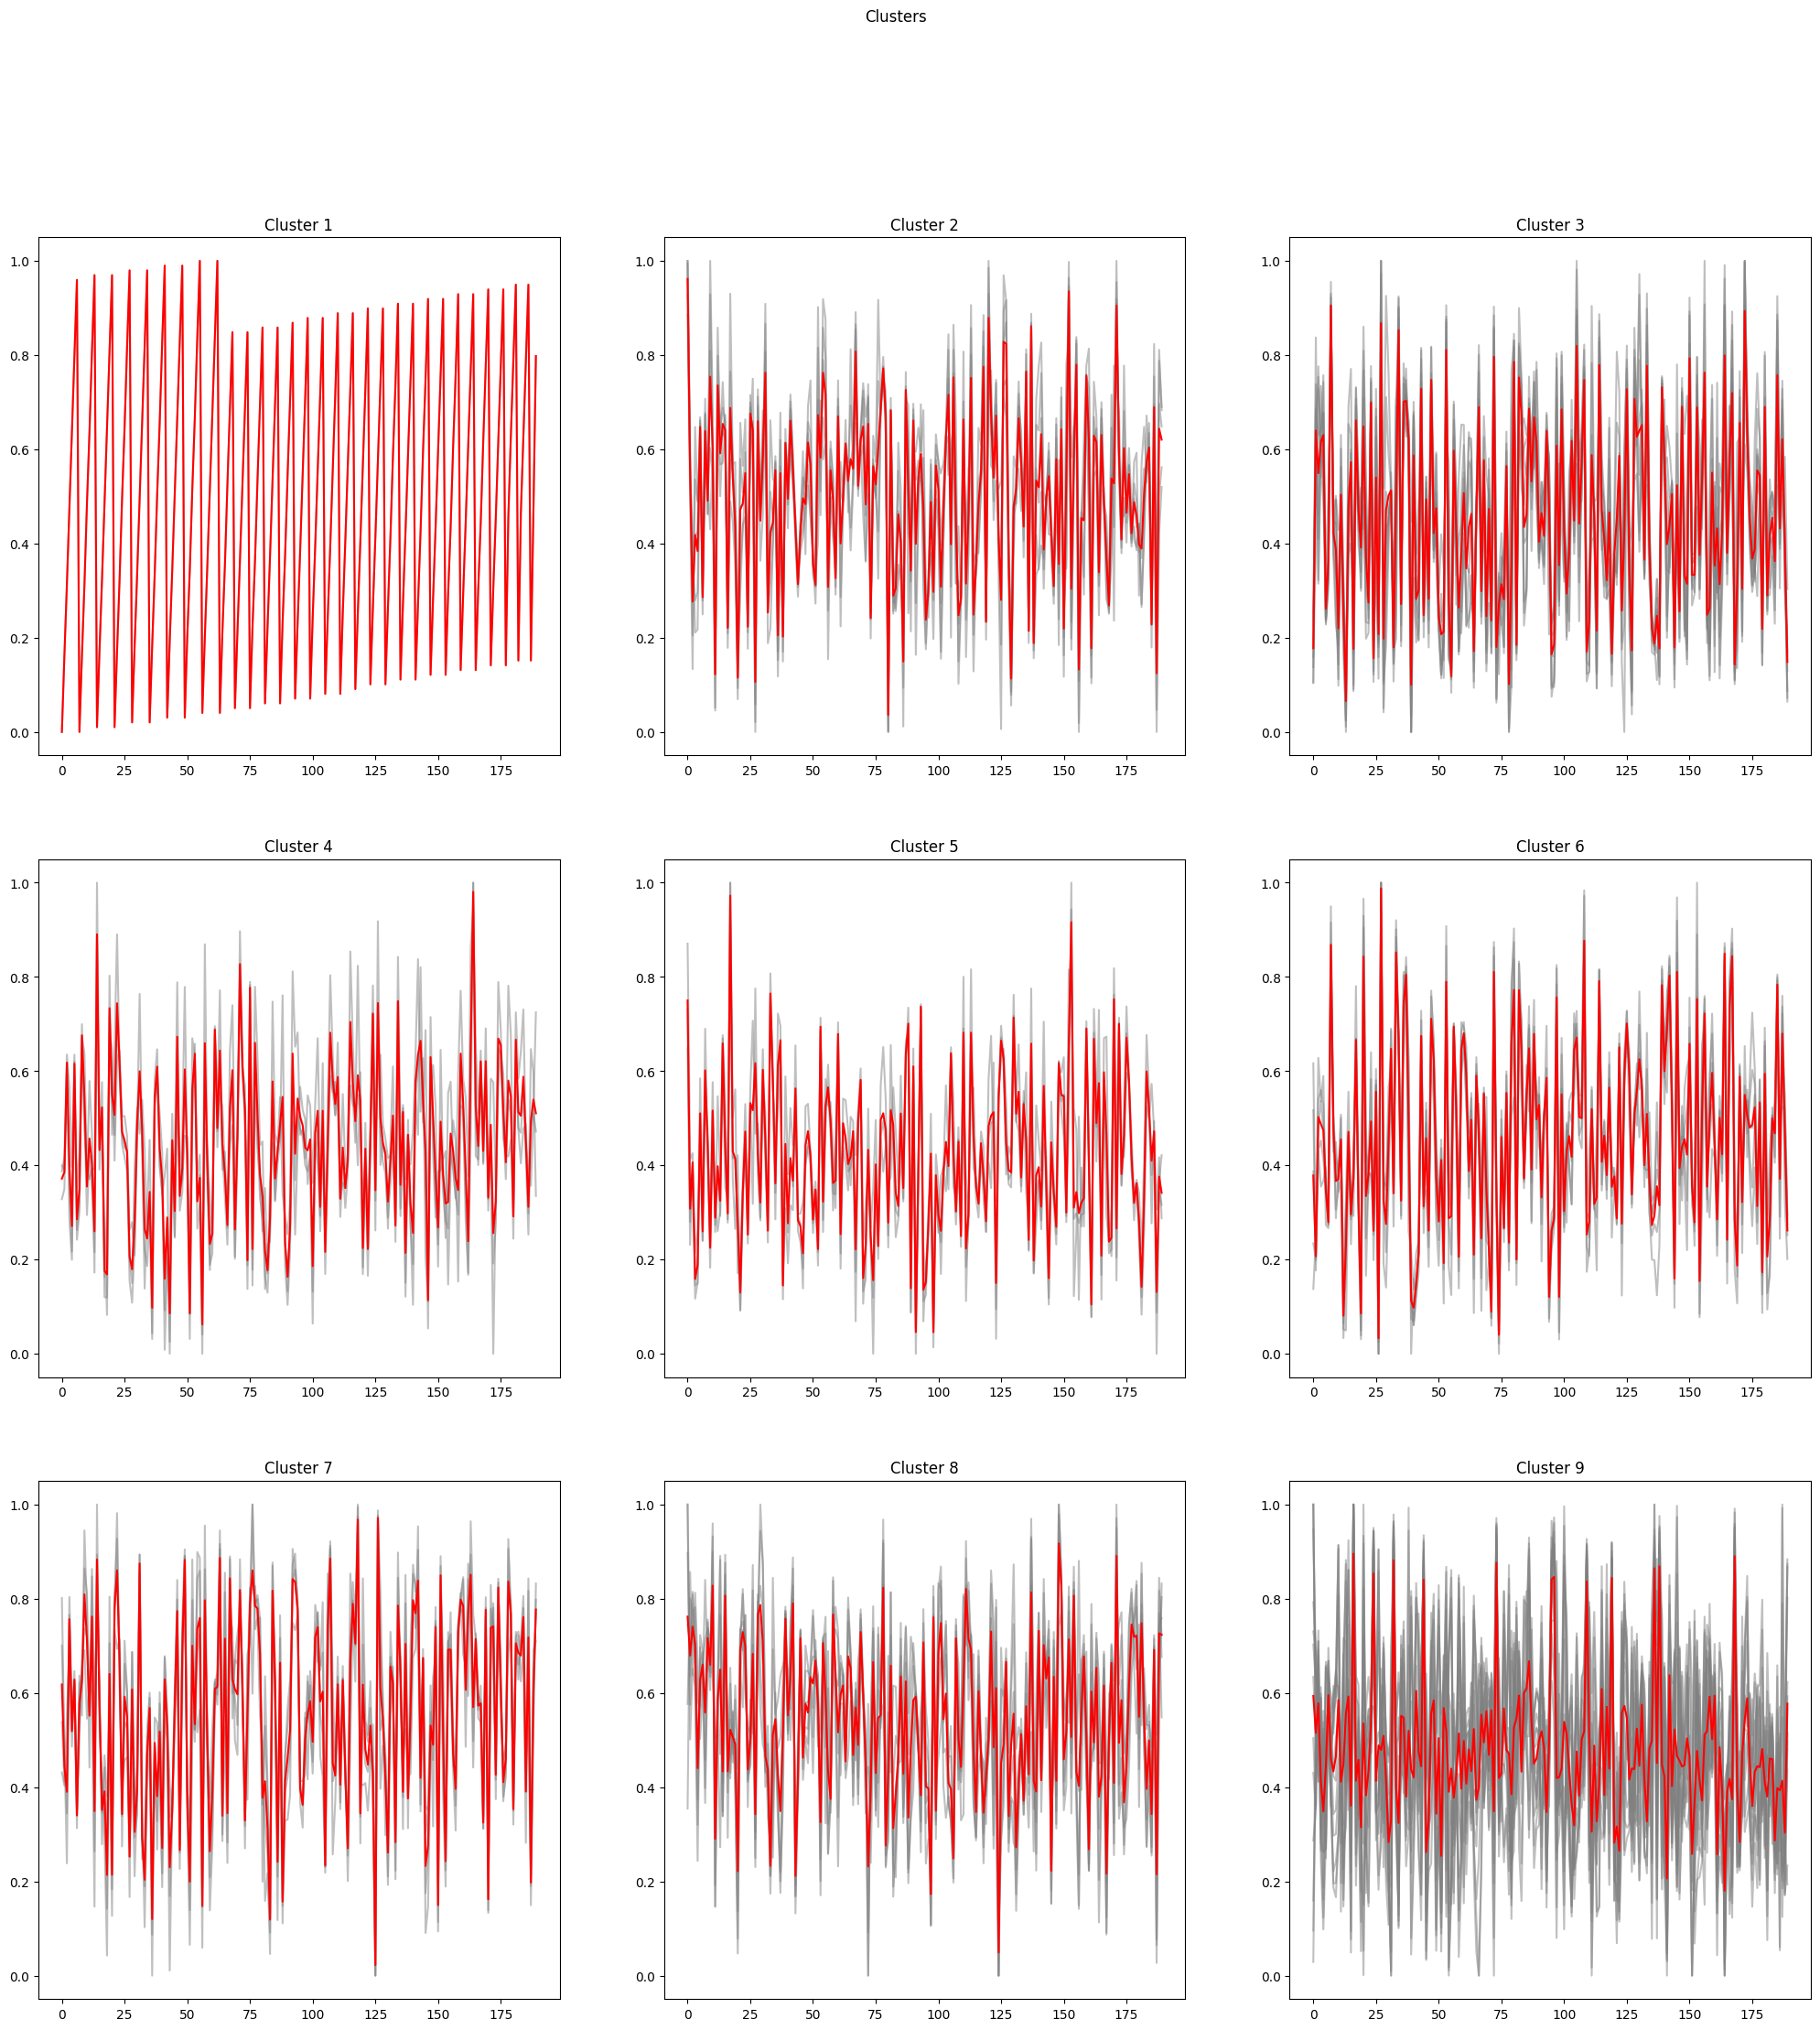

In [290]:
win_map = som.win_map(mySeries)
# Returns the mapping of the winner nodes and inputs

plot_som_series_averaged_center(som_x, som_y, win_map)

Comme nous pouvons le voir sur le graphique ci-dessous, som a parfaitement regroupé les 100 séries différentes en 9 clusters.

#### 6 - 4 La méthode DBA (Dynamic Time Warping Barycenter Averaging) : <a class="anchor" id="section_6_4"></a>


##### Implementation <a class="anchor" id="section_6_4_1"></a>


`La méthode DBA (Dynamic Time Warping Barycenter Averaging)` est une technique de moyennage utilisée pour extraire le mouvement ou la forme d'un cluster de séquences temporelles. Elle est souvent utilisée pour l'alignement temporel des séquences et permet de calculer leur barycentre, qui est une représentation moyenne du mouvement ou de la forme présente dans le cluster. `DBA` consiste en une stratégie heuristique conçue comme une méthode de moyennage global. C'est une méthode itérative qui affine une séquence moyenne à chaque itération en suivant un schéma d'espérance-maximisation. Elle est largement utilisée pour l'analyse de séries temporelles, le regroupement et la classification des séries temporelles, et elle a montré des performances supérieures par rapport à d'autres méthodes.


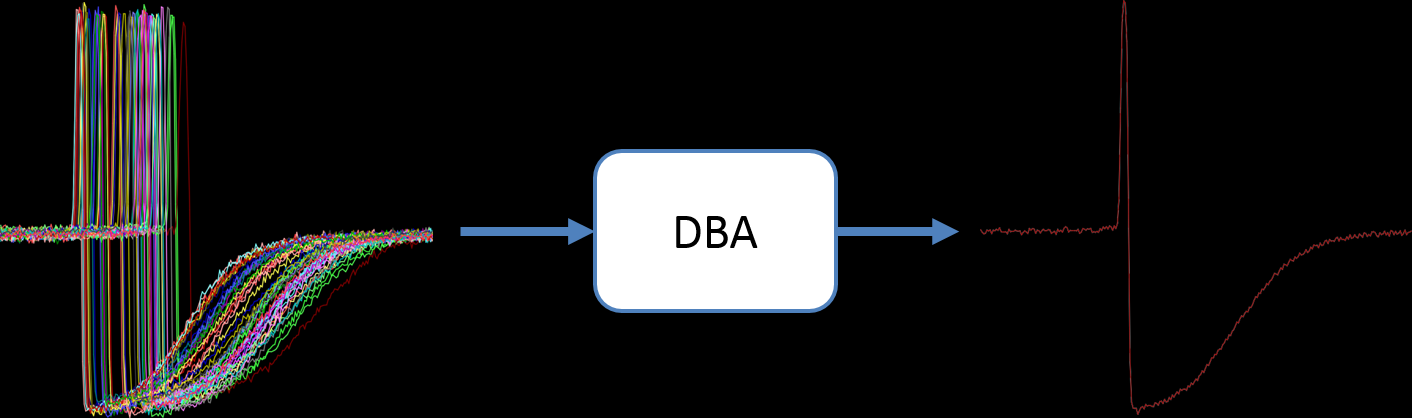![image.png]

In [291]:
from tslearn.barycenters import dtw_barycenter_averaging
def plot_som_series_dba_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(25,25))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(dtw_barycenter_averaging(np.vstack(win_map[cluster])),c="red") 
            cluster_number = x*som_y+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()

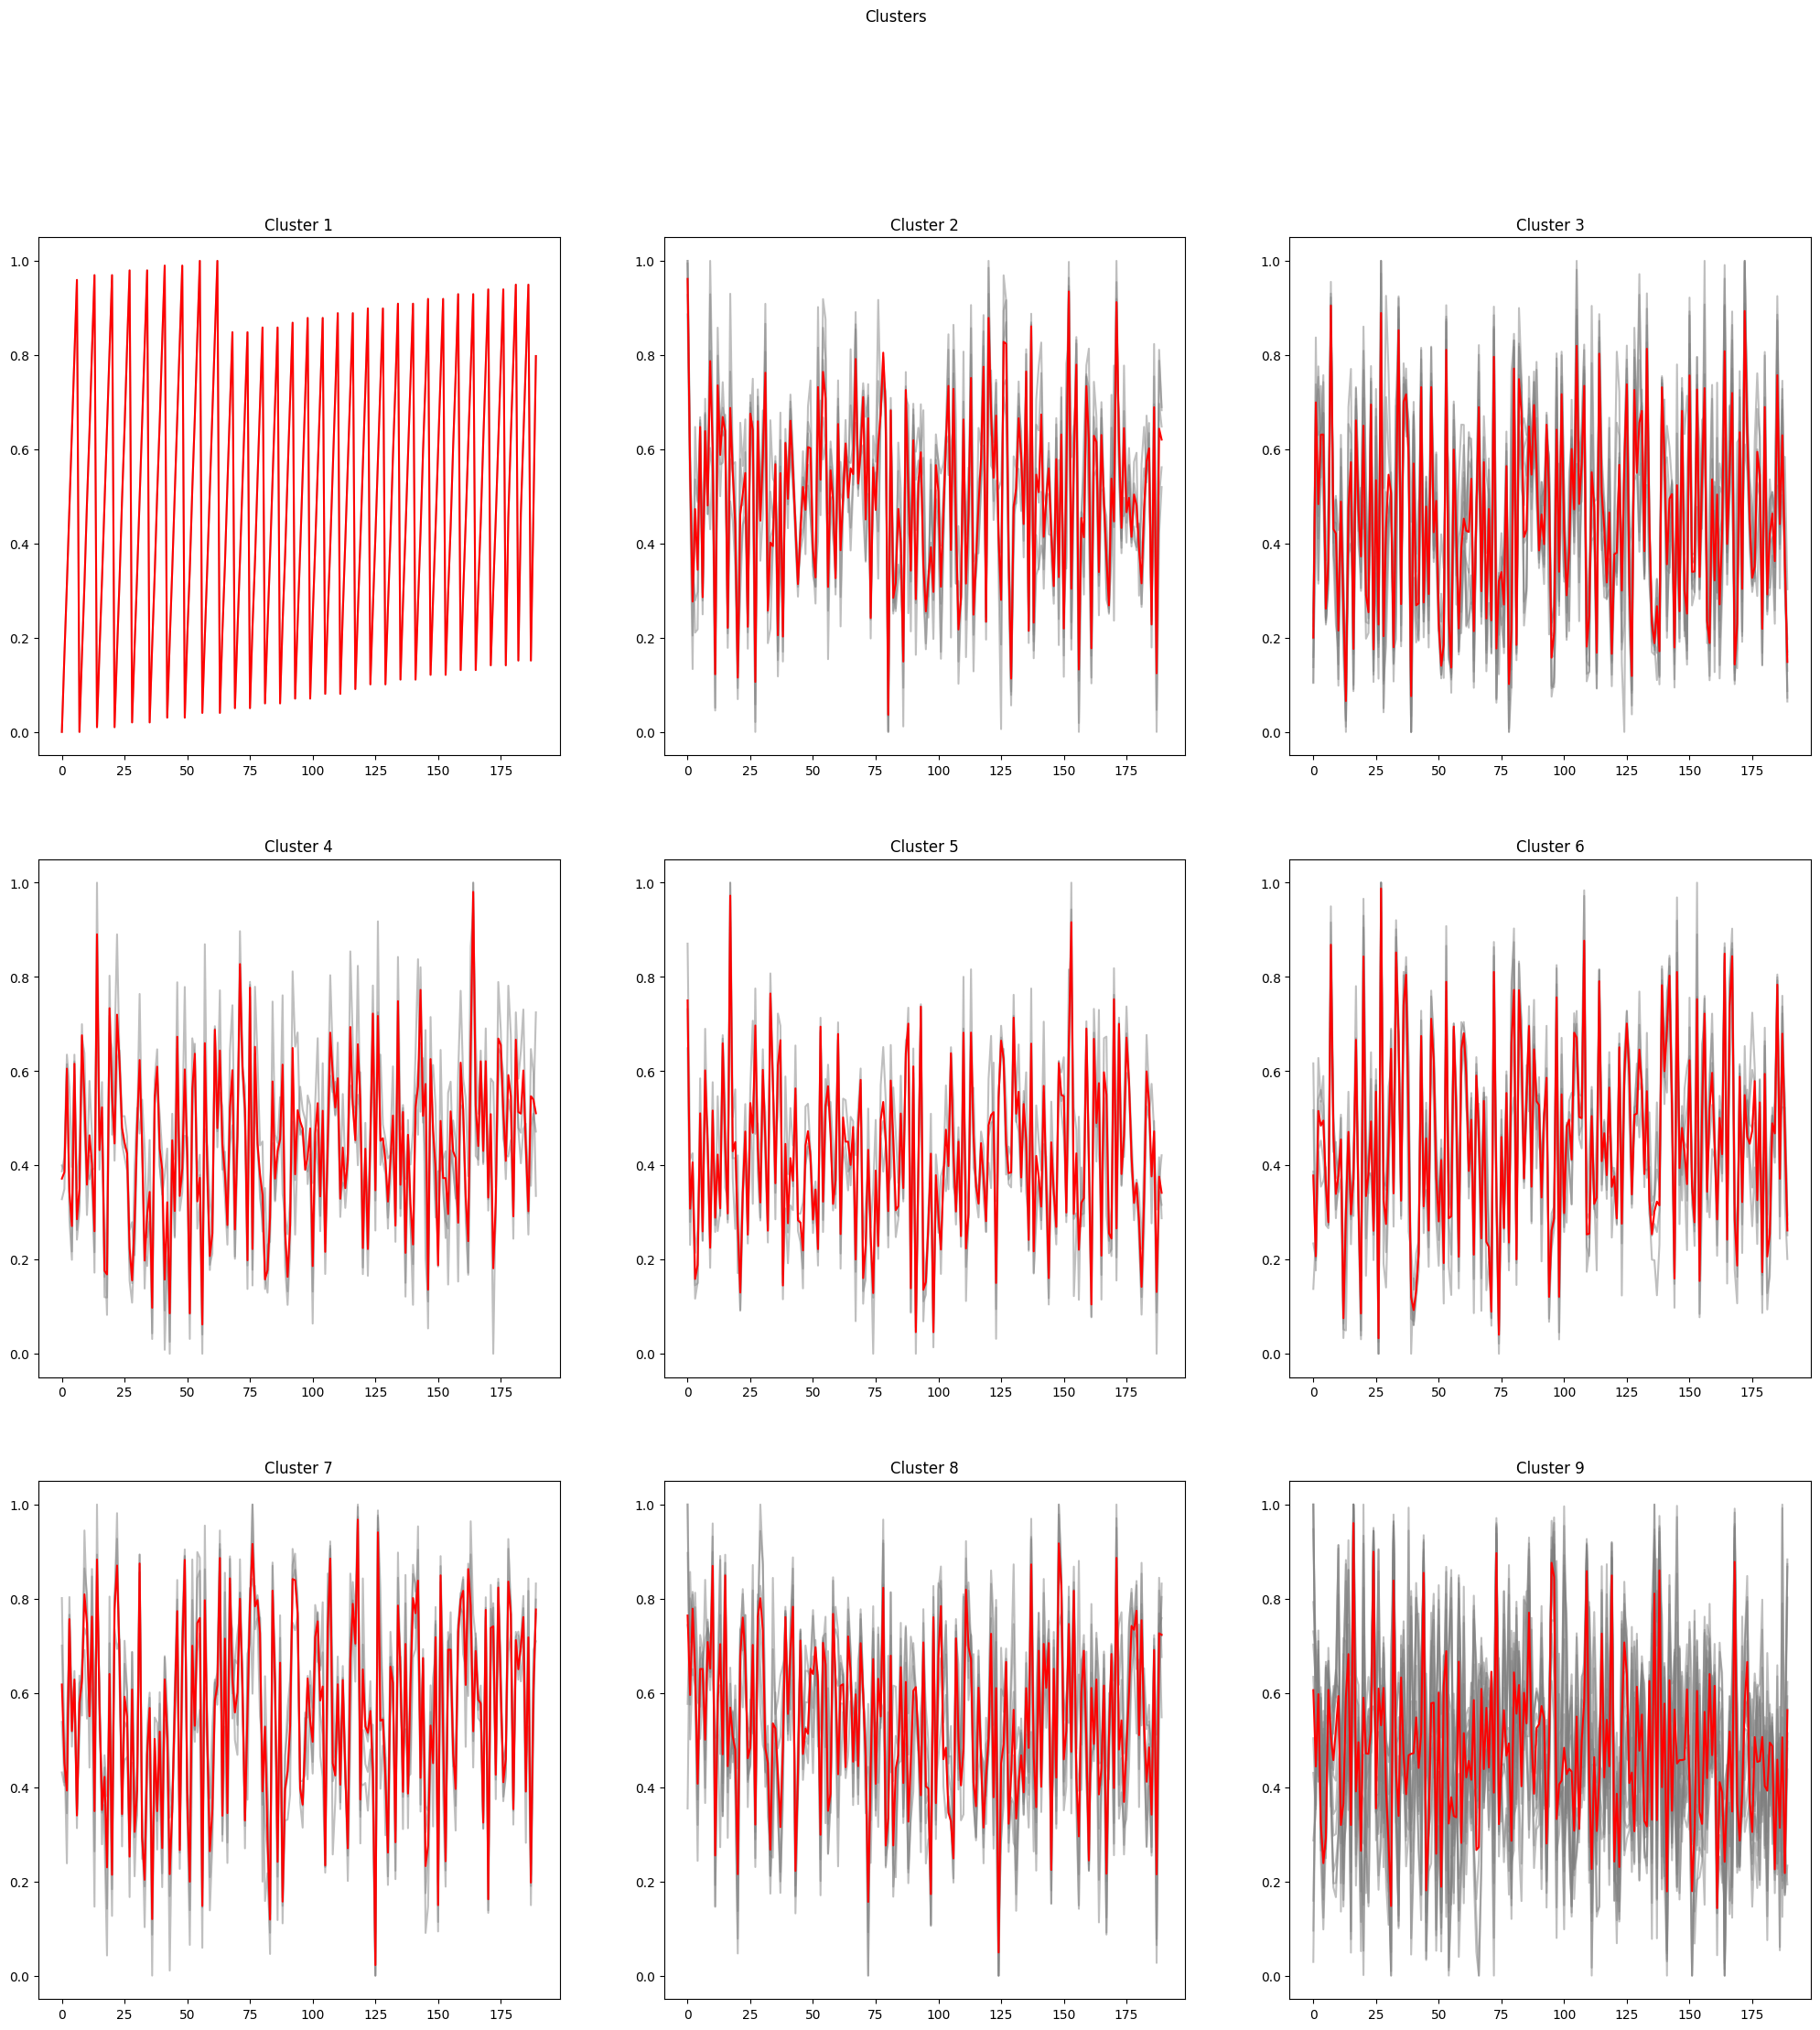

In [292]:
win_map = som.win_map(mySeries)

plot_som_series_dba_center(som_x, som_x, win_map)

Nous pouvons remarquer quelques différences avec ce résultat.

##### Cluster Distribution  <a class="anchor" id="section_6_4_2"></a>
Nous pouvons voir la distribution des séries chronologiques en grappes dans le graphique suivant.

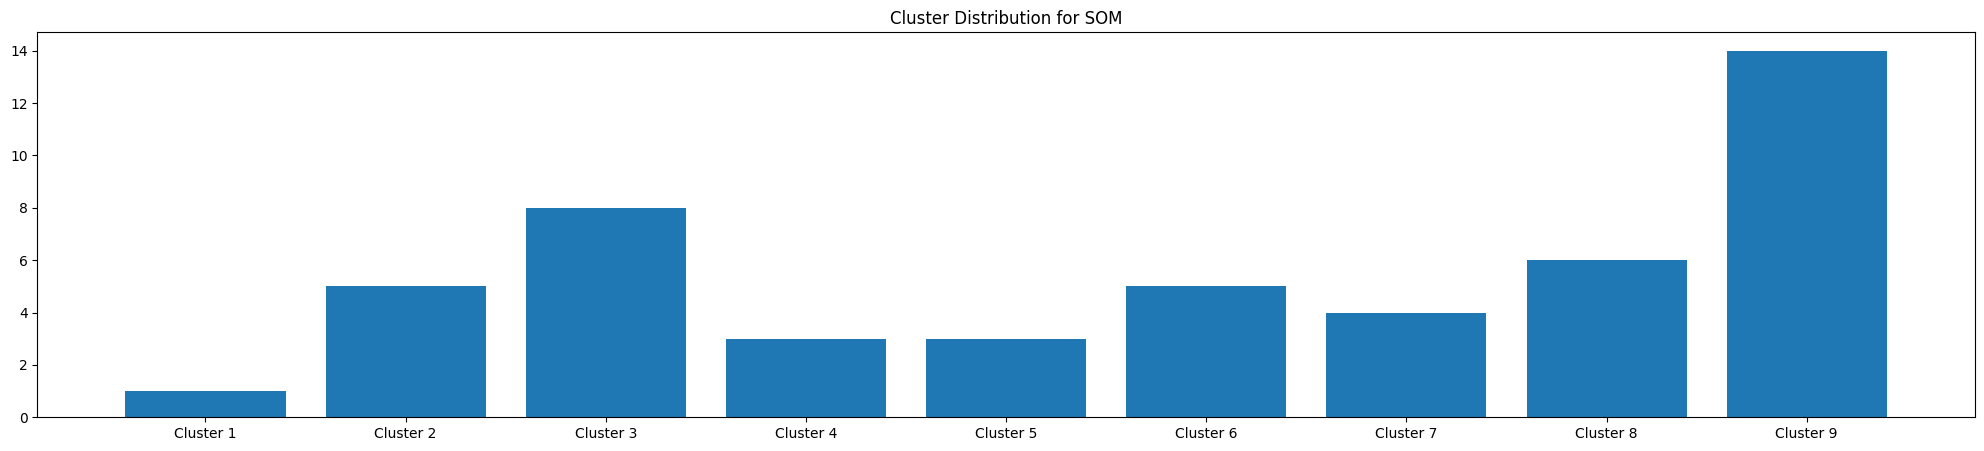

In [293]:
cluster_c = []
cluster_n = []
for x in range(som_x):
    for y in range(som_y):
        cluster = (x,y)
        if cluster in win_map.keys():
            cluster_c.append(len(win_map[cluster]))
        else:
            cluster_c.append(0)
        cluster_number = x*som_y+y+1
        cluster_n.append(f"Cluster {cluster_number}")

plt.figure(figsize=(25,5))
plt.title("Cluster Distribution for SOM")
plt.bar(cluster_n,cluster_c)
plt.show()

 ##### Cluster Mapping <a class="anchor" id="section_6_4_3"></a>

In [294]:
# Let's check first 5
for series in mySeries[:5]:
    print(som.winner(series))

(0, 0)
(2, 2)
(2, 2)
(2, 2)
(2, 2)


In [295]:
namesofMySeries=df_day.columns[1:].to_list()

In [296]:
cluster_map = []
for idx in range(len(mySeries)):
    winner_node = som.winner(mySeries[idx])
    cluster_map.append((namesofMySeries[idx],f"Cluster {winner_node[0]*som_y+winner_node[1]+1}"))

pd.DataFrame(cluster_map,columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")

Cluster
Series            
appt_1   Cluster 1
appt_42  Cluster 2
appt_41  Cluster 2
appt_40  Cluster 2
appt_39  Cluster 2
appt_38  Cluster 2
appt_29  Cluster 3
appt_28  Cluster 3
appt_27  Cluster 3
appt_26  Cluster 3
appt_24  Cluster 3
appt_23  Cluster 3
appt_22  Cluster 3
appt_25  Cluster 3
JOUR     Cluster 4
appt_47  Cluster 4
APPART   Cluster 4
appt_37  Cluster 5
appt_36  Cluster 5
appt_35  Cluster 5
appt_34  Cluster 6
appt_33  Cluster 6
appt_31  Cluster 6
appt_30  Cluster 6
appt_32  Cluster 6
appt_46  Cluster 7
appt_45  Cluster 7
appt_44  Cluster 7
appt_43  Cluster 7
appt_17  Cluster 8
appt_16  Cluster 8
appt_21  Cluster 8
appt_20  Cluster 8
appt_19  Cluster 8
appt_18  Cluster 8
appt_2   Cluster 9
appt_3   Cluster 9
appt_4   Cluster 9
appt_10  Cluster 9
appt_6   Cluster 9
appt_11  Cluster 9
appt_14  Cluster 9
appt_13  Cluster 9
appt_12  Cluster 9
appt_7   Cluster 9
appt_8   Cluster 9
appt_9   Cluster 9
appt_5   Cluster 9
appt_15  Cluster 9

#### 6 - 5 Le clustering K-means : <a class="anchor" id="section_6_5"></a>


`Le clustering K-means` est une méthode de regroupement couramment utilisée en analyse de données. Il vise à partitionner un ensemble de données en un nombre prédéfini de clusters. Le processus commence par l'initialisation aléatoire des centroïdes pour chaque cluster, puis les points de données sont attribués au centroïde le plus proche. Ensuite, les centroïdes sont recalculés comme les moyennes des points attribués à chaque cluster.

##### Implementation <a class="anchor" id="section_6_5_1"></a>

In [297]:
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans
cluster_count = math.ceil(math.sqrt(len(mySeries))) 
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw")

labels = km.fit_predict(mySeries)

##### Résultats<a class="anchor" id="section_6_5_1"></a>

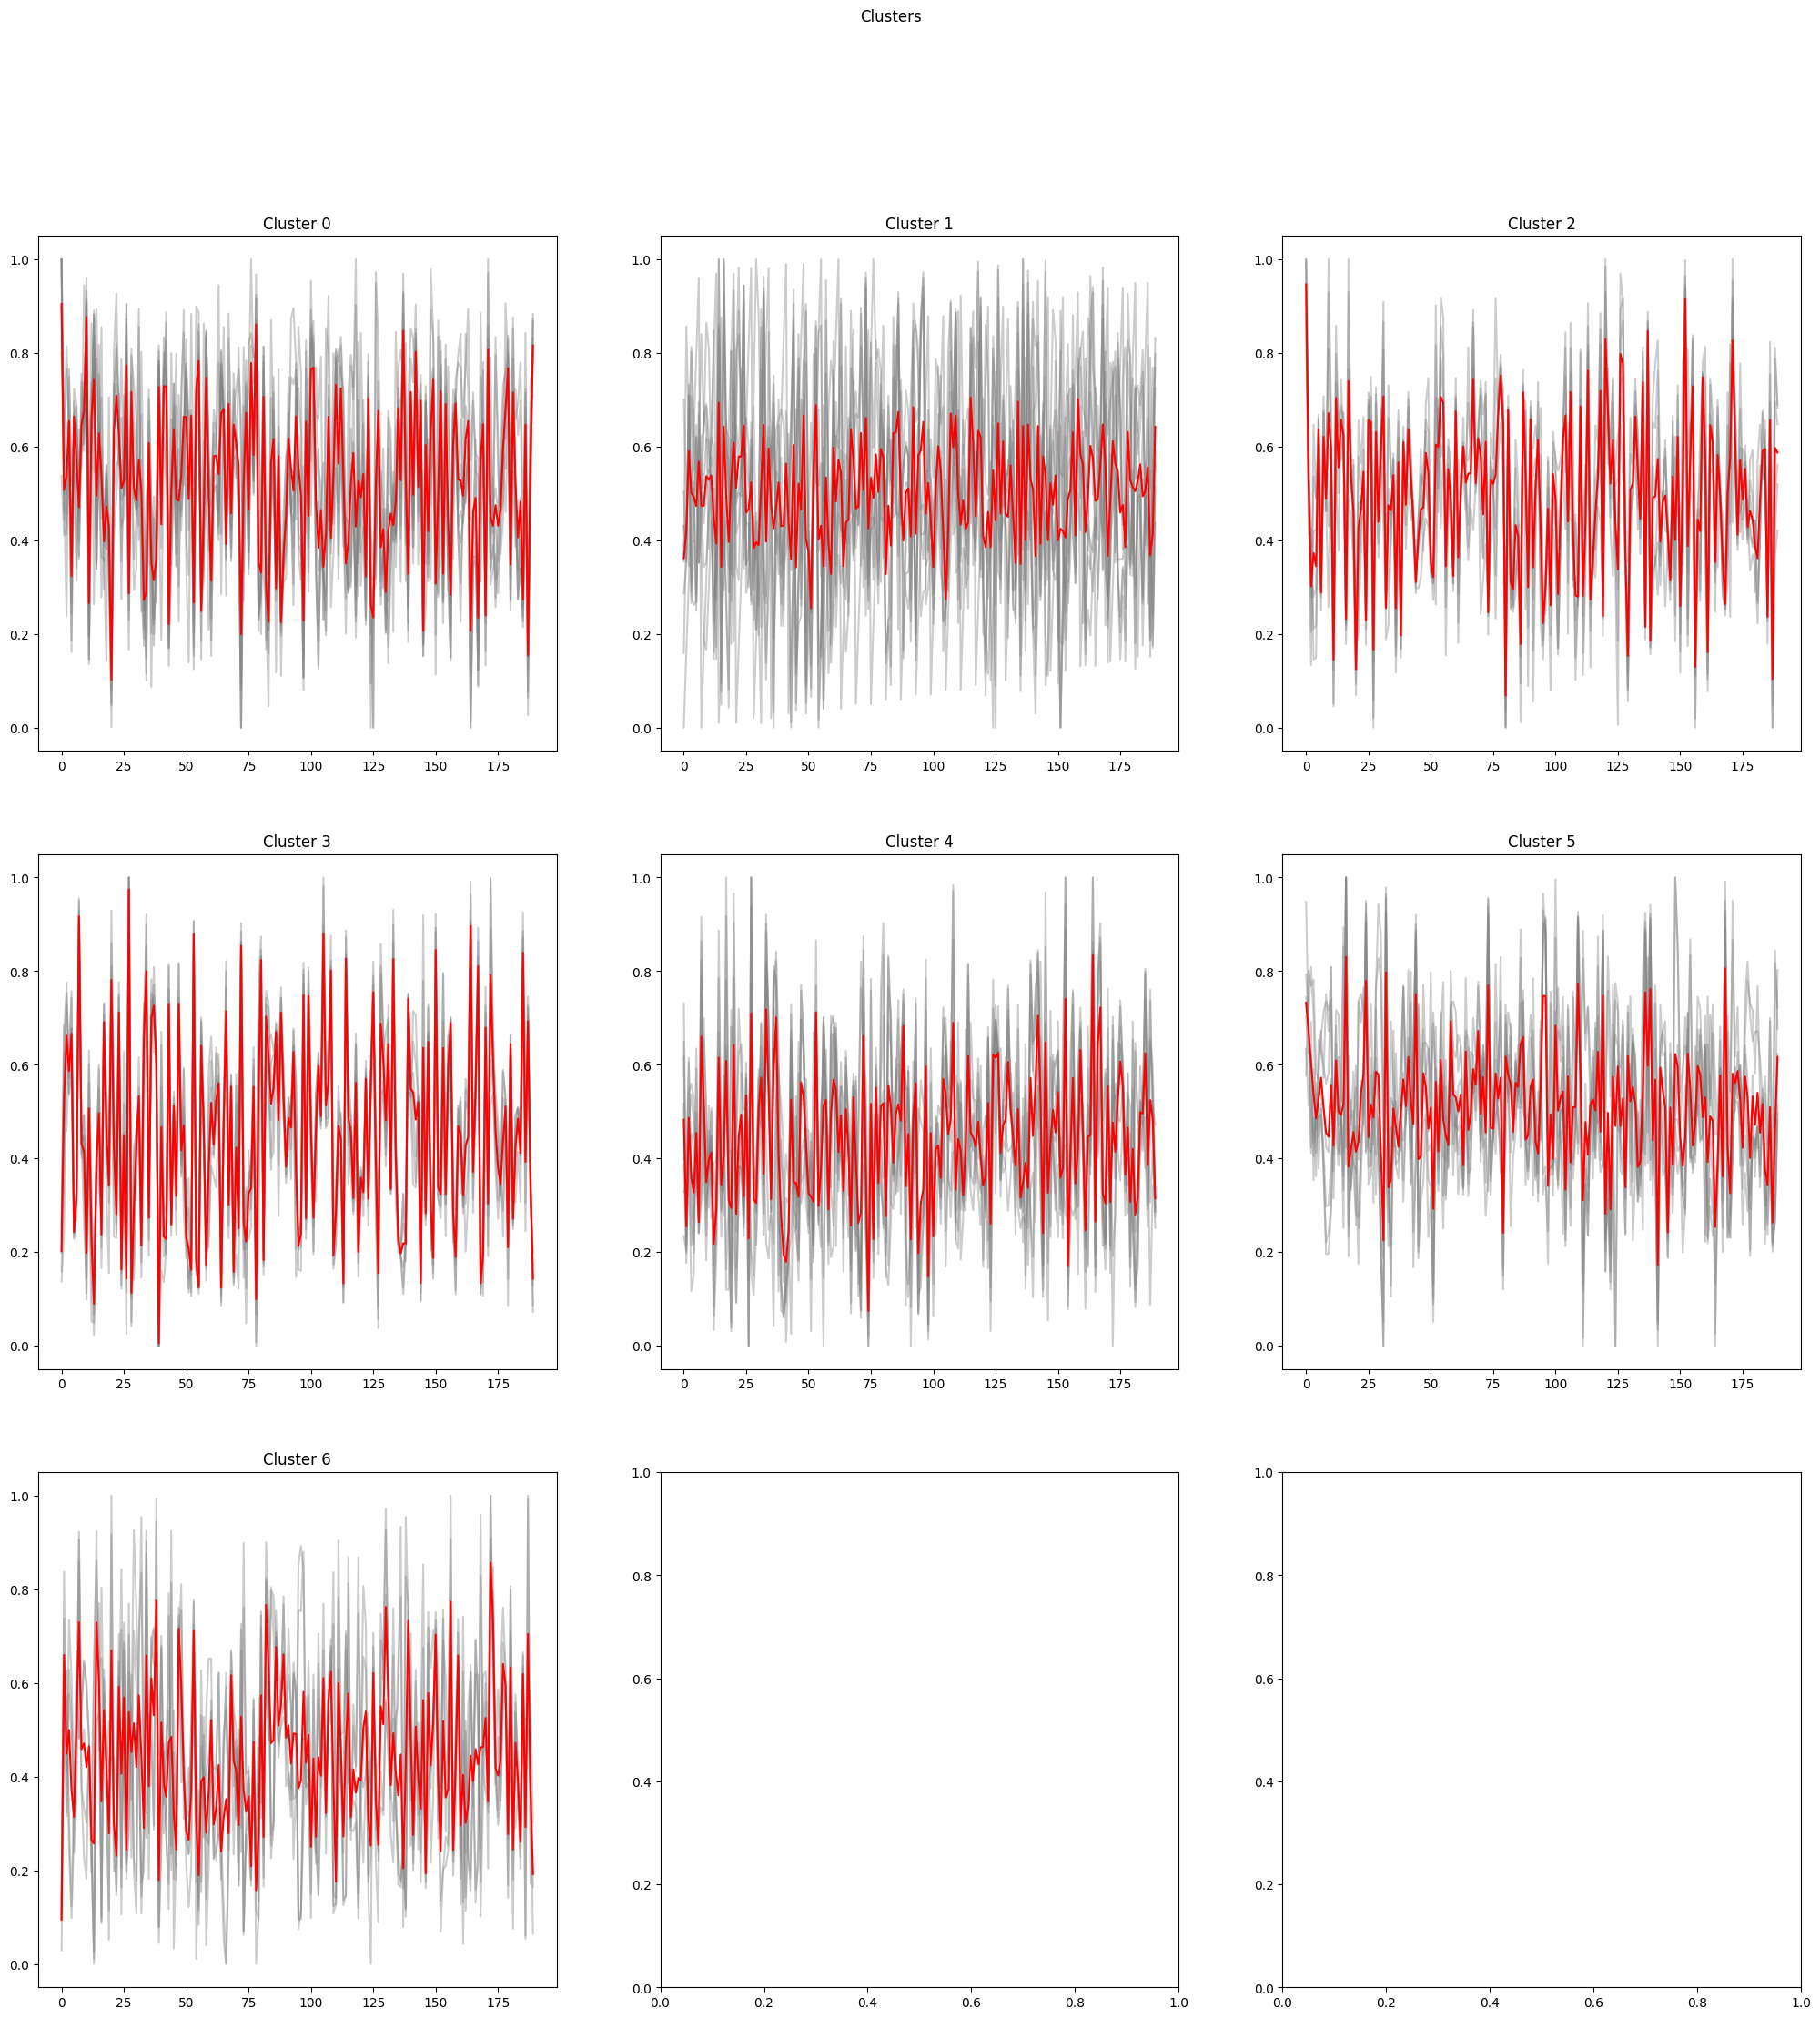

In [298]:
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
# For each label there is,
# plots every series with that label
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        
plt.show()

##### Cluster Distribution <a class="anchor" id="section_6_5_3"></a>

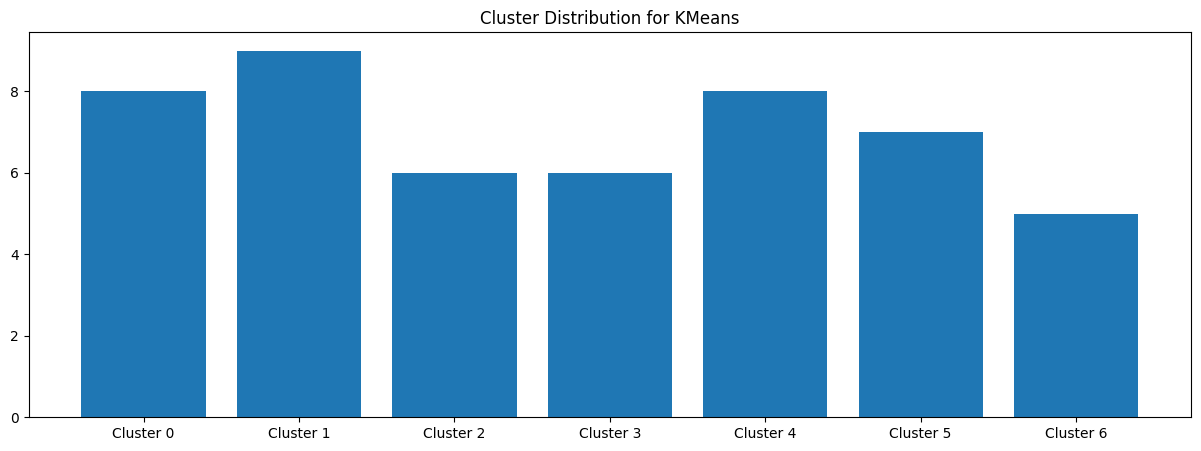

In [299]:
cluster_c = [len(labels[labels==i]) for i in range(cluster_count)]
cluster_n = ["Cluster "+str(i) for i in range(cluster_count)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.show()

##### Cluster Mapping <a class="anchor" id="section_6_5_4"></a>

In [300]:
labels

array([1, 6, 6, 1, 1, 1, 1, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 5, 5, 1, 6,
       6, 6, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 0, 1,
       0, 1, 1, 4, 4], dtype=int64)

In [301]:
fancy_names_for_labels = [f"Cluster {label}" for label in labels]
pd.DataFrame(zip(namesofMySeries,fancy_names_for_labels),columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")

Cluster
Series            
appt_13  Cluster 0
appt_18  Cluster 0
appt_17  Cluster 0
appt_16  Cluster 0
appt_15  Cluster 0
appt_14  Cluster 0
appt_45  Cluster 0
appt_43  Cluster 0
appt_21  Cluster 1
appt_1   Cluster 1
appt_7   Cluster 1
appt_6   Cluster 1
appt_5   Cluster 1
appt_4   Cluster 1
appt_46  Cluster 1
appt_47  Cluster 1
appt_44  Cluster 1
appt_42  Cluster 2
appt_41  Cluster 2
appt_40  Cluster 2
appt_39  Cluster 2
appt_38  Cluster 2
appt_37  Cluster 2
appt_29  Cluster 3
appt_30  Cluster 3
appt_28  Cluster 3
appt_25  Cluster 3
appt_26  Cluster 3
appt_27  Cluster 3
appt_36  Cluster 4
appt_35  Cluster 4
appt_34  Cluster 4
JOUR     Cluster 4
appt_32  Cluster 4
appt_31  Cluster 4
APPART   Cluster 4
appt_33  Cluster 4
appt_20  Cluster 5
appt_19  Cluster 5
appt_12  Cluster 5
appt_11  Cluster 5
appt_10  Cluster 5
appt_9   Cluster 5
appt_8   Cluster 5
appt_24  Cluster 6
appt_23  Cluster 6
appt_3   Cluster 6
appt_2   Cluster 6
appt_22  Cluster 6

#### 6 - 6 Spectral Clustering : <a class="anchor" id="section_6_6"></a>



- `La spectral clustering` est une technique de regroupement non supervisée qui utilise le spectre (valeurs propres) de la matrice de similarité des données pour effectuer une réduction de dimensionnalité avant le regroupement dans un nombre inférieur de dimensions. Cette méthode est souvent utilisée pour l'alignement temporel des séquences et permet de calculer leur barycentre, qui est une représentation moyenne du mouvement ou de la forme présente dans le cluster. En d'autres termes, la spectral clustering identifie les communautés de nœuds dans un graphe en se basant sur les arêtes qui les relient, et elle peut également être utilisée pour regrouper des données non graphiques. Elle utilise des informations provenant des valeurs propres (spectre) de matrices spéciales construites à partir du graphe ou de l'ensemble de données, et elle utilise les vecteurs propres pour attribuer les données à des clusters. Cette méthode est appréciée pour sa flexibilité et sa capacité à traiter des données non linéairement séparables, mais elle peut être coûteuse en termes de calcul, notamment pour de grands ensembles de données, car elle nécessite le calcul d'éléments propres.

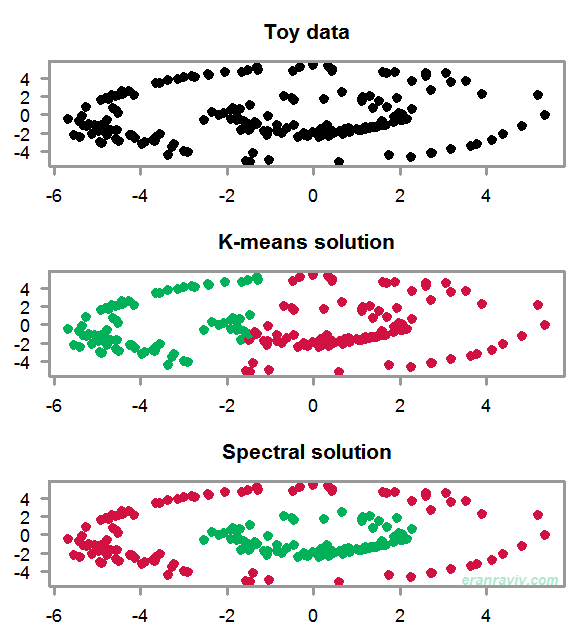![image.png]

In [302]:
from scipy.sparse import csgraph

In [303]:
from sklearn.neighbors import kneighbors_graph
from scipy import sparse

def generate_graph_laplacian(df, nn):
    """Generate graph Laplacian from data."""
    # Adjacency Matrix.
    connectivity = kneighbors_graph(X=df_scaled, n_neighbors=nn, mode='connectivity')
    adjacency_matrix_s = (1/2)*(connectivity + connectivity.T)
    # Graph Laplacian.
    graph_laplacian_s = sparse.csgraph.laplacian(csgraph=adjacency_matrix_s, normed=False)
    graph_laplacian = graph_laplacian_s.toarray()
    print(adjacency_matrix_s)
    return graph_laplacian 
    
    
graph_laplacian = generate_graph_laplacian(df=df_day[df_day.columns[1:]].transpose(), nn=8)
print("Graph laplacian", graph_laplacian)
'''
# Plot the graph Laplacian as heat map.
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(graph_laplacian, ax=ax, cmap='viridis_r')
ax.set(title='Graph Laplacian')
'''

  (0, 3293)	0.5
  (0, 550)	0.5
  (0, 4286)	0.5
  (0, 3109)	0.5
  (0, 3629)	0.5
  (0, 6461)	0.5
  (0, 2377)	0.5
  (0, 3840)	0.5
  (1, 7948)	0.5
  (1, 3662)	0.5
  (1, 2278)	0.5
  (1, 361)	0.5
  (1, 346)	0.5
  (1, 1078)	0.5
  (1, 753)	1.0
  (1, 1093)	1.0
  (1, 3068)	0.5
  (1, 4442)	1.0
  (1, 1305)	0.5
  (1, 928)	1.0
  (1, 480)	1.0
  (2, 8235)	0.5
  (2, 1308)	0.5
  (2, 368)	0.5
  (2, 2739)	0.5
  :	:
  (9098, 8545)	0.5
  (9098, 8755)	0.5
  (9098, 7369)	1.0
  (9098, 7691)	1.0
  (9099, 8987)	0.5
  (9099, 8930)	0.5
  (9099, 8636)	0.5
  (9099, 8538)	0.5
  (9099, 7902)	0.5
  (9099, 7608)	0.5
  (9099, 7244)	0.5
  (9099, 7145)	0.5
  (9099, 7026)	0.5
  (9099, 6817)	0.5
  (9099, 5465)	0.5
  (9099, 5171)	0.5
  (9099, 3618)	0.5
  (9099, 7726)	0.5
  (9099, 7748)	1.0
  (9099, 8034)	1.0
  (9099, 6880)	1.0
  (9099, 8455)	1.0
  (9099, 5892)	1.0
  (9099, 4807)	1.0
  (9099, 7209)	1.0
Graph laplacian [[ 4.  0.  0. ...  0.  0.  0.]
 [ 0.  9.  0. ...  0.  0.  0.]
 [ 0.  0.  7. ...  0.  0.  0.]
 ...
 [ 0.  0.  0

"\n# Plot the graph Laplacian as heat map.\nfig, ax = plt.subplots(figsize=(10, 8))\nsns.heatmap(graph_laplacian, ax=ax, cmap='viridis_r')\nax.set(title='Graph Laplacian')\n"

[Text(0.5, 1.0, 'Graph Laplacian')]

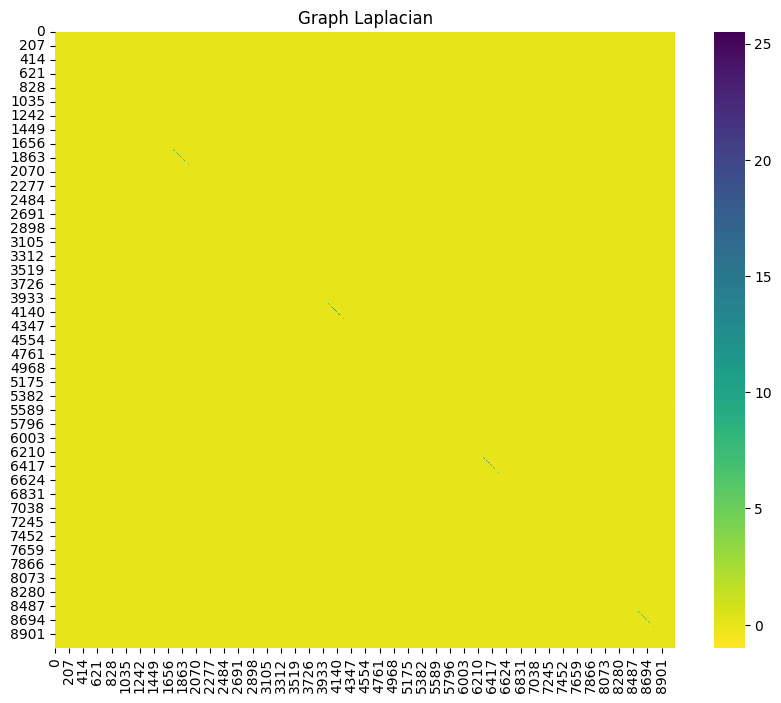

In [364]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(graph_laplacian, ax=ax, cmap='viridis_r')
ax.set(title='Graph Laplacian')


##### Eigenvalue computations <a class="anchor" id="section_6_6_1"></a>

In [305]:
from scipy import linalg
eigenvals, eigenvcts = linalg.eig(graph_laplacian)

In [306]:
eigenvals

array([26.62592066+0.j, 25.73424892+0.j, 25.68846414+0.j, ...,
        5.57241235+0.j,  5.70139168+0.j,  6.22402501+0.j])

In [307]:
eigenvcts

array([[ 1.72333202e-09,  1.32121330e-07,  1.05738824e-05, ...,
        -3.05114304e-15, -1.89500362e-14,  2.97295221e-14],
       [-9.92747765e-09,  2.43252580e-06,  5.16313919e-04, ...,
         4.52333059e-15, -1.80257798e-14,  1.19725301e-13],
       [-1.14823348e-08,  1.95437624e-07,  4.17243573e-05, ...,
         5.98626841e-15, -6.67975771e-14, -5.34809492e-14],
       ...,
       [-3.80603872e-08,  5.62027033e-06,  4.96687297e-03, ...,
         1.39526332e-15,  8.85186549e-15,  7.52649363e-15],
       [ 1.00540499e-04,  8.82061096e-08,  2.47468076e-09, ...,
         4.47801350e-15, -9.65811721e-15, -1.51736958e-13],
       [-1.88610415e-05, -4.64202029e-07,  6.39769081e-09, ...,
        -4.58584495e-15, -1.34461491e-14, -1.79039970e-14]])

In [308]:
eigenvals.max()

(26.62592065906284+0j)

In [309]:
eigenvals.min()


(-6.413551253565636e-14+0j)

In [310]:
# We project onto the real numbers. 
def compute_spectrum_graph_laplacian(graph_laplacian):
    """Compute eigenvalues and eigenvectors and project 
    them onto the real numbers.
    """
    eigenvals, eigenvcts = linalg.eig(graph_laplacian)
    eigenvals = np.real(eigenvals)
    eigenvcts = np.real(eigenvcts)
    return eigenvals, eigenvcts

eigenvals, eigenvcts = compute_spectrum_graph_laplacian(graph_laplacian)

In [311]:
eigenvcts_norms = np.apply_along_axis(
  lambda v: np.linalg.norm(v, ord=2), 
  axis=0, 
  arr=eigenvcts
)

print('Min Norm: ' + str(eigenvcts_norms.min()))
print('Max Norm: ' + str(eigenvcts_norms.max()))

Min Norm: 0.999999999999979
Max Norm: 1.0000000000000016


In [312]:
eigenvals_sorted_indices = np.argsort(eigenvals)
eigenvals_sorted = eigenvals[eigenvals_sorted_indices]

##### Plotting all the eigenvalues <a class="anchor" id="section_6_6_2"></a>

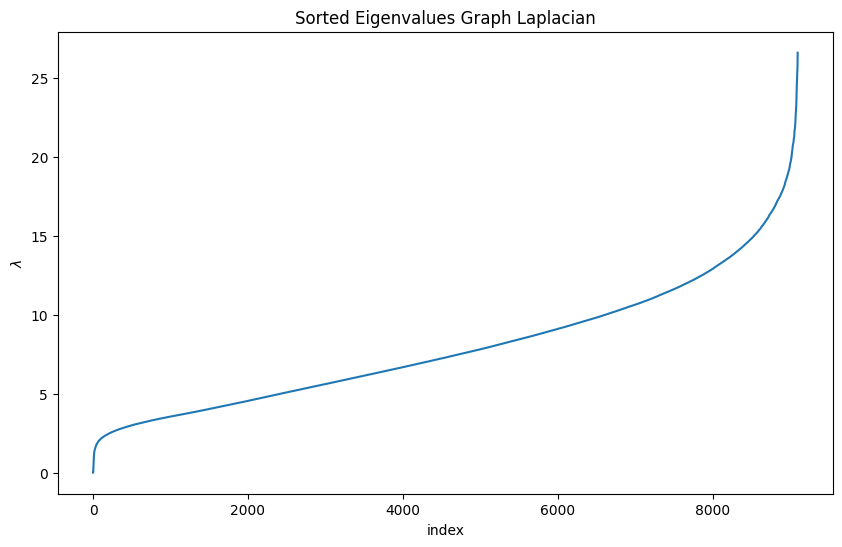

In [313]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(1, eigenvals_sorted_indices.size + 1), y=eigenvals_sorted, ax=ax)
ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'$\lambda$');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


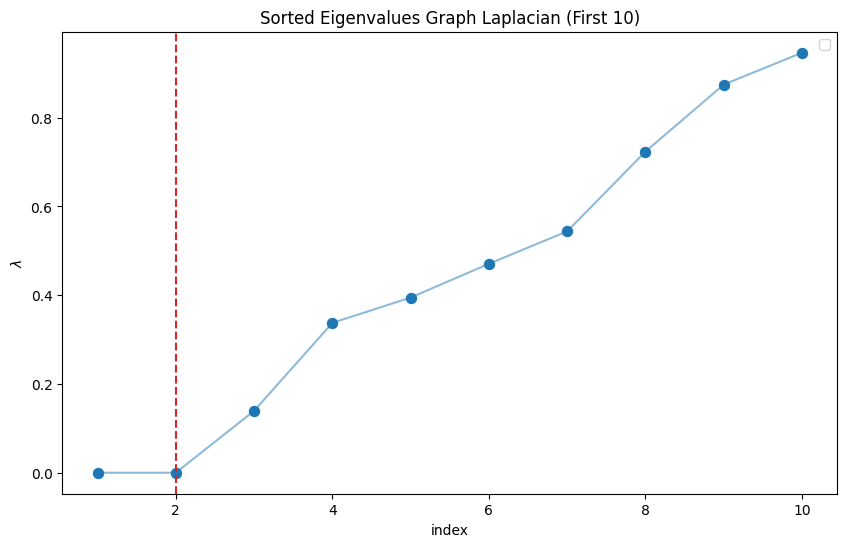

In [331]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définition de la palette de couleurs de Seaborn
sns_c = sns.color_palette()

# Définition de la limite de l'index des valeurs propres à afficher
index_lim = 10

# Création de la figure et des axes
fig, ax = plt.subplots(figsize=(10, 6))

# Tracé du nuage de points des valeurs propres triées
sns.scatterplot(x=range(1, eigenvals_sorted_indices[:index_lim].size + 1), y=eigenvals_sorted[:index_lim], s=80, ax=ax)

# Tracé de la ligne de tendance des valeurs propres triées
sns.lineplot(x=range(1, eigenvals_sorted_indices[:index_lim].size + 1), y=eigenvals_sorted[:index_lim], alpha=0.5, ax=ax)

# Tracé d'une ligne verticale pour marquer la valeur propre à l'index 2
ax.axvline(x=2, color=sns_c[3], linestyle='--')

# Ajout de la légende à l'axe
ax.legend()

# Configuration du titre, de l'axe des abscisses et de l'axe des ordonnées
ax.set(title=f'Sorted Eigenvalues Graph Laplacian (First {index_lim})', xlabel='index', ylabel=r'$\lambda$')

In [332]:
zero_eigenvals_index = np.argwhere(abs(eigenvals) < 1e-5)
eigenvals[zero_eigenvals_index]

array([[-6.41355125e-14],
       [ 7.20484299e-14]])

In [333]:
proj_df = pd.DataFrame(eigenvcts[:, zero_eigenvals_index.squeeze()])
proj_df.columns = ['v_' + str(c) for c in proj_df.columns]


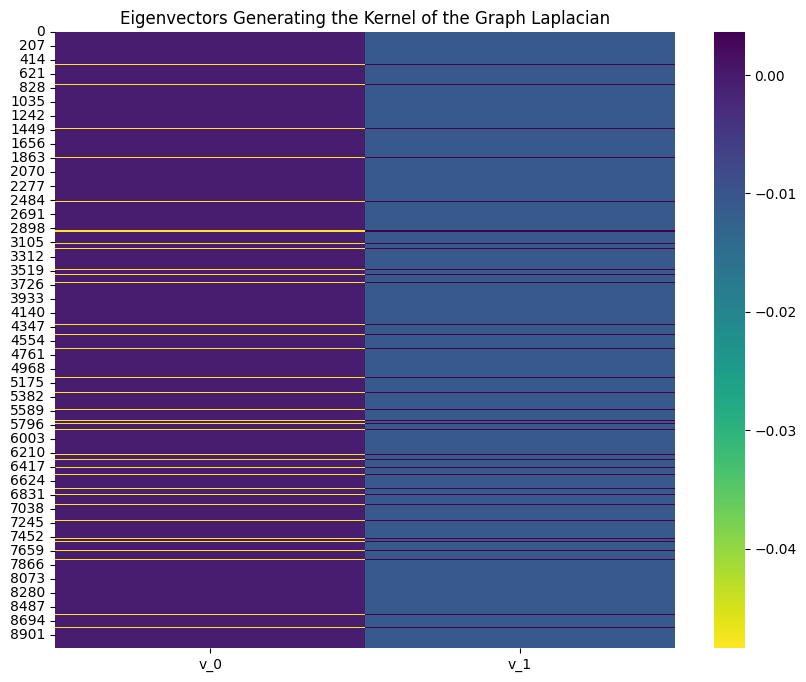

In [334]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création de la figure et des axes
fig, ax = plt.subplots(figsize=(10, 8))

# Tracé de la carte de chaleur des données proj_df
sns.heatmap(proj_df, ax=ax, cmap='viridis_r')

# Configuration du titre de la figure
ax.set(title='Eigenvectors Generating the Kernel of the Graph Laplacian')

Deciding which affinity to use for final clustering

In [335]:
from sklearn.cluster import SpectralClustering

In [340]:
from sklearn.cluster import AgglomerativeClustering # Importation de la classe AgglomerativeClustering de scikit-learn

# Création d'une instance du modèle de clustering hiérarchique agglomératif avec 2 clusters
agglomerative_model = AgglomerativeClustering(n_clusters=2)

# Attribution des étiquettes de cluster aux données
labels_agglomerative = agglomerative_model.fit_predict(df_day[df_day.columns[1:]].transpose())

In [341]:
from sklearn.metrics import silhouette_score

In [342]:
from sklearn.metrics import silhouette_score # Importation de la fonction silhouette_score de scikit-learn

affinity = ['rbf', 'nearest-neighbours']

# Liste des scores de silhouette
s_scores = []

# Évaluation des performances avec la méthode silhouette_score
s_scores.append(silhouette_score(df_day[df_day.columns[1:]].transpose(), labels_rbf))
s_scores.append(silhouette_score(df_day[df_day.columns[1:]].transpose(), labels_nn))

print(s_scores)

[-0.15923071664550073, -0.33177713001313636]


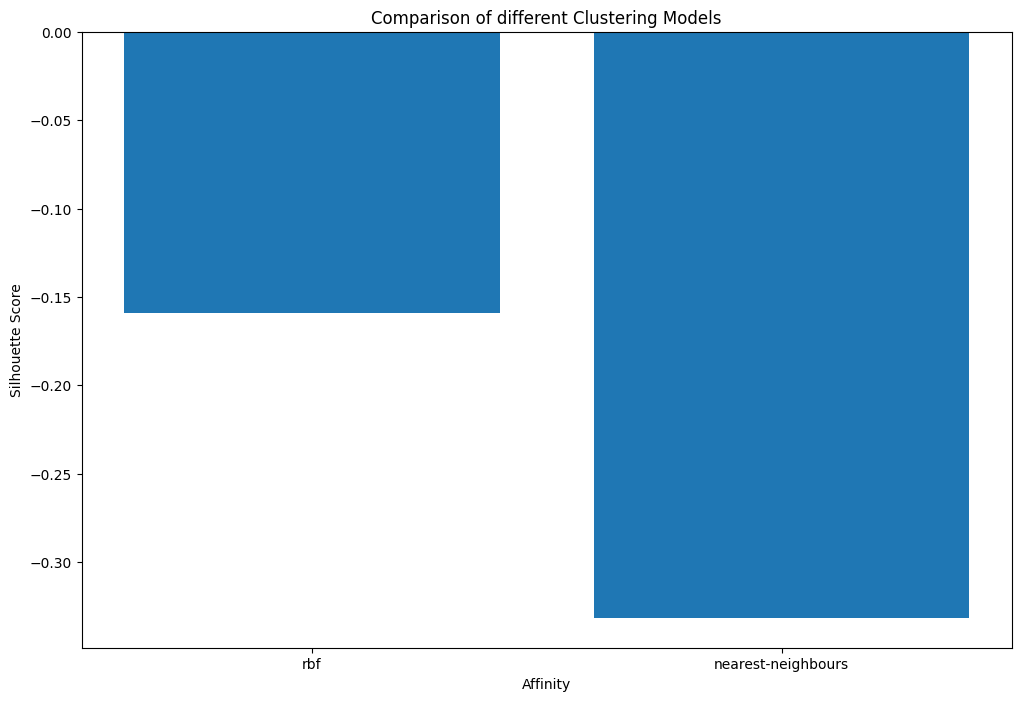

In [343]:
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()

nearest neighbours does so much better than rbf


In [344]:
from sklearn.metrics import davies_bouldin_score

In [345]:
data1 = df_day[df_day.columns[1:]].transpose().copy()

In [346]:
import numpy as np # Importation du module numpy
import pandas as pd # Importation du module pandas

def project_and_transpose(eigenvals, eigenvcts, num_ev):
    """Select the eigenvectors corresponding to the first 
    (sorted) num_ev eigenvalues as columns in a data frame.
    """
    # Tri des indices des valeurs propres
    eigenvals_sorted_indices = np.argsort(eigenvals)

    # Sélection des indices correspondant aux num_ev premières valeurs propres
    indices = eigenvals_sorted_indices[:num_ev]

    # Extraction des vecteurs propres correspondants et création d'un dataframe
    proj_df = pd.DataFrame(eigenvcts[:, indices.squeeze()])

    # Renommage des colonnes du dataframe avec un préfixe 'v_'
    proj_df.columns = ['v_' + str(c) for c in proj_df.columns]

    return proj_df

#### 6 - 7 Final Clustering : <a class="anchor" id="section_6_7"></a>


In [347]:
from sklearn.cluster import SpectralClustering # Importation de la classe SpectralClustering de scikit-learn
import matplotlib.pyplot as plt # Importation du module pyplot de matplotlib pour le tracé des figures

plt.rcParams["figure.figsize"] = (12,8) # Modification de la taille par défaut des figures

# Création de l'instance de SpectralClustering avec les paramètres spécifiés
spec_cl = SpectralClustering(
    n_clusters=2, # Nombre de clusters à rechercher dans les données
    random_state=25, # Graine utilisée pour l'initialisation de la génération de nombres aléatoires
    n_neighbors=10, # Nombre de voisins à utiliser pour la construction du graphe de similarité
    affinity='nearest_neighbors' # Mesure de similarité utilisée pour la construction du graphe
)

# Attribution des étiquettes cluster aux données en utilisant la méthode fit_predict
data1['cluster'] = spec_cl.fit_predict(data1)

# Transformation des étiquettes cluster en chaînes de caractères en ajoutant un préfixe 'c_'
data1['cluster'] = ['c_' + str(c) for c in data1['cluster']]



In [348]:
data1

0        48         96        144        192        240  \
appt_1   0.000000  0.000000   0.010101   0.010101   0.020202   0.020202   
appt_2   0.095473  0.481514   0.860454   0.296182   0.617895   0.503591   
appt_3   0.028963  0.480693   0.924191   0.265263   0.548211   0.531051   
appt_4   0.159028  0.513534   0.861683   0.346356   0.445701   0.585236   
appt_5   0.286765  0.502955   0.745420   0.414611   0.334244   0.580523   
appt_6   0.430407  0.477385   0.628551   0.491093   0.293541   0.536662   
appt_7   0.503877  0.381868   0.509268   0.477750   0.230052   0.431245   
appt_8   0.634263  0.377775   0.507254   0.482263   0.323718   0.424207   
appt_9   0.702792  0.375534   0.500223   0.397572   0.407272   0.415926   
appt_10  0.730651  0.419718   0.483981   0.251571   0.503500   0.436339   
appt_11  0.792974  0.508785   0.491191   0.174970   0.615893   0.522199   
appt_12  0.947731  0.596667   0.532161   0.273415   0.718480   0.673033   
appt_13  1.000000  0.546183   0.487617   0.409320   0.705850   0.721544   
appt_14  1.000000  0.439718   0.412705   0.506020   0.685094   0.701977   
appt_15  1.000000  0.358822   0.351539   0.567926   0.696161   0.653930   
appt_16  1.000000  0.366268   0.348586   0.629484   0.750674   0.601057   
appt_17  1.000000  0.398222   0.339007   0.684900   0.809228   0.542120   
appt_18  0.897246  0.458517   0.338142   0.716136   0.795045   0.493760   
appt_19  0.744091  0.572254   0.408853   0.736149   0.765183   0.511720   
appt_20  0.576631  0.713756   0.525200   0.734404   0.766318   0.561682   
appt_21  0.354695  0.840029   0.639132   0.646759   0.708467   0.555159   
appt_22  0.105341  0.922458   0.689779   0.441745   0.517625   0.400324   
appt_23  0.104046  0.906068   0.653639   0.297146   0.350320   0.278703   
appt_24  0.137493  0.858107   0.516760   0.197944   0.227440   0.181698   
appt_25  0.224535  0.861803   0.434519   0.233363   0.185154   0.192977   
appt_26  0.253261  0.898225   0.394738   0.332140   0.102265   0.226075   
appt_27  0.239532  0.907198   0.373664   0.450411   0.041815   0.272946   
appt_28  0.198434  0.930515   0.364993   0.515480   0.050145   0.300478   
appt_29  0.158999  0.955446   0.376951   0.524249   0.109182   0.317322   
appt_30  0.137582  0.949761   0.405663   0.477292   0.191160   0.327663   
appt_31  0.234303  0.915618   0.462968   0.428309   0.318366   0.364830   
appt_32  0.387020  0.864129   0.468211   0.357084   0.374572   0.353091   
appt_33  0.517088  0.822752   0.462394   0.244507   0.364371   0.292990   
appt_34  0.616511  0.789140   0.556163   0.165642   0.388219   0.286226   
appt_35  0.648422  0.689812   0.631677   0.091248   0.386007   0.285412   
appt_36  0.731346  0.579725   0.669081   0.093347   0.406859   0.341679   
appt_37  0.870653  0.535258   0.676256   0.205237   0.488973   0.458667   
appt_38  1.000000  0.556672   0.638924   0.294557   0.567318   0.526340   
appt_39  1.000000  0.578497   0.571286   0.350577   0.599539   0.520849   
appt_40  0.994560  0.673077   0.629007   0.478154   0.692312   0.570367   
appt_41  0.927623  0.707208   0.688185   0.579353   0.727156   0.585503   
appt_42  0.886330  0.677038   0.742500   0.656343   0.711393   0.574719   
appt_43  0.801402  0.636869   0.788847   0.734613   0.686684   0.589715   
appt_44  0.700562  0.620554   0.850634   0.805421   0.686695   0.600693   
appt_45  0.538618  0.558793   0.893684   0.803090   0.604647   0.557626   
appt_46  0.431282  0.500668   1.000000   0.770422   0.451605   0.524171   
appt_47  0.387198  0.428070   1.000000   0.647300   0.279486   0.453756   
APPART   0.328071  0.302632   0.886625   0.464108   0.108497   0.296496   
JOUR     0.399811  0.320538   0.784992   0.409892   0.149811   0.280474   
Day      0.000000  7.000000  14.000000  21.000000  28.000000  35.000000   

               288        336        384        432  ...      8688       8736  \
appt_1    0.030303   0.030303   0.040404   0.040404  ...  0.959596   0.969697   
appt_2    0.270033   0.45133

In [349]:
data1['cluster']

appt_1     c_0
appt_2     c_0
appt_3     c_0
appt_4     c_0
appt_5     c_0
appt_6     c_0
appt_7     c_0
appt_8     c_0
appt_9     c_0
appt_10    c_0
appt_11    c_0
appt_12    c_0
appt_13    c_0
appt_14    c_0
appt_15    c_0
appt_16    c_0
appt_17    c_0
appt_18    c_0
appt_19    c_0
appt_20    c_0
appt_21    c_0
appt_22    c_1
appt_23    c_1
appt_24    c_1
appt_25    c_1
appt_26    c_1
appt_27    c_1
appt_28    c_1
appt_29    c_1
appt_30    c_1
appt_31    c_1
appt_32    c_1
appt_33    c_1
appt_34    c_1
appt_35    c_1
appt_36    c_1
appt_37    c_0
appt_38    c_0
appt_39    c_0
appt_40    c_0
appt_41    c_0
appt_42    c_0
appt_43    c_0
appt_44    c_0
appt_45    c_0
appt_46    c_0
appt_47    c_0
APPART     c_0
JOUR       c_0
Day        c_0
Name: cluster, dtype: object

#### 6 - 8 Analyse sur clusters : <a class="anchor" id="section_6_8"></a>


In [354]:
def analyse_clustering(dataframe):
    
    data_represent = dataframe.groupby('cluster').median() # Calcul de la médiane des valeurs pour chaque cluster
    liste_represent = data_represent.index # Liste des clusters
    data_represent = data_represent.transpose() # Transposition des données pour avoir les colonnes de clusters comme variables
    data_represent["Time"] = df_day['Day'] # Ajout de la colonne "Time" contenant les jours
    
    x=data_represent.copy() # Copie des données représentatives pour le tracé des courbes
    x = x.groupby(df_day['Day']).mean() # Calcul de la moyenne quotidienne pour chaque variable (cluster)
    
    fig = plt.figure(figsize = [12, 4.8]) # Création d'une figure avec une taille spécifique
    a1 = fig.add_axes([0,0,1,1]) # Ajout d'une nouvelle portion d'axes à la figure
    a1.set_ylabel('Consommation électrique') # Ajout de l'étiquette pour l'axe y
    plt.xticks(rotation=20) # Rotation des étiquettes sur l'axe x de 20 degrés
    plt.title('Courbes de consommation moyenne journalière sur  91 jours par foyer') # Titre du graphique
   
    for profil in liste_represent:
        plt.plot(x[profil], label= 'Foyer %s' % profil) # Tracé des courbes pour chaque variable (cluster) avec une étiquette dynamique
    
    plt.legend(bbox_to_anchor=(1.05, 1)) # Ajout d'une légende à la figure
    plt.show() # Affichage du graphique

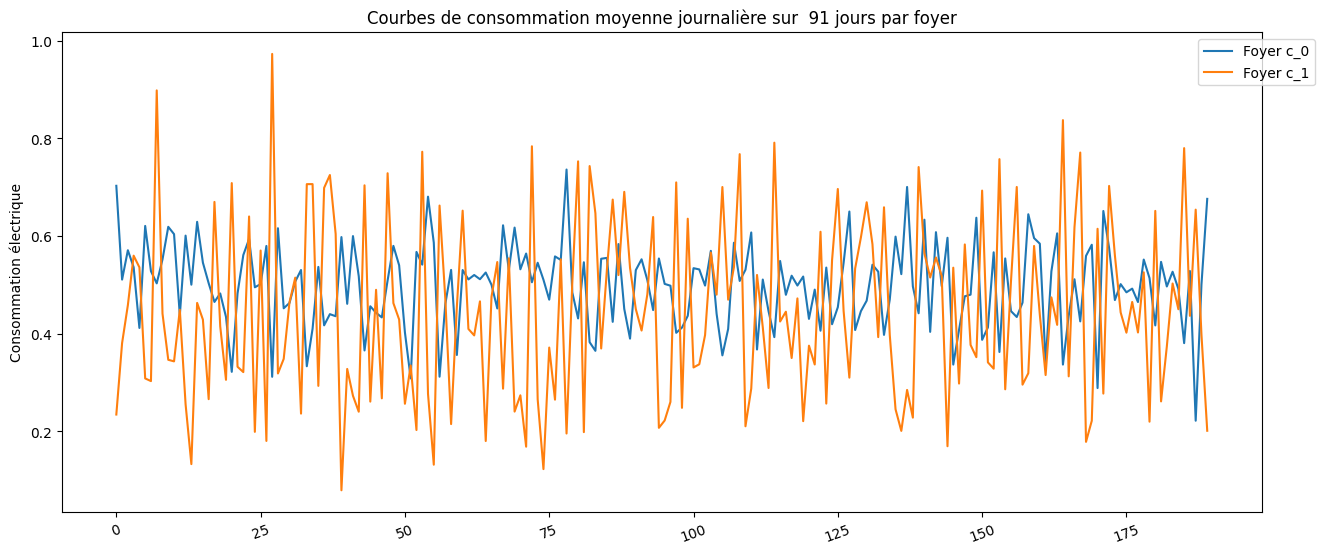

In [355]:
analyse_clustering(data1)

- Lors de notre analyse, nous avons tracé les courbes de consommation moyenne journalière sur une période de 91 jours par foyer. Cette approche nous a permis de visualiser les tendances de consommation sur une base quotidienne et d'identifier des modèles récurrents.


### 7- Segmentation <a class="anchor" id="chapter7"></a>

- Nous avons effectué la segmentation des profils de consommation électrique en utilisant la méthode de clustering spectral.

- La segmentation est un processus qui consiste à regrouper des données similaires pour former des groupes ou des clusters. Dans notre cas, nous avons utilisé la méthode de clustering spectral qui est basée sur la théorie des graphes. Cette méthode utilise la similarité entre les profils de consommation électrique pour les regrouper dans des clusters.

- Pour appliquer la méthode de clustering spectral, nous avons d'abord construit une matrice de similarité en calculant les distances entre chaque paire de profils de consommation électrique. Ensuite, nous avons utilisé cette matrice pour construire un graphe pondéré où les nœuds du graphe représentent les profils de consommation et les arêtes sont pondérées par la similarité entre les profils.

- Nous avons ensuite appliqué l'algorithme de clustering spectral sur ce graphe pour obtenir les clusters. Cet algorithme prend en compte les valeurs propres et les vecteurs propres de la matrice de similarité pour effectuer la partition des profils de consommation.

- Une fois les clusters obtenus, nous avons analysé visuellement les profils moyens de chaque cluster. Cela nous a permis d'identifier les caractéristiques distinctes des profils de consommation électrique de chaque groupe. Par exemple, certains clusters peuvent avoir des pics de consommation en soirée, tandis que d'autres peuvent avoir une consommation stable tout au long de la journée.


In [356]:
data_represent = data1.groupby('cluster').median()
liste_represent = data_represent.index
data_represent = data_represent.transpose()
data_represent["Time"] = df_day['Day']

In [357]:
d=data_represent.copy()

In [358]:
#Convert the time series values to a numpy 1D array
points1=np.array(d['c_0'])
points2=np.array(d['c_1'])

Algorithme de Programmation Dynamique
Il s'agit d'une méthode exacte, qui a un coût de calcul considérable de O(Qn^2 ), où Q est le nombre maximal de points de changement et "n" est le nombre de points de données.

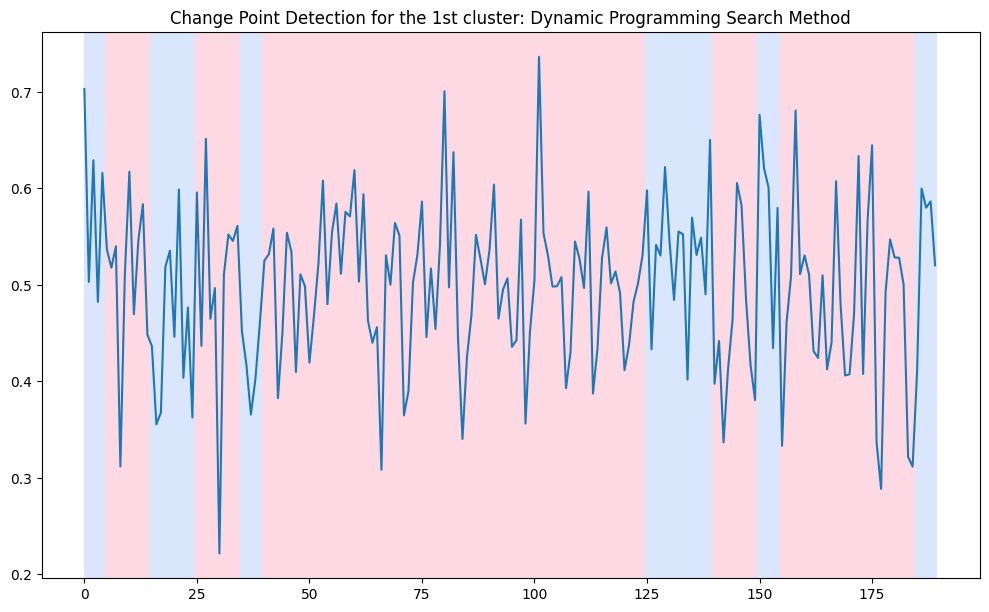

In [359]:
#Changepoint detection with dynamic programming search method
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points1)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points1, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection for the 1st cluster: Dynamic Programming Search Method')
plt.show()

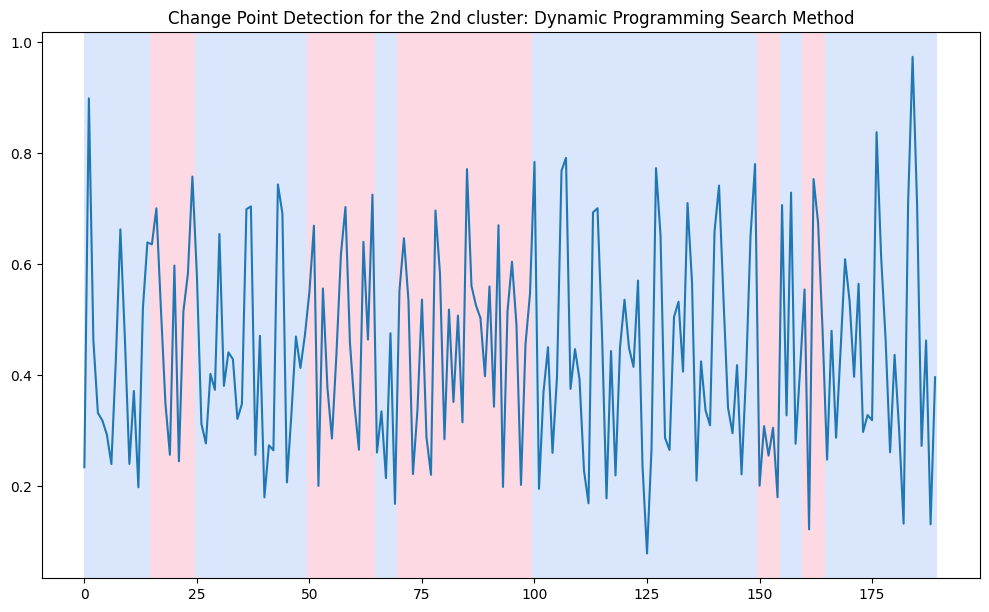

In [360]:
#Changepoint detection with dynamic programming search method
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points2)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points2, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection for the 2nd cluster: Dynamic Programming Search Method')
plt.show()

En conclusion, la segmentation des profils de consommation électrique à l'aide de la méthode de clustering spectral nous a permis de regrouper les profils similaires et de mettre en évidence les différentes caractéristiques de consommation. Cette analyse des clusters peut être utile pour comprendre les différents comportements de consommation des ménages et adapter les stratégies de gestion de l'énergie en conséquence.

### 8- Binary Segmentation Search Method <a class="anchor" id="chapter8"></a>

- Nous avons utilisé la méthode de détection de points de changement appelée `Binary Segmentation Search Method` pour analyser les profils de consommation électrique moyenne des clusters obtenus à partir du clustering spectral.
- 
Cette méthode de détection de points de changement est une approche bien établie dans la littérature. Elle est basée sur un algorithme itératif qui divise la séquence en sous-séquences pour détecter les points de changement. L'avantage de cette méthode est qu'elle a un coût de calcul efficace de O(n log n), où n est le nombre de points de données.- 

Nous avons appliqué la méthode de segmentation binaire à chaque cluster en utilisant un modèle "l2", qui mesure la distance euclidienne entre les sous-séquences. L'algorithme a été ajusté aux données et a prédit les points de changement, lesquels ont été affichés dans des graphiques pour chaque cluste- r.

En examinant les graphiques, nous pouvons identifier les moments où les profils de consommation électrique changent de manière significative, indiquant un possible événement ou un changement de comportement. Cela peut être utile pour les fournisseurs d'électricité pour comprendre les motifs de consommation des ménages et adapter leurs stratégies en conséque- nce.

Il est important de noter que la méthode de segmentation binaire est une méthode approximative et peut ne pas détecter tous les points de changement réels. De plus, le résultat dépend du choix des paramètres, tels que la taille minimale des sous-séquences et le nombre de points de changement at prudence.

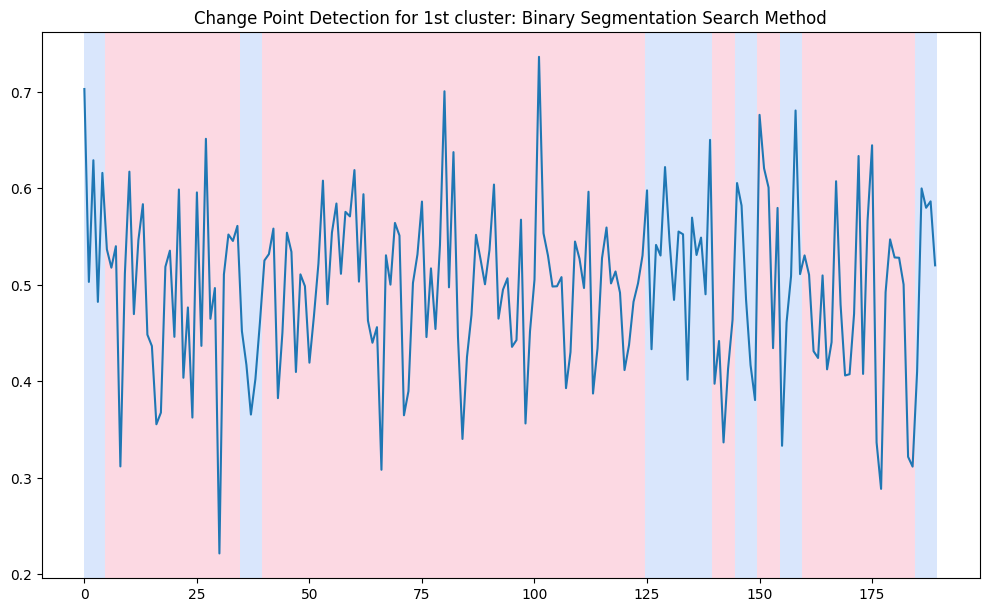

In [361]:
#Changepoint detection with the Binary Segmentation search method
model = "l2"  
algo = rpt.Binseg(model=model).fit(points1)
my_bkps = algo.predict(n_bkps=10)
# show results
rpt.show.display(points1, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection for 1st cluster: Binary Segmentation Search Method')
plt.show()
    

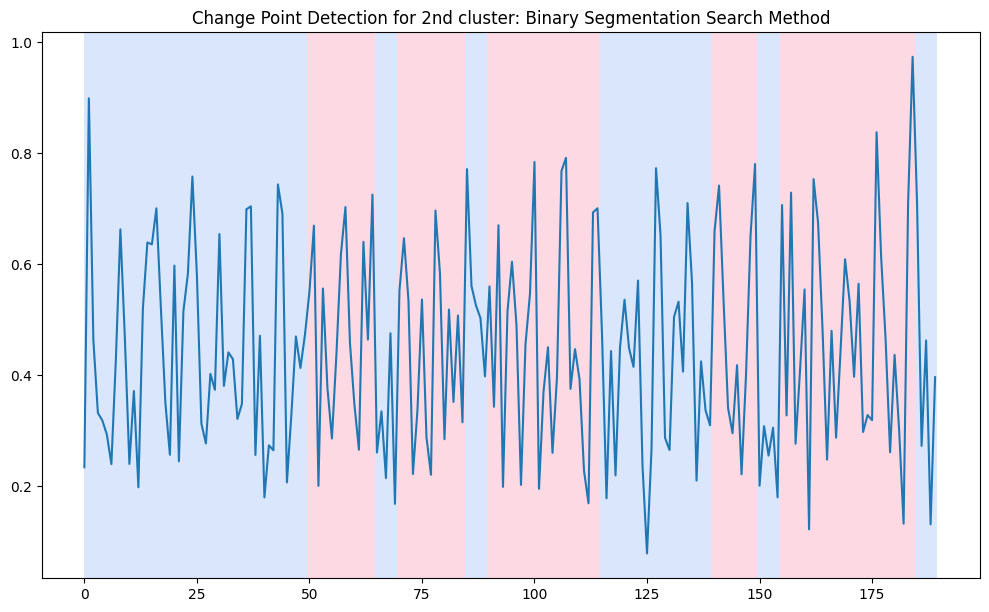

In [362]:
#Changepoint detection with the Binary Segmentation search method
model = "l2"  
algo = rpt.Binseg(model=model).fit(points2)
my_bkps = algo.predict(n_bkps=10)
# show results
rpt.show.display(points2, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection for 2nd cluster: Binary Segmentation Search Method')
plt.show()
    

- En conclusion, notre projet d'apprentissage non supervisé a permis de segmenter les profils de consommation électrique en différents clusters, ce qui nous a permis de mieux comprendre les comportements de consommation des ménages. Nous avons utilisé la méthode de clustering spectral pour regrouper les profils similaires et avons analysé visuellement les profils moyens de chaque cluster.

- En examinant les courbes de consommation moyenne journalière pour chaque cluster, nous avons identifié les similitudes et les différences entre les différents groupes de ménages. Cette analyse visuelle nous a permis de comprendre les différents types de comportements de consommation électrique dans notre échantillon de foyers.

- De plus, nous avons utilisé des méthodes de détection de points de changement pour identifier les moments où les profils de consommation électrique changent de manière significative. Les méthodes de programmation dynamique et de segmentation binaire nous ont fourni des informations sur les éventuels événements ou changements de comportement dans les profils de consommation.

- En résumé, notre projet d'apprentissage non supervisé nous a permis de segmenter et d'analyser les profils de consommation électrique des ménages de manière objective et automatisée. Ces informations peuvent être utiles pour les fournisseurs d'électricité pour mieux comprendre les habitudes de consommation des ménages et adapter leurs offres en conséquence. De plus, ces résultats peuvent également aider les ménages à prendre des décisions éclairées concernant leur consommation d'énergie.

- Cependant, il convient de noter que notre étude présente quelques limitations. Tout d'abord, nous avons utilisé un échantillon de foyers limité et les résultats peuvent varier pour un échantillon plus large et diversifié. De plus, la détection de points de changement peut être sensible aux choix des paramètres et nécessite une certaine expertise pour interpréter les résultats.

- Malgré ces limitations, notre projet démontre le potentiel de l'apprentissage non supervisé dans l'analyse des profils de consommation électrique. Il ouvre également la voie à de futures recherches pour explorer davantage les comportements de consommation des ménages et développer des stratégies plus efficaces pour la gestion de l'énergie.